In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset: UCI Heart Disease Dataset

In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/df.csv"

# Save to CSV
df.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/df.csv


In [ ]:
load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/df.csv"

# Load the DataFrame
df = pd.read_csv(load_path)

# Preview
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    1  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0

In [ ]:
# Dataset Shape

df.shape

(297, 14)

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target column name
target_col = "num"

# Update the target column and clinical_text column
X = df.drop("num", axis=1)

# y = target column
y = df[target_col]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.17,
    random_state=42,
    stratify=y
)

# Preview
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(246, 13) (246,)
(51, 13) (51,)


In [ ]:
# Dataset Shape
x_train.shape

(246, 13)

In [ ]:
# Dataset Shape
y_train.shape

(246,)

In [ ]:
# Dataset Shape
x_test.shape

(51, 13)

In [ ]:
# Dataset Shape
y_test.shape

(51,)

In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/x_test.csv"

# Save to CSV
x_test.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/x_test.csv


In [ ]:
# Load the DataFrame
x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/x_train.csv")
y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/y_train.csv")
x_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/x_test.csv")
y_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/y_test.csv")

In [ ]:
# Train Count
print(y_train.value_counts())

num
0      128
1      118
Name: count, dtype: int64


In [ ]:
# Test Count
print(y_test.value_counts())

num
0      32
1      19
Name: count, dtype: int64


# Synthetic Data Generation Methods

### CTGAN for Synthetic Data Generation

### TVAE (Tabular Variational Autoencoder)

### Gaussian Copula (via SDV's CopulaGAN)

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

| Method        | Categorical Handling         | Details |
| ------------- | ---------------------------- | ---------------------- |
| **CTGAN**     | Conditioned + one-hot        | It learns how
                                                 categories behave from the training data. When generating new data, it picks a category based on patterns it learned.                   |
| **TVAE**      | Softmax + sampling           | It learns the     
                                                 relationship between features, including categories. When creating new rows, it chooses categories based on probabilities.                   |
| **CopulaGAN** | Transforms + re-mapping      | It turns categories into
                                                 numbers, learns how they relate, and then transforms them back into categories.                   |
| **SMOTE-NC**  | Copies from nearest neighbor | For categories, it just
                                                 copies the category from one of the neighbors.             |

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

# Ensure y_train is a 1D array (if it's a DataFrame, extract the column)
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure the shape of y_train is correct
print("Shape of y_train:", y_train.shape)

# Define categorical features
categorical_features = [1, 2, 5, 6, 8, 10, 11, 12]  # For UCI Heart Disease

# Convert x_train to NumPy array if needed
if isinstance(x_train, pd.DataFrame):
    x_train_array = x_train.values
else:
    x_train_array = x_train

# Print original distribution
print("Before SMOTE-NC:", Counter(y_train))

# Get class counts
counter = Counter(y_train)
class_0_count = counter[0]
class_1_target = class_0_count + 200

# Apply SMOTE-NC
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy={1: class_1_target}, random_state=42)
x_resampled, y_resampled = smote_nc.fit_resample(x_train_array, y_train)

# Convert back to DataFrame
x_resampled_df = pd.DataFrame(x_resampled, columns=x_train.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['target'])

# Print new class distribution
print("After SMOTE-NC:", Counter(y_resampled))

# Separate synthetic samples
num_original_samples = len(x_train_array)
synthetic_x_train = x_resampled_df.iloc[num_original_samples:].reset_index(drop=True)
synthetic_y_train = y_resampled_df.iloc[num_original_samples:].reset_index(drop=True)

Shape of y_train: (246,)
Before SMOTE-NC: Counter({np.int64(0): 128, np.int64(1): 118})
After SMOTE-NC: Counter({np.int64(1): 328, np.int64(0): 128})


In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/synthetic_y_train.csv"

# Save to CSV
synthetic_y_train.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""


File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/synthetic_y_train.csv


In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/x_resampled_df.csv")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/y_resampled_df.csv")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/synthetic_x_train.csv")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/synthetic_y_train.csv")

In [ ]:
synthetic_x_train.head()

age  sex   cp    trestbps        chol  fbs  restecg     thalach  \
0  54.142653  1.0  4.0  121.964337  285.661199  0.0      0.0  115.696862   
1  56.583179  1.0  4.0  110.000000  239.000000  0.0      2.0  134.266174   
2  58.739171  1.0  4.0  157.391708  272.217512  0.0      2.0  121.348392   
3  50.977522  1.0  4.0  140.007493  298.041209  0.0      2.0  122.093658   
4  60.103742  1.0  4.0  125.172903  257.861677  0.0      2.0  141.207484   

   exang   oldpeak  slope   ca  thal  
0    1.0  3.175036    2.0  1.0   7.0  
1    1.0  1.973383    2.0  1.0   7.0  
2    0.0  0.208663    2.0  0.0   7.0  
3    1.0  4.184266    2.0  0.0   7.0  
4    1.0  2.751587    2.0  1.0   7.0

In [ ]:
x_resampled_df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  54.0  1.0  4.0     124.0  266.0  0.0      2.0    109.0    1.0      2.2   
1  46.0  1.0  2.0     101.0  197.0  1.0      0.0    156.0    0.0      0.0   
2  43.0  1.0  3.0     130.0  315.0  0.0      0.0    162.0    0.0      1.9   
3  47.0  1.0  3.0     138.0  257.0  0.0      2.0    156.0    0.0      0.0   
4  58.0  1.0  4.0     150.0  270.0  0.0      2.0    111.0    1.0      0.8   

   slope   ca  thal  
0    2.0  1.0   7.0  
1    1.0  0.0   7.0  
2    1.0  1.0   3.0  
3    1.0  0.0   3.0  
4    1.0  0.0   7.0

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
57.000000    19
60.000000    14
51.000000    12
59.000000    12
54.000000    12
             ..
43.809174     1
44.750115     1
66.224896     1
49.594601     1
62.695733     1
Name: count, Length: 238, dtype: int64

Counts for sex:
sex
1.0    360
0.0     96
Name: count, dtype: int64

Counts for cp:
cp
4.0    315
3.0     85
2.0     37
1.0     19
Name: count, dtype: int64

Counts for trestbps:
trestbps
140.000000    32
120.000000    32
130.000000    28
110.000000    20
150.000000    17
              ..
113.830692     1
126.000395     1
142.063808     1
128.272516     1
155.505066     1
Name: count, Length: 243, dtype: int64

Counts for chol:
chol
212.000000    7
239.000000    6
197.000000    6
254.000000    5
243.000000    4
             ..
355.152520    1
202.312380    1
247.048789    1
174.000000    1
183.000000    1
Name: count, Length: 342, dtype: int64

Counts for fbs:
fbs
0.0    416
1.0     40
Name: count, dtype: int64

Counts for restecg:
restecg
2.0    248
0.0

In [ ]:
x_resampled_df.shape

(456, 13)

In [ ]:
y_resampled_df.head()

target
0       1
1       0
2       0
3       0
4       1

In [ ]:
y_resampled_df.shape

(456, 1)

## Pipeline

In [ ]:
# Train/Test
x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

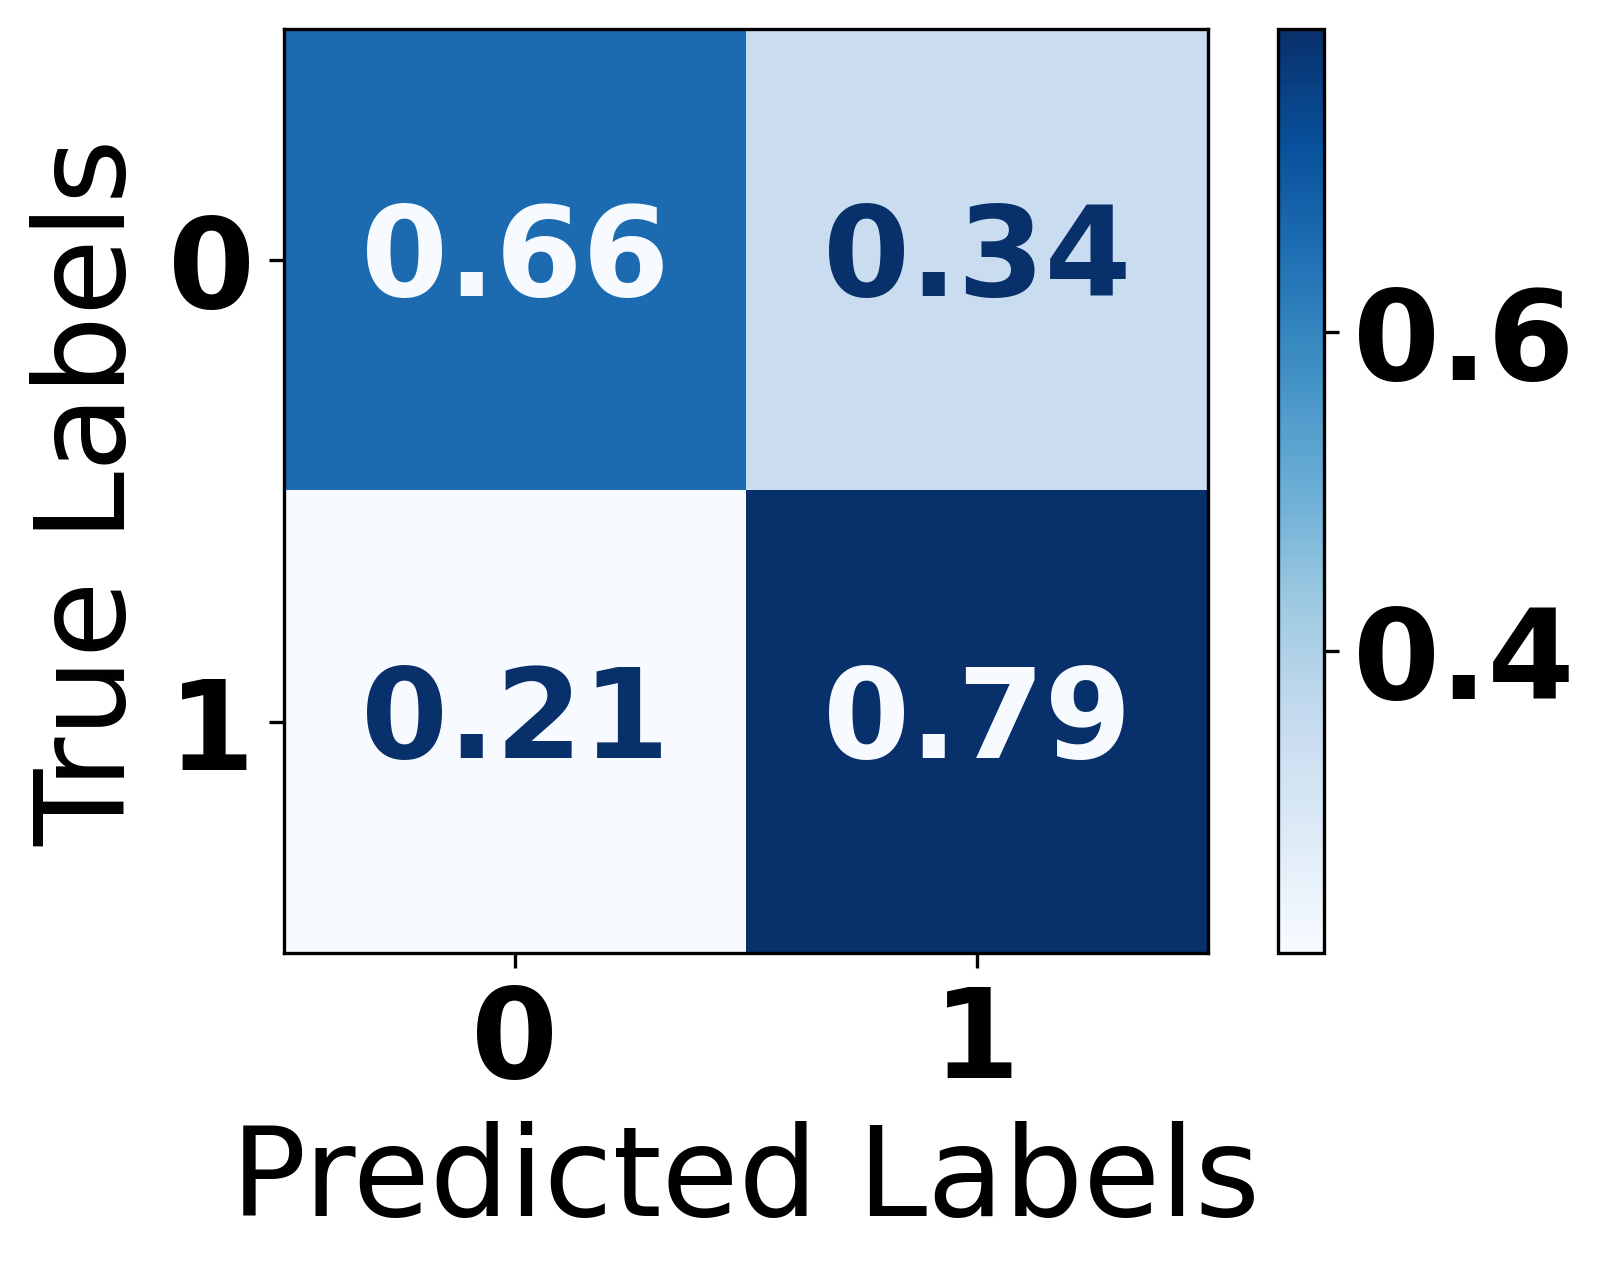

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.66      0.74        32
     Class 1       0.58      0.79      0.67        19

    accuracy                           0.71        51
   macro avg       0.71      0.72      0.70        51
weighted avg       0.74      0.71      0.71        51

Train Accuracy: 1.0
Test Accuracy: 0.7058823529411765


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


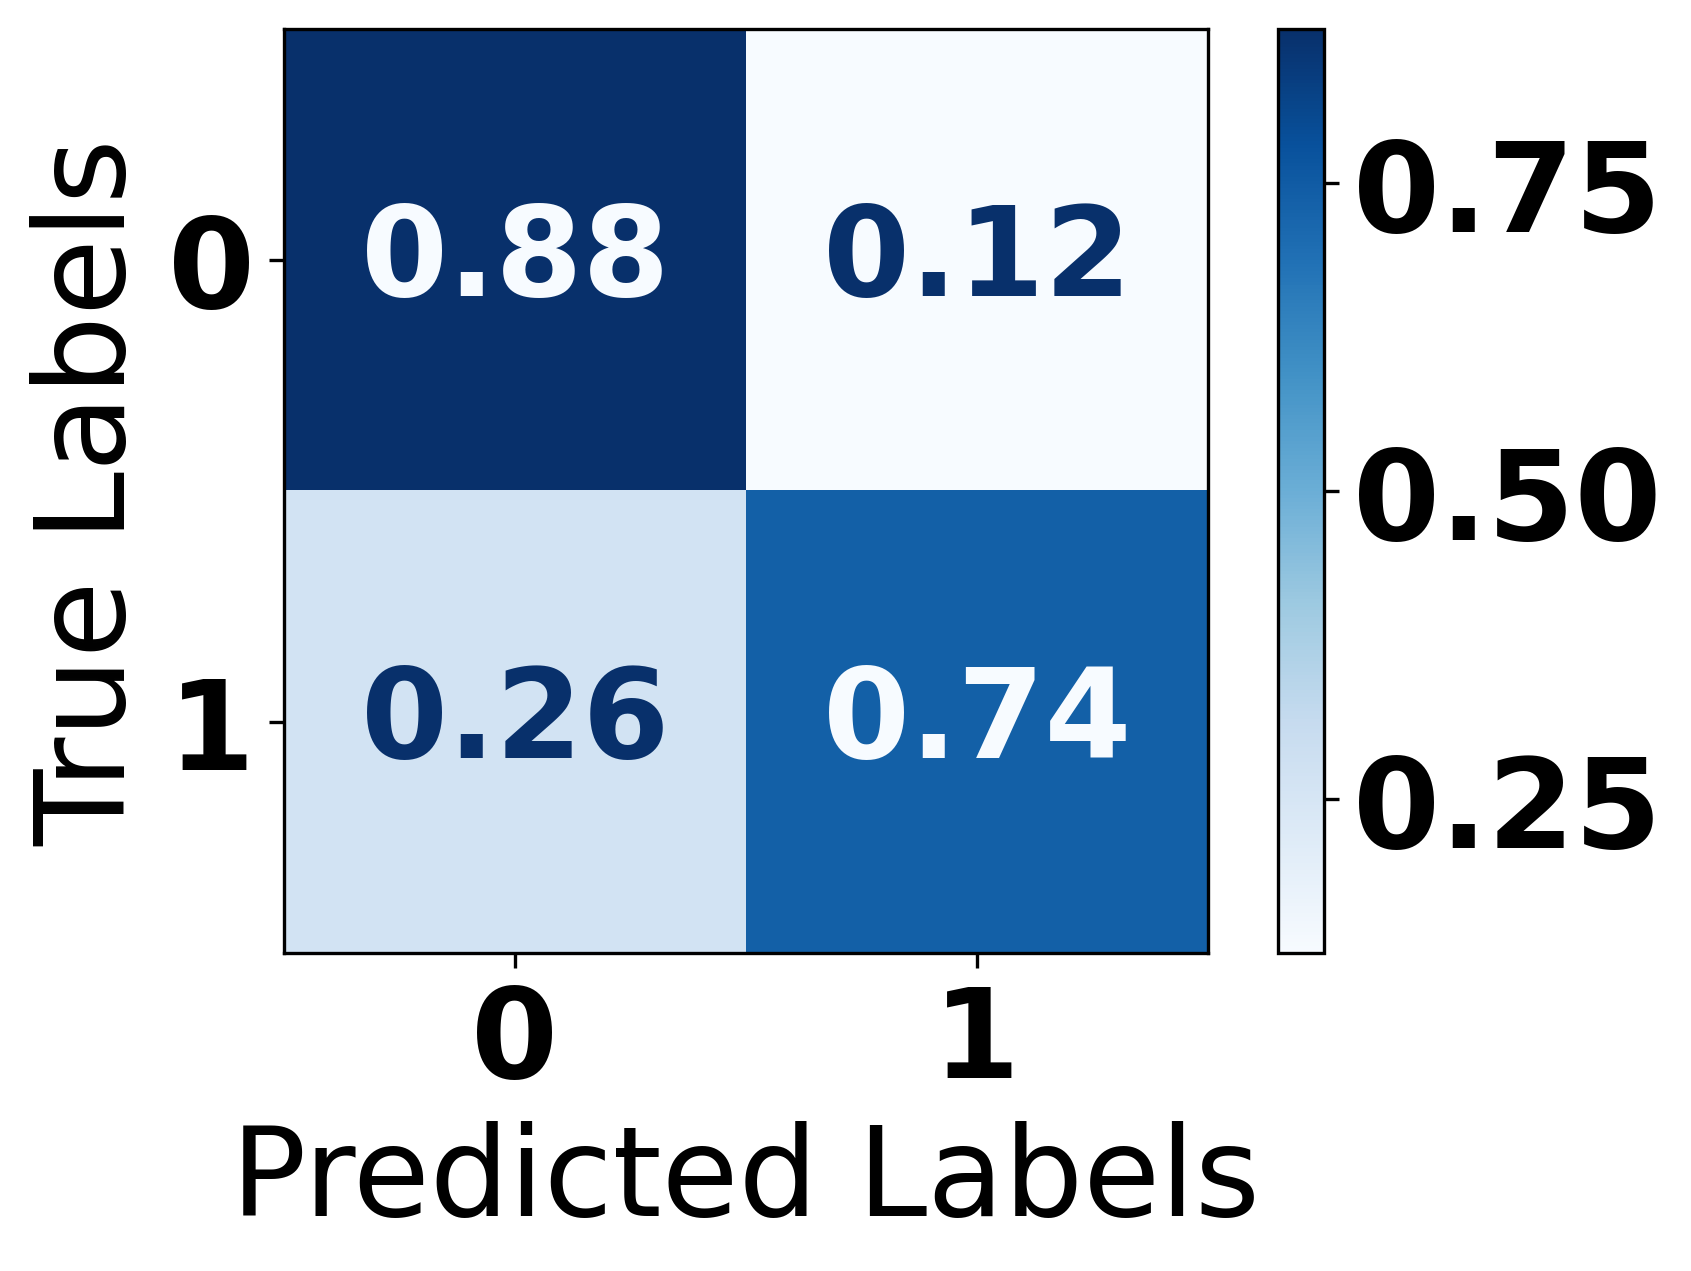

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86        32
     Class 1       0.78      0.74      0.76        19

    accuracy                           0.82        51
   macro avg       0.81      0.81      0.81        51
weighted avg       0.82      0.82      0.82        51

Train Accuracy: 0.8179824561403509
Test Accuracy: 0.8235294117647058


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


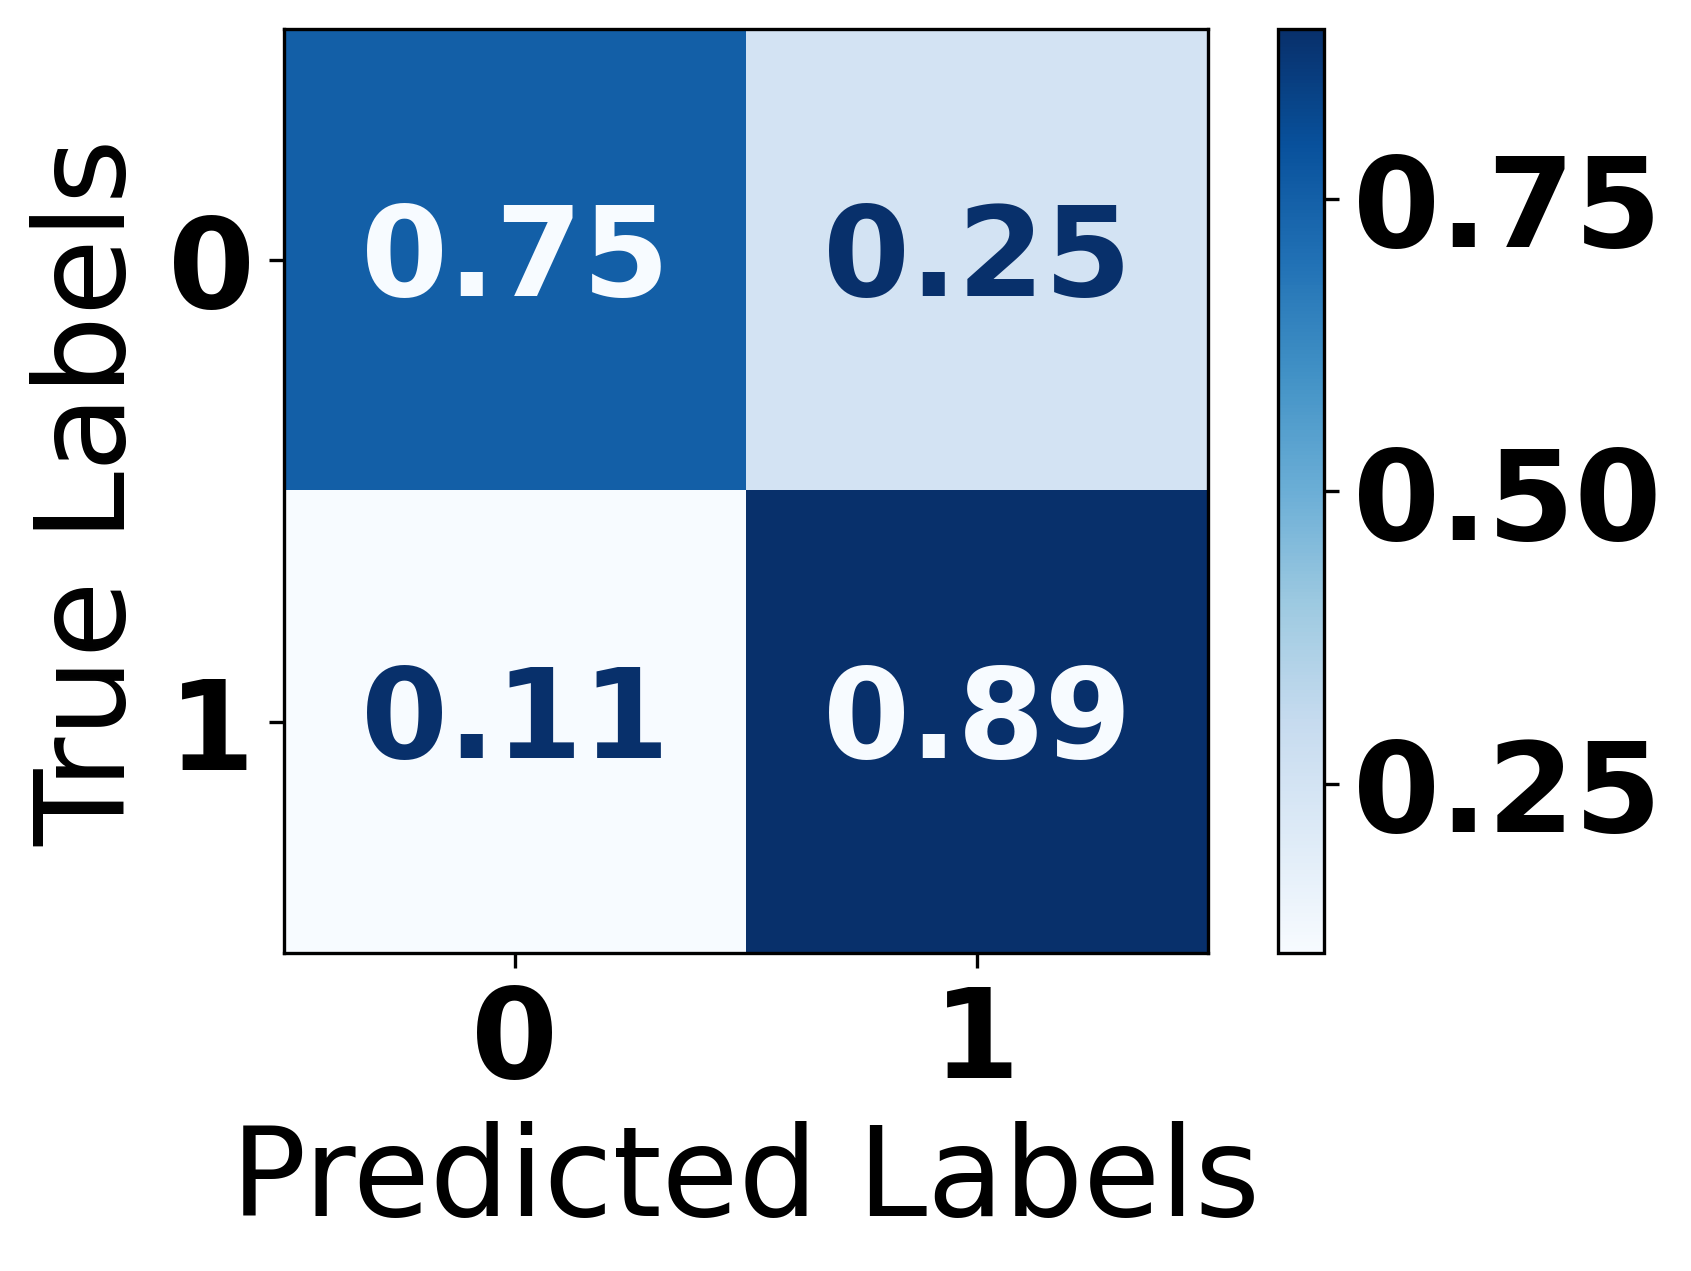

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.68      0.89      0.77        19

    accuracy                           0.80        51
   macro avg       0.80      0.82      0.80        51
weighted avg       0.83      0.80      0.81        51

Train Accuracy: 0.8048245614035088
Test Accuracy: 0.803921568627451


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=4,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=20, # Require lots of samples to split
    min_samples_leaf=25,  # Each leaf must have many samples
    random_state=25
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


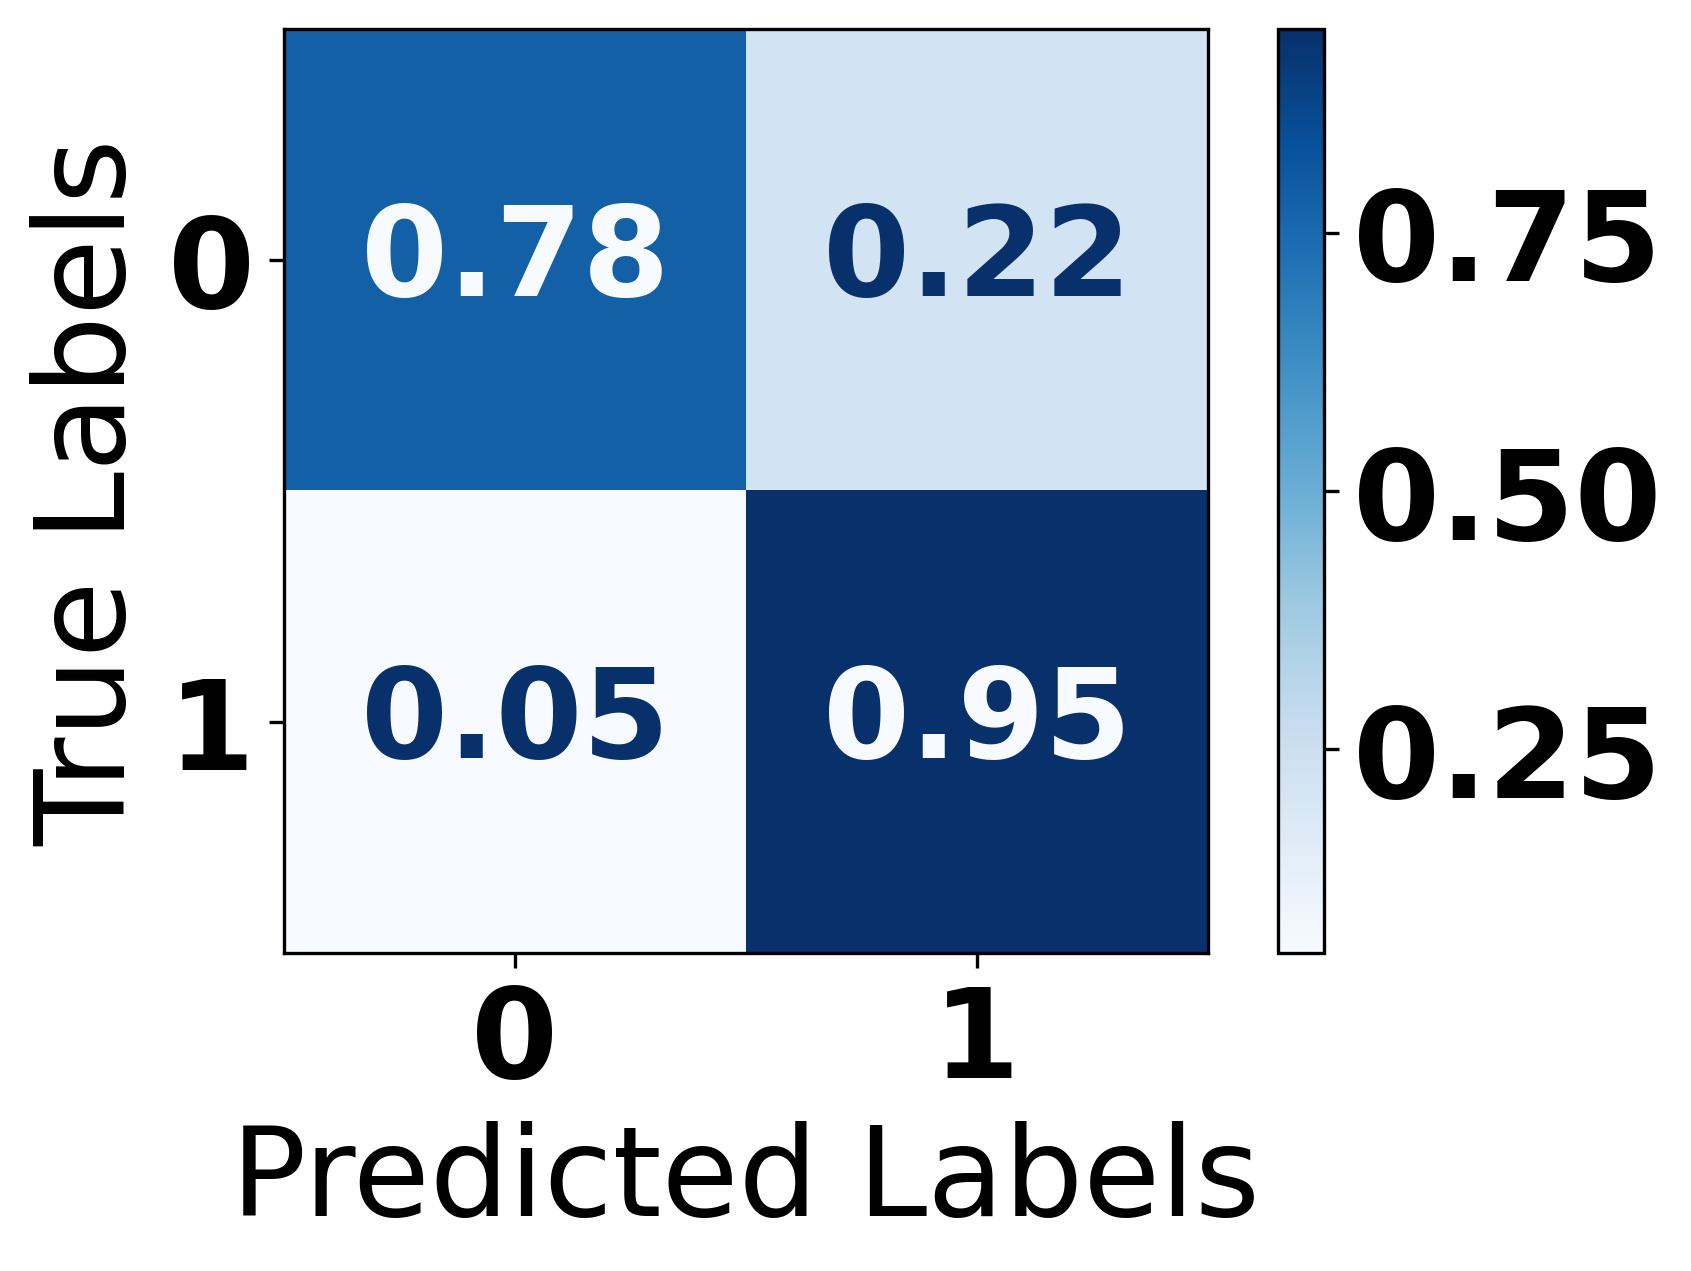

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.72      0.95      0.82        19

    accuracy                           0.84        51
   macro avg       0.84      0.86      0.84        51
weighted avg       0.87      0.84      0.85        51

Train Accuracy: 0.8179824561403509
Test Accuracy: 0.8431372549019608


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


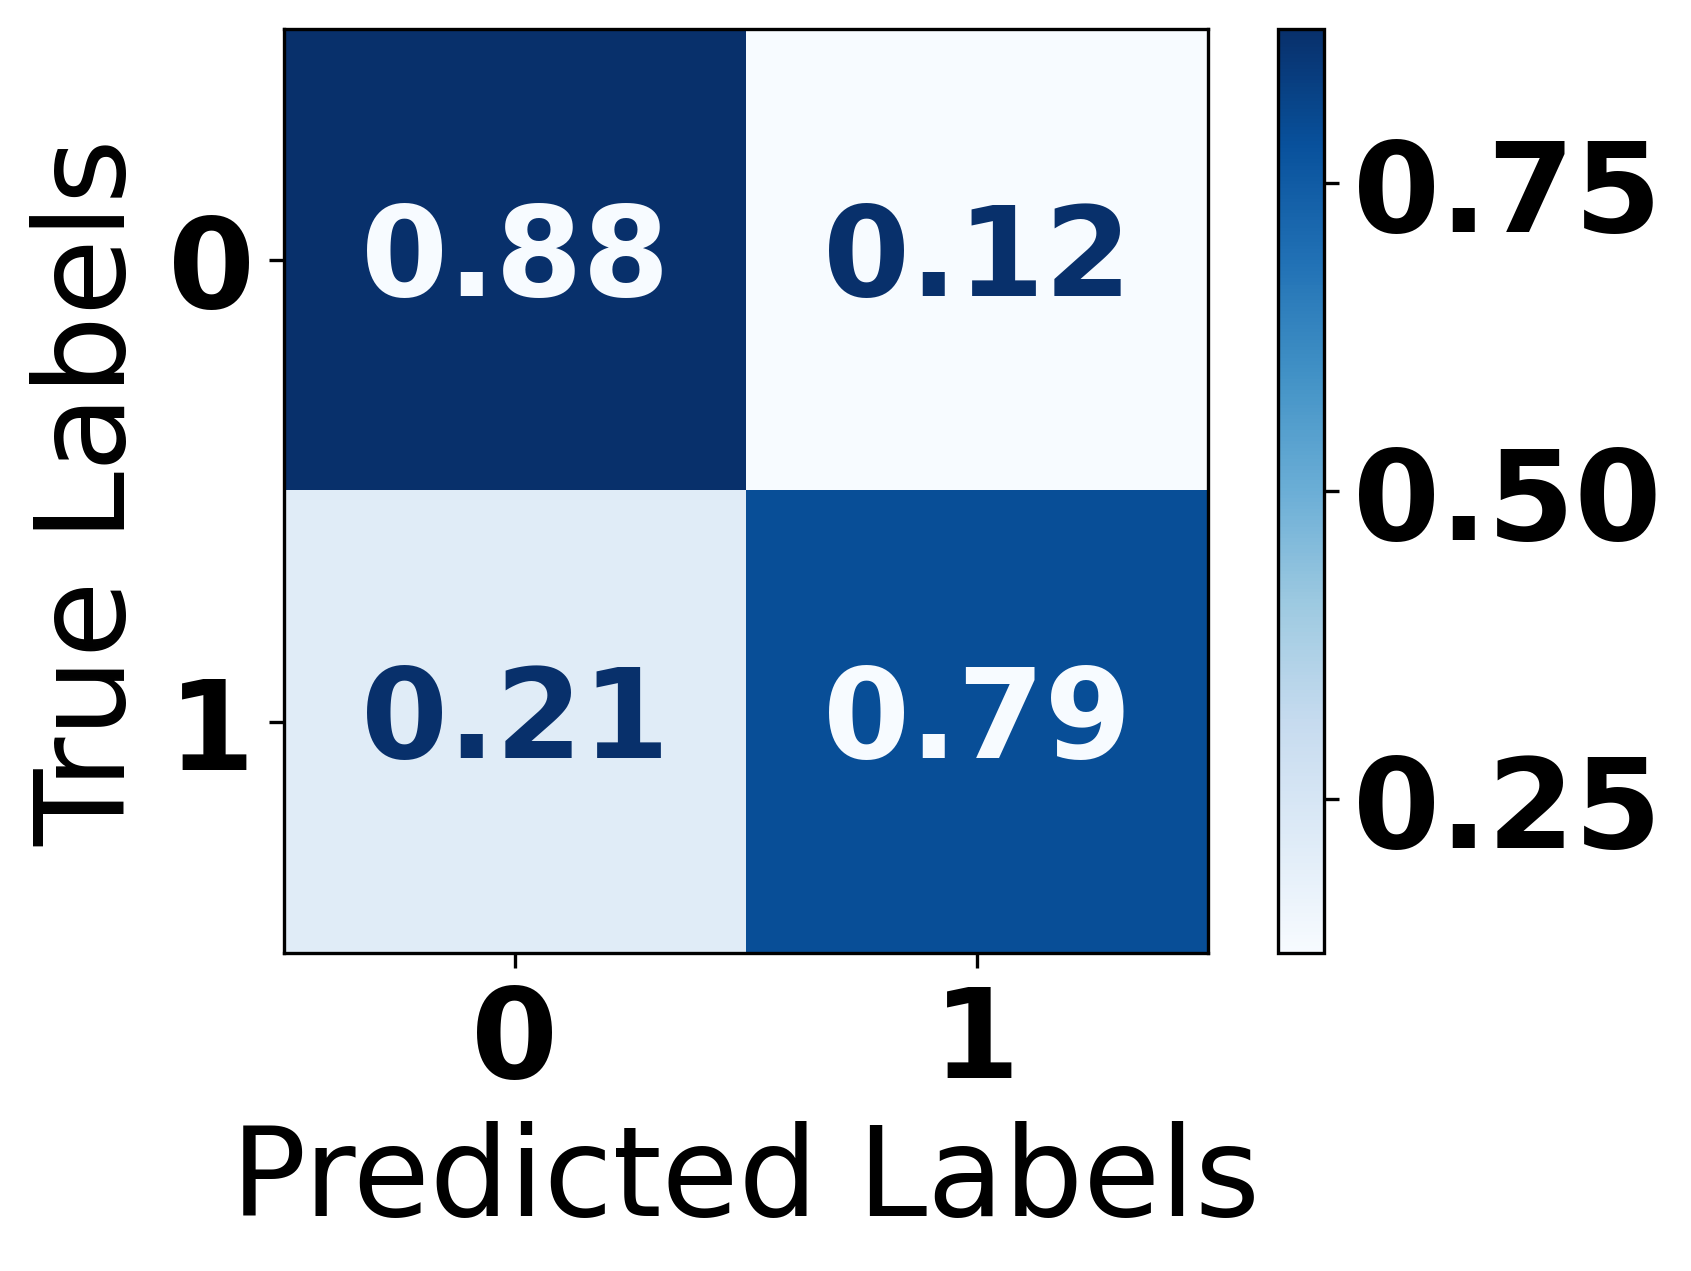

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.79      0.79      0.79        19

    accuracy                           0.84        51
   macro avg       0.83      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51

Train Accuracy: 0.8289473684210527
Test Accuracy: 0.8431372549019608


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.59375    0.40625   ]
 [0.10526316 0.89473684]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.59      0.72        32
     Class 1       0.57      0.89      0.69        19

    accuracy                           0.71        51
   macro avg       0.74      0.74      0.71        51
weighted avg       0.78      0.71      0.71        51



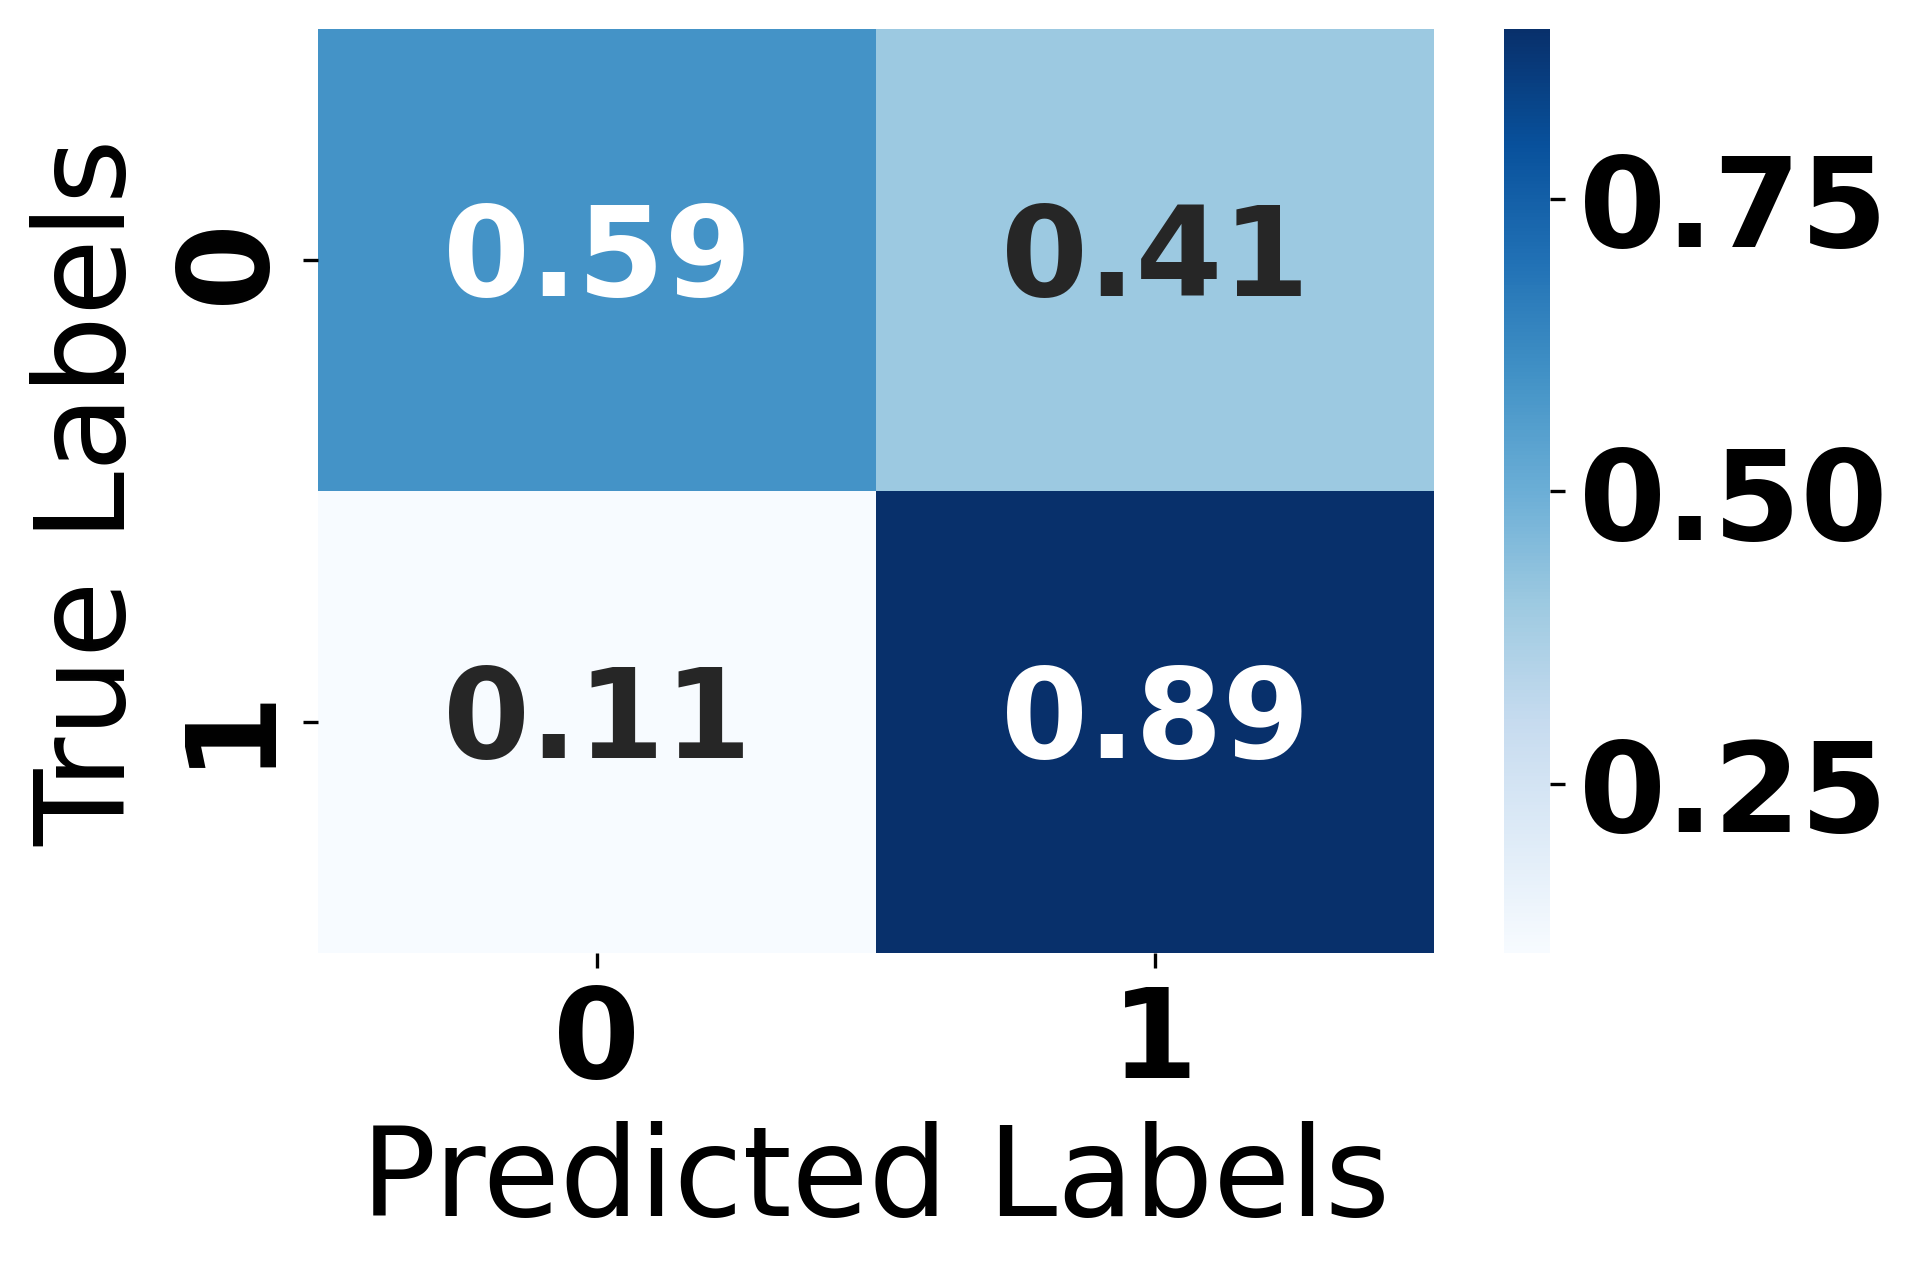

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 798ms/step - accuracy: 0.5200 - loss: 10.0985 - val_accuracy: 0.3725 - val_loss: 5.0065
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5799 - loss: 2.1194 - val_accuracy: 0.3725 - val_loss: 2.6915
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7010 - loss: 1.7686 - val_accuracy: 0.5490 - val_loss: 0.6850
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5495 - loss: 0.9546 - val_accuracy: 0.3725 - val_loss: 2.7989
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7186 - loss: 1.3199 - val_accuracy: 0.7451 - val_loss: 0.4988
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5321 - loss: 0.9145 - val_accuracy: 0.4510 - val_loss: 1.8410
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7342 - loss: 0.9581 - val_accuracy: 0.7647 - val_loss: 0.4573
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5824 - loss: 0.7383 - val_accuracy: 0.4510 - val_loss: 1.522

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step
Normalized Confusion Matrix:
[[0.1875 0.8125]
 [0.     1.    ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.19      0.32        32
     Class 1       0.42      1.00      0.59        19

    accuracy                           0.49        51
   macro avg       0.71      0.59      0.45        51
weighted avg       0.78      0.49      0.42        51



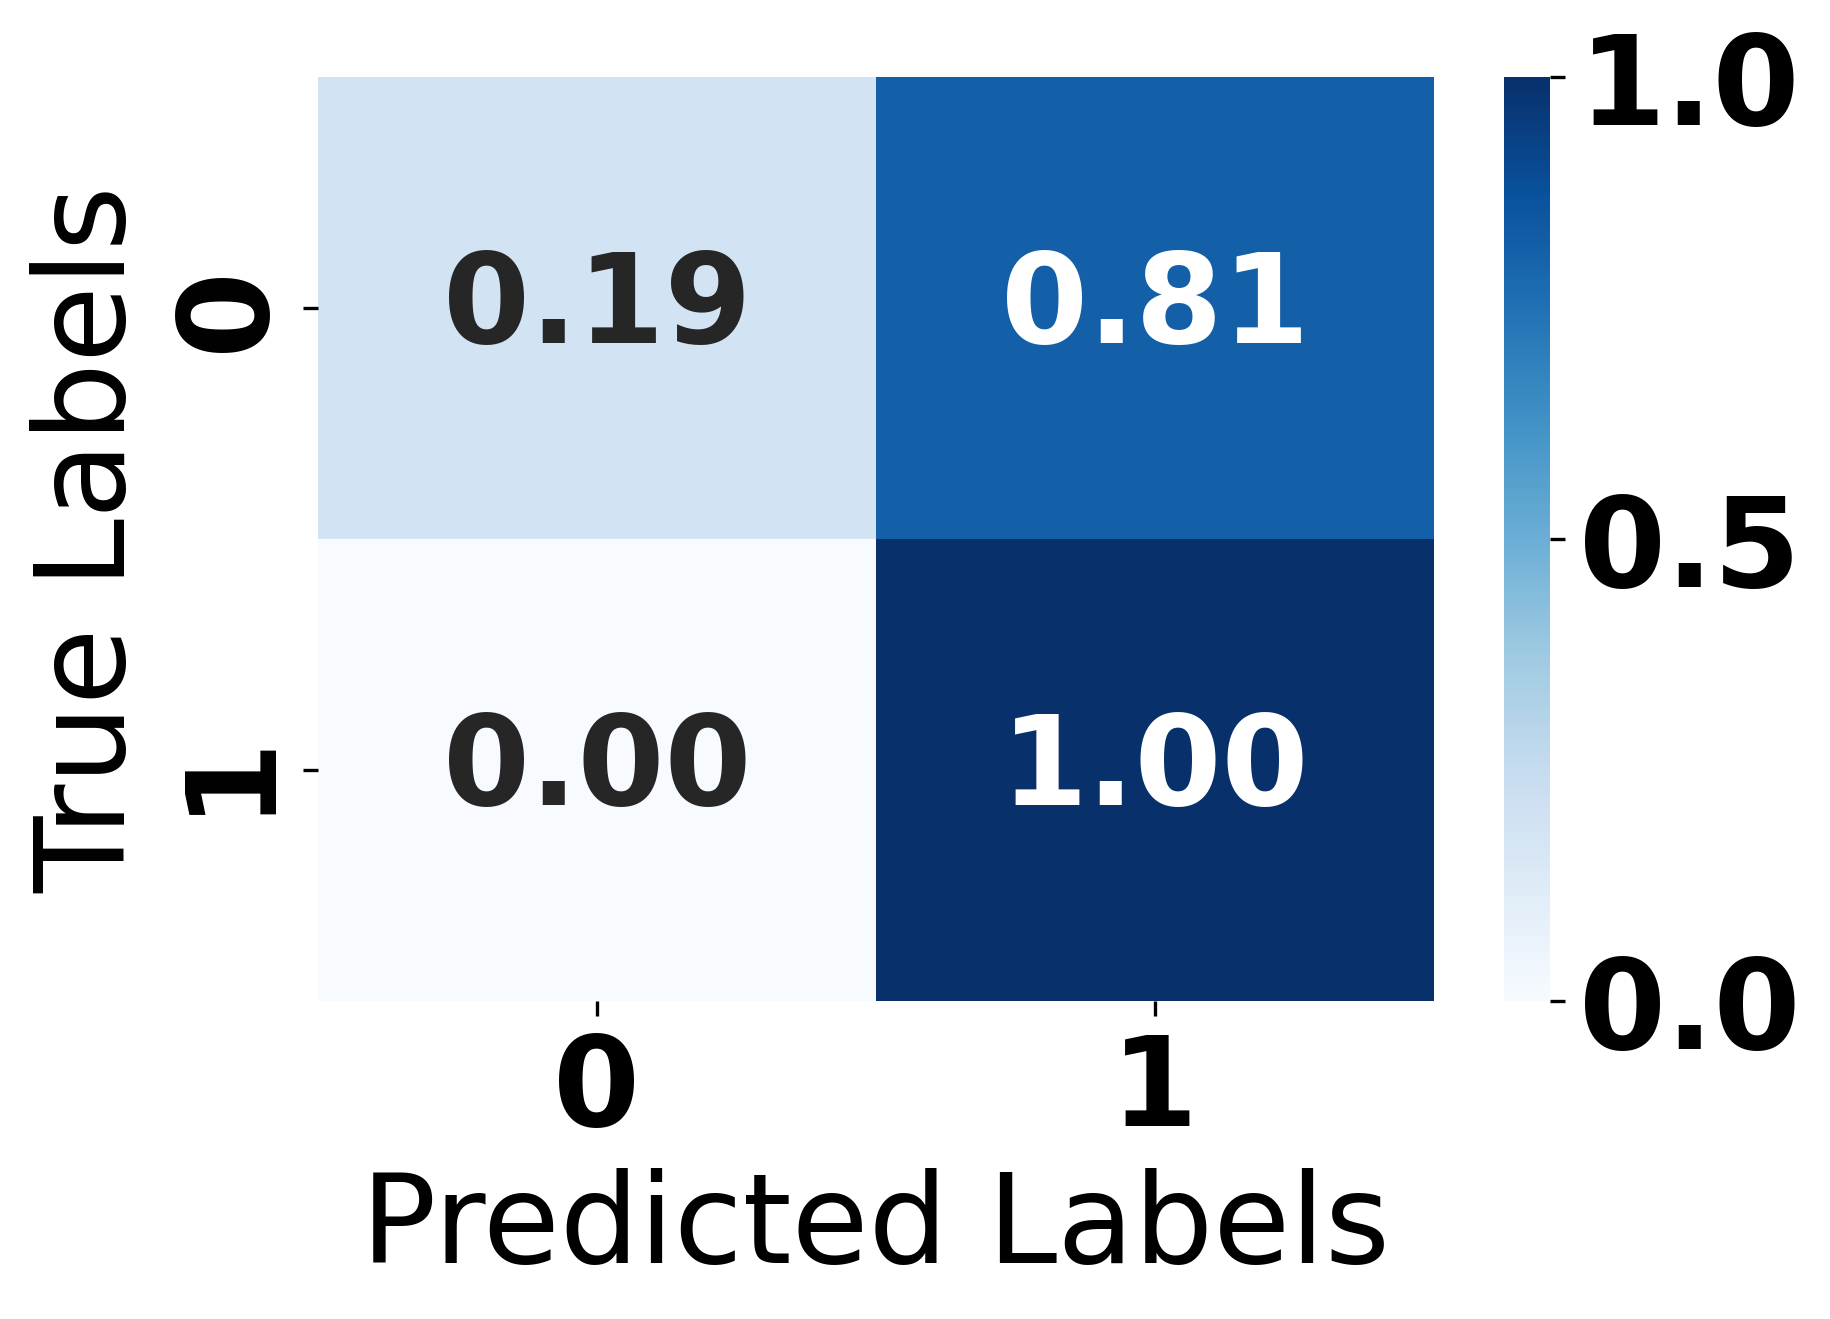

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 889ms/step - accuracy: 0.4770 - loss: 0.9564 - val_accuracy: 0.3725 - val_loss: 9.3402
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5608 - loss: 0.7125 - val_accuracy: 0.3725 - val_loss: 4.4064
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6289 - loss: 0.6567 - val_accuracy: 0.5490 - val_loss: 0.8564
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6488 - loss: 0.6675 - val_accuracy: 0.6275 - val_loss: 0.7204
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6398 - loss: 0.6400 - val_accuracy: 0.6275 - val_loss: 1.5544
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6707 - loss: 0.6242 - val_accuracy: 0.6275 - val_loss: 1.9532
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6876 - loss: 0.5934 - val_accuracy: 0.6275 - val_loss: 1.8232
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7192 - loss: 0.5716 - val_accuracy: 0.6275 - val_loss: 1.6130

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step
Normalized Confusion Matrix:
[[1.         0.        ]
 [0.63157895 0.36842105]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      1.00      0.84        32
     Class 1       1.00      0.37      0.54        19

    accuracy                           0.76        51
   macro avg       0.86      0.68      0.69        51
weighted avg       0.83      0.76      0.73        51



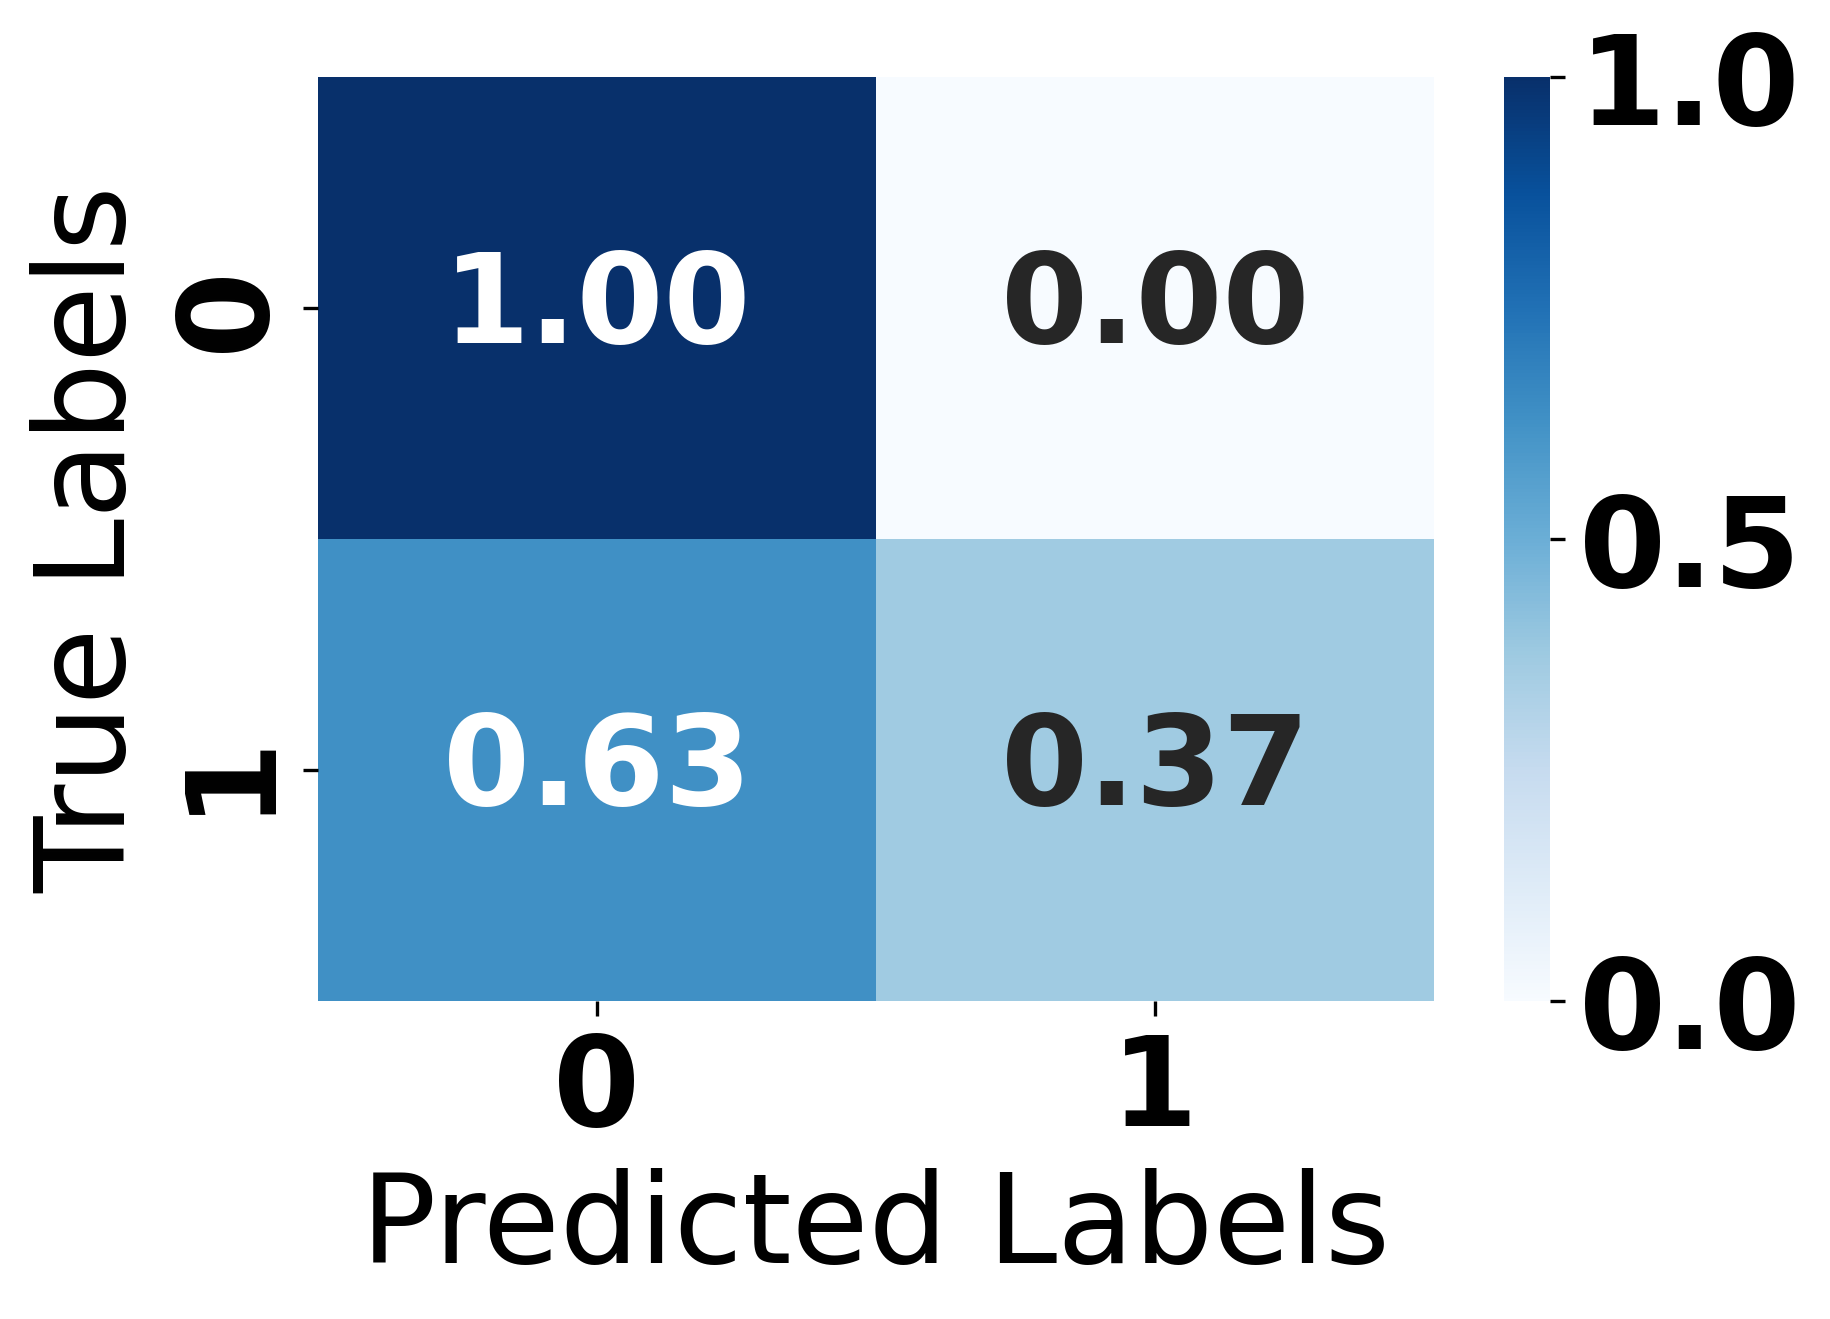

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 20000  # This should be set according to your dataset
embed_dim = 128  # Embedding size for each token
ff_dim = 128  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6638 - loss: 0.6475 - val_accuracy: 0.3725 - val_loss: 0.7802
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7264 - loss: 0.6114 - val_accuracy: 0.3725 - val_loss: 0.7917
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7218 - loss: 0.5914 - val_accuracy: 0.3725 - val_loss: 0.7915
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7516 - loss: 0.5621 - val_accuracy: 0.3725 - val_loss: 0.7824
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7412 - loss: 0.5381 - val_accuracy: 0.4118 - val_loss: 0.7666
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7398 - loss: 0.5246 - val_accuracy: 0.4118 - val_loss: 0.7450
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7573 - loss: 0.4957 - val_accuracy: 0.4706 - val_loss: 0.7077
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7507 - loss: 0.5008 - val_accuracy: 0.5490 - val_loss: 0.6645
Epoch 9/20
4

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step
Normalized Confusion Matrix:
[[0.65625    0.34375   ]
 [0.05263158 0.94736842]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.66      0.78        32
     Class 1       0.62      0.95      0.75        19

    accuracy                           0.76        51
   macro avg       0.79      0.80      0.76        51
weighted avg       0.83      0.76      0.77        51



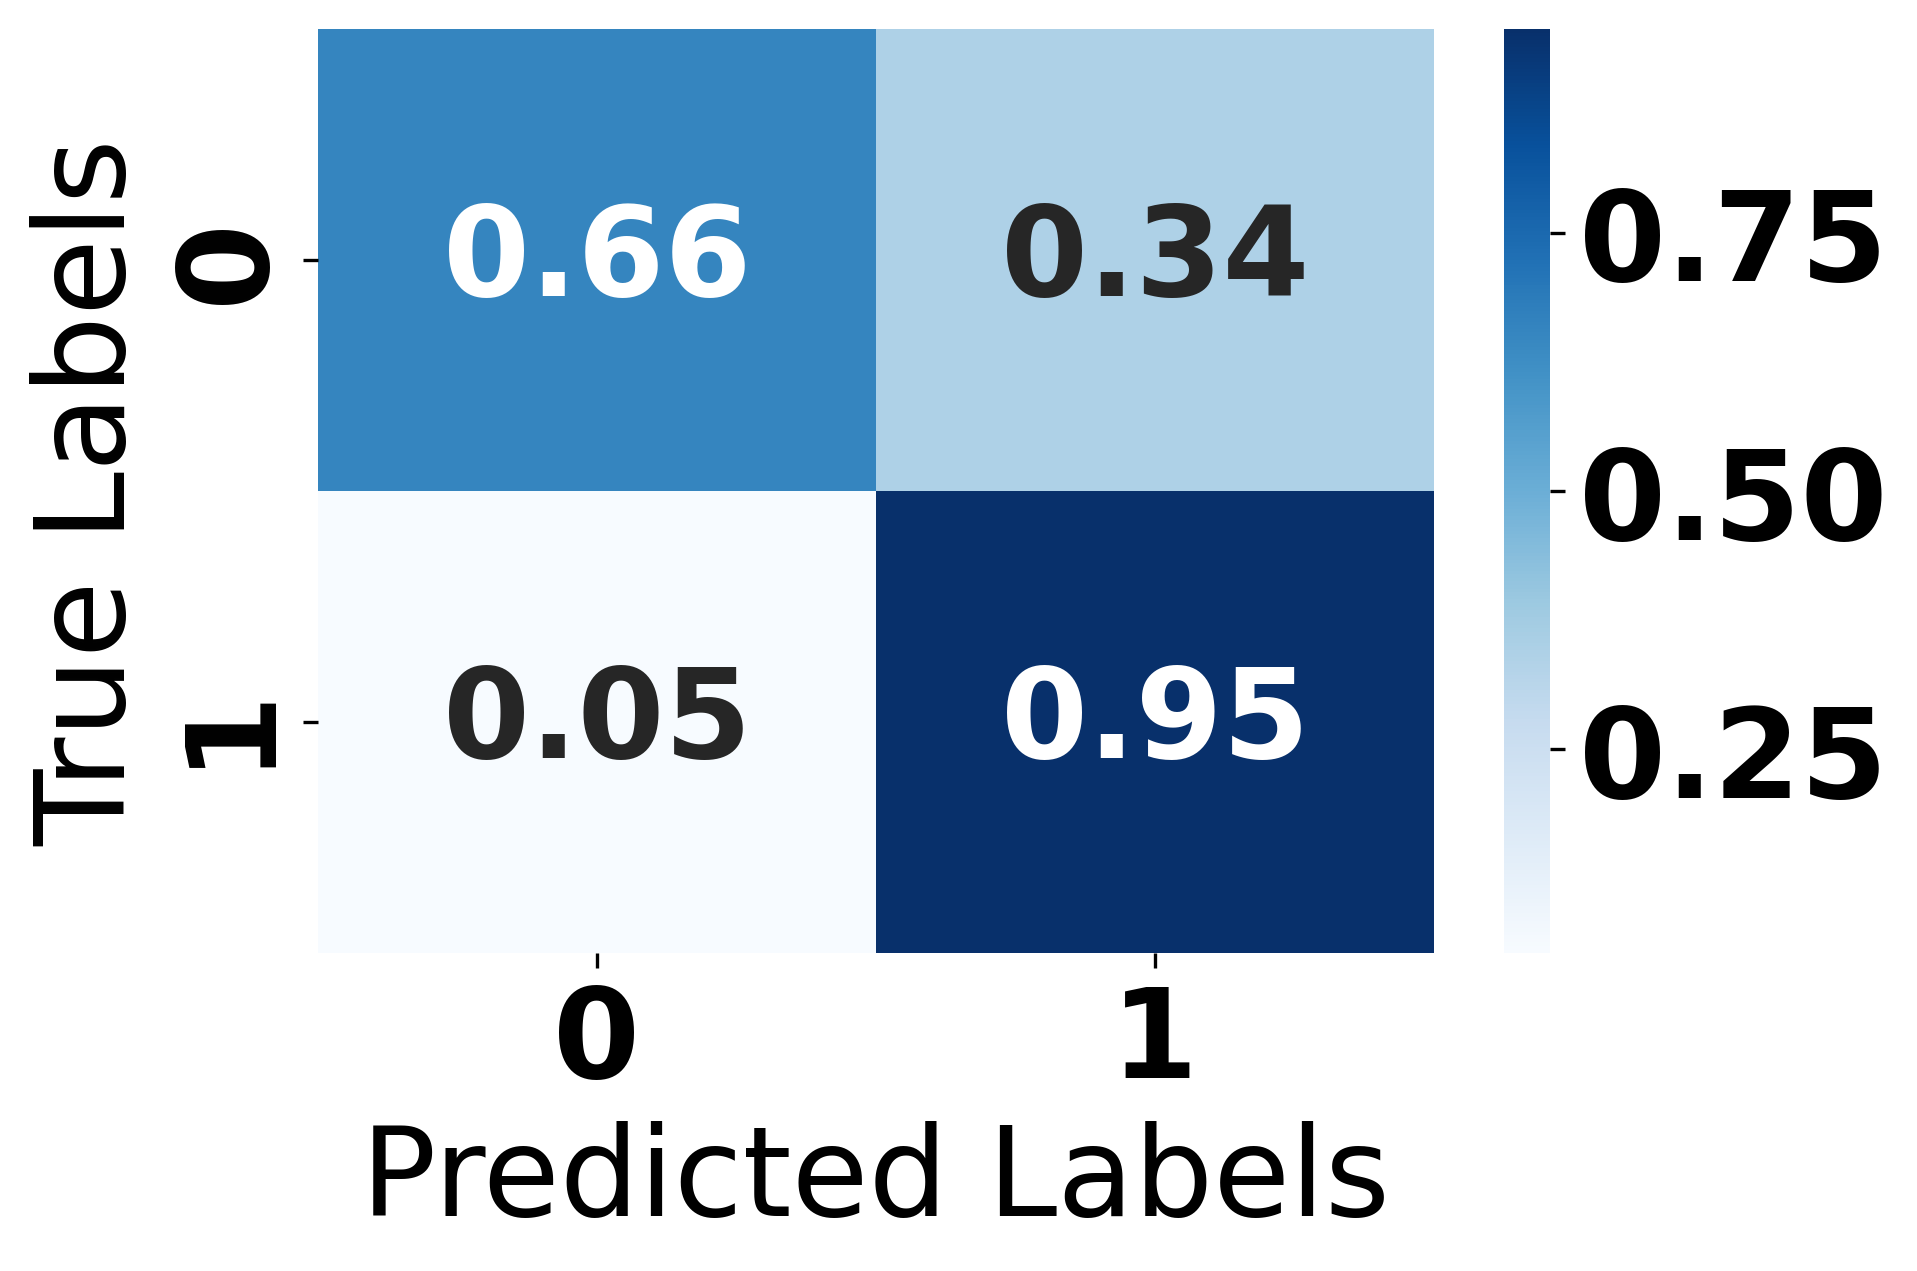

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Synthetic Data Generation Methods/Model/transformer_model.h5')

### GPT

In [ ]:
pip install --upgrade transformers

In [ ]:
import transformers
print(transformers.__version__)

4.51.3


In [ ]:
pip install transformers datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=342, training_loss=0.4704399650034152, metrics={'train_runtime': 393.1904, 'train_samples_per_second': 3.479, 'train_steps_per_second': 0.87, 'total_flos': 0.0, 'train_loss': 0.4704399650034152, 'epoch': 3.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.8378    0.9688    0.8986        32
           1     0.9286    0.6842    0.7879        19

    accuracy                         0.8627        51
   macro avg     0.8832    0.8265    0.8432        51
weighted avg     0.8716    0.8627    0.8573        51

Confusion Matrix:
 [[31  1]
 [ 6 13]]


### CTGAN for Synthetic Data Generation

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [ ]:
!pip install sdv --upgrade

In [ ]:
!pip install sdv==0.16.0

ERROR: Ignored the following yanked versions: 1.13.0
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6,<3.9; 0.10.0.dev0 Requires-Python >=3.6,<3.9; 0.10.1 Requires-Python >=3.6,<3.9; 0.10.1.dev0 Requires-Python >=3.6,<3.9; 0.11.0 Requires-Python >=3.6,<3.9; 0.11.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0 Requires-Python >=3.6,<3.9; 0.12.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0.dev1 Requires-Python >=3.6,<3.9; 0.12.1 Requires-Python >=3.6,<3.9; 0.12.1.dev0 Requires-Python >=3.6,<3.9; 0.13.0 Requires-Python >=3.6,<3.10; 0.13.0.dev0 Requires-Python >=3.6,<3.10; 0.13.1 Requires-Python >=3.6,<3.10; 0.13.1.dev0 Requires-Python >=3.6,<3.10; 0.14.0 Requires-Python >=3.6,<3.10; 0.14.0.dev0 Requires-Python >=3.6,<3.10; 0.14.0.dev1 Requires-Python >=3.6,<3.10; 0.14.0.dev2 Requires-Python >=3.6,<3.10; 0.14.1 Requires-Python >=3.6,<3.10; 0.14.1.dev0 Requires-Python >=3.6,<3.10; 0.15.0 Requires-Python >=3.6,<3.10; 0.15.0.dev0 Requires-Python

In [ ]:
!pip install ctgan

In [ ]:
from ctgan import CTGAN
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices (UCI Heart Disease)
categorical_features = [1, 2, 5, 6, 8, 10, 11, 12]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Combine x_train and y_train into one DataFrame
x_train['target'] = y_train

# Print original distribution
print("Before CTGAN:", Counter(y_train))

# Separate minority class (1)
minority_df = x_train[x_train['target'] == 1]

# Estimate how many synthetic samples you want
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get categorical column names from indices
categorical_columns = x_train.columns[categorical_features].tolist() + ['target']

# Fit CTGAN on minority class
ctgan = CTGAN(epochs=300)
ctgan.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic samples
synthetic_minority = ctgan.sample(samples_to_generate)

# Ensure only class 1 is included
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and target
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final distribution
print("After CTGAN:", Counter(y_resampled_df))

Before CTGAN: Counter({np.int64(0): 128, np.int64(1): 118})
After CTGAN: Counter({1: 328, 0: 128})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
58    23
57    20
60    19
63    18
54    18
66    18
56    17
64    17
52    16
51    16
65    15
67    15
59    14
61    14
53    14
62    14
70    12
41    11
43    10
48    10
44    10
50    10
45     9
55     8
71     8
68     8
69     7
46     6
42     6
77     6
76     5
47     5
39     5
72     5
78     4
75     4
74     4
79     3
35     3
34     3
49     3
40     3
73     3
82     3
28     2
37     1
38     1
88     1
27     1
84     1
31     1
87     1
83     1
80     1
33     1
29     1
81     1
Name: count, dtype: int64

Counts for sex:
sex
1    338
0    118
Name: count, dtype: int64

Counts for cp:
cp
4    267
3     98
2     59
1     32
Name: count, dtype: int64

Counts for trestbps:
trestbps
120    32
130    29
140    29
110    20
150    17
       ..
182     1
90      1
86      1
93      1
171     1
Name: count, Length: 92, dtype: int64

Counts for chol:
chol
197    8
212    6
254    6
234    5
256    5
      ..
375    1
281    1
408    1
393    1
320

In [ ]:
x_resampled_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   54    1   4       124   266    0        2      109      1      2.2      2   
1   46    1   2       101   197    1        0      156      0      0.0      1   
2   43    1   3       130   315    0        0      162      0      1.9      1   
3   47    1   3       138   257    0        2      156      0      0.0      1   
4   58    1   4       150   270    0        2      111      1      0.8      1   

    ca  thal  
0  1.0   7.0  
1  0.0   7.0  
2  1.0   3.0  
3  0.0   3.0  
4  0.0   7.0

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
57    21
60    18
62    18
64    18
59    18
65    16
67    16
70    16
58    16
63    15
71    14
51    14
52    14
54    13
69    12
56    11
61    11
66    10
48    10
44    10
74    10
68    10
53    10
43     9
41     9
73     9
47     8
46     8
55     7
50     7
76     7
45     7
42     6
81     6
75     5
72     5
35     4
79     4
82     4
40     4
39     4
83     4
77     3
78     3
49     3
80     2
37     1
34     1
38     1
85     1
84     1
32     1
36     1
Name: count, dtype: int64

Counts for sex:
sex
1    346
0    110
Name: count, dtype: int64

Counts for cp:
cp
4    278
3     99
2     47
1     32
Name: count, dtype: int64

Counts for trestbps:
trestbps
130    31
120    31
140    31
110    20
150    16
       ..
169     1
81      1
166     1
137     1
83      1
Name: count, Length: 96, dtype: int64

Counts for chol:
chol
197    6
243    6
221    6
212    6
220    6
      ..
188    1
323    1
162    1
130    1
85     1
Name: count, Length: 206, dtyp

### Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

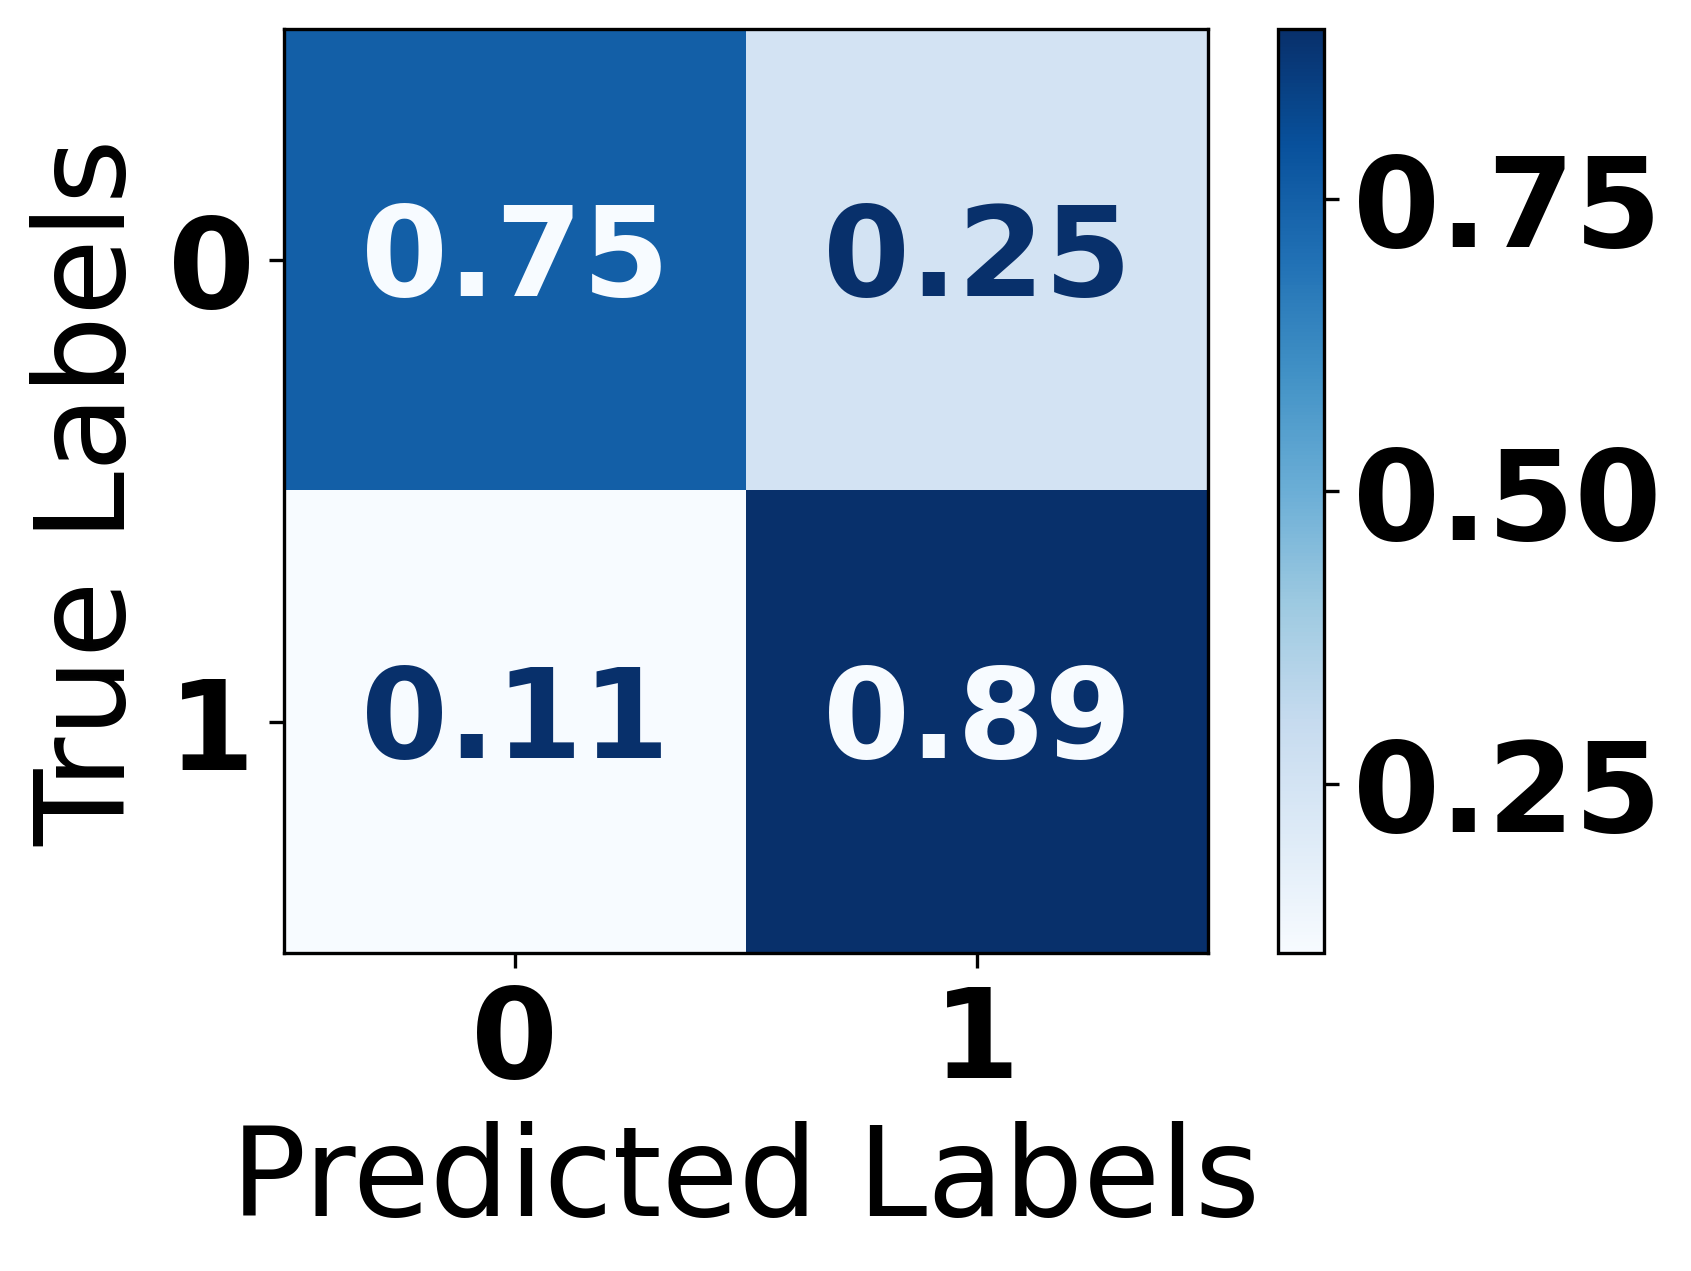

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.75      0.83        32
     Class 1       0.68      0.89      0.77        19

    accuracy                           0.80        51
   macro avg       0.80      0.82      0.80        51
weighted avg       0.83      0.80      0.81        51

Train Accuracy: 1.0
Test Accuracy: 0.803921568627451


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


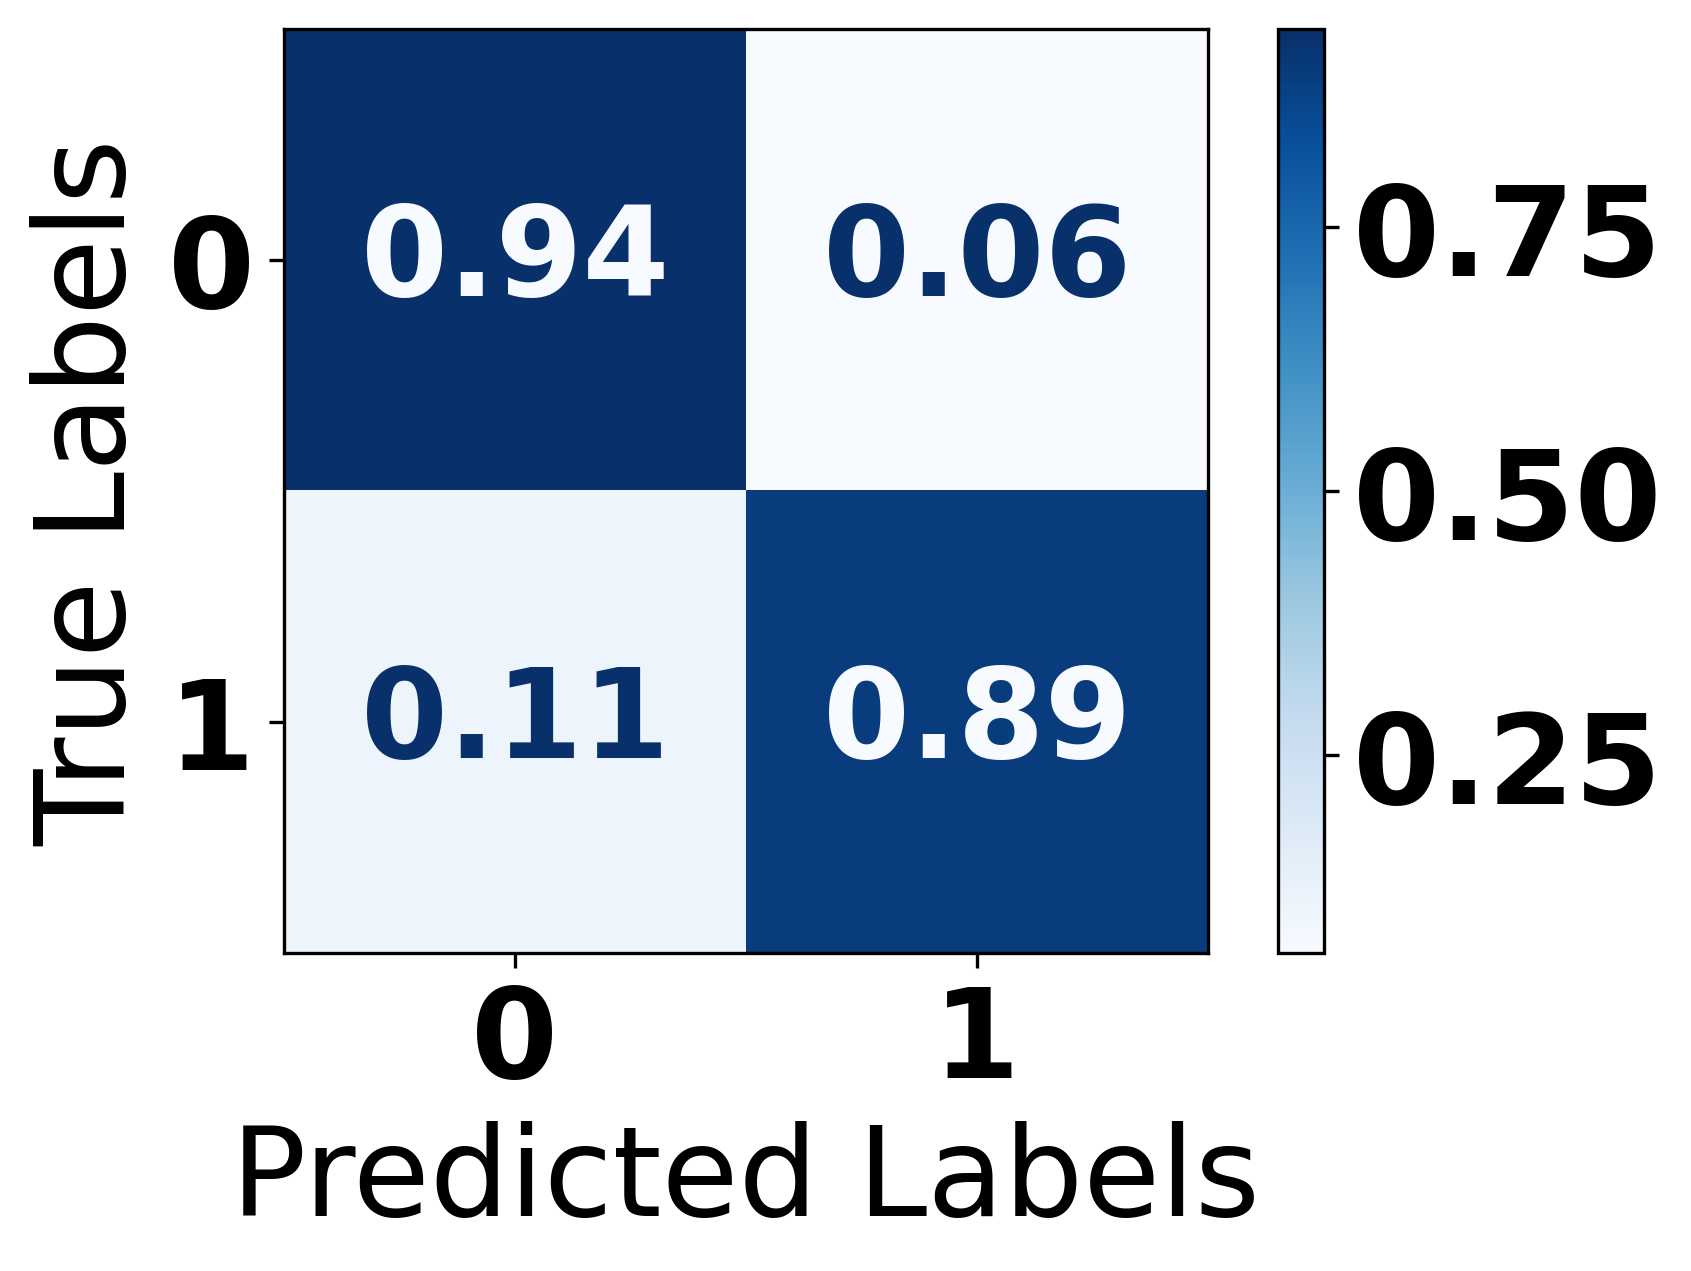

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94        32
     Class 1       0.89      0.89      0.89        19

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51

Train Accuracy: 0.6951754385964912
Test Accuracy: 0.9215686274509803


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


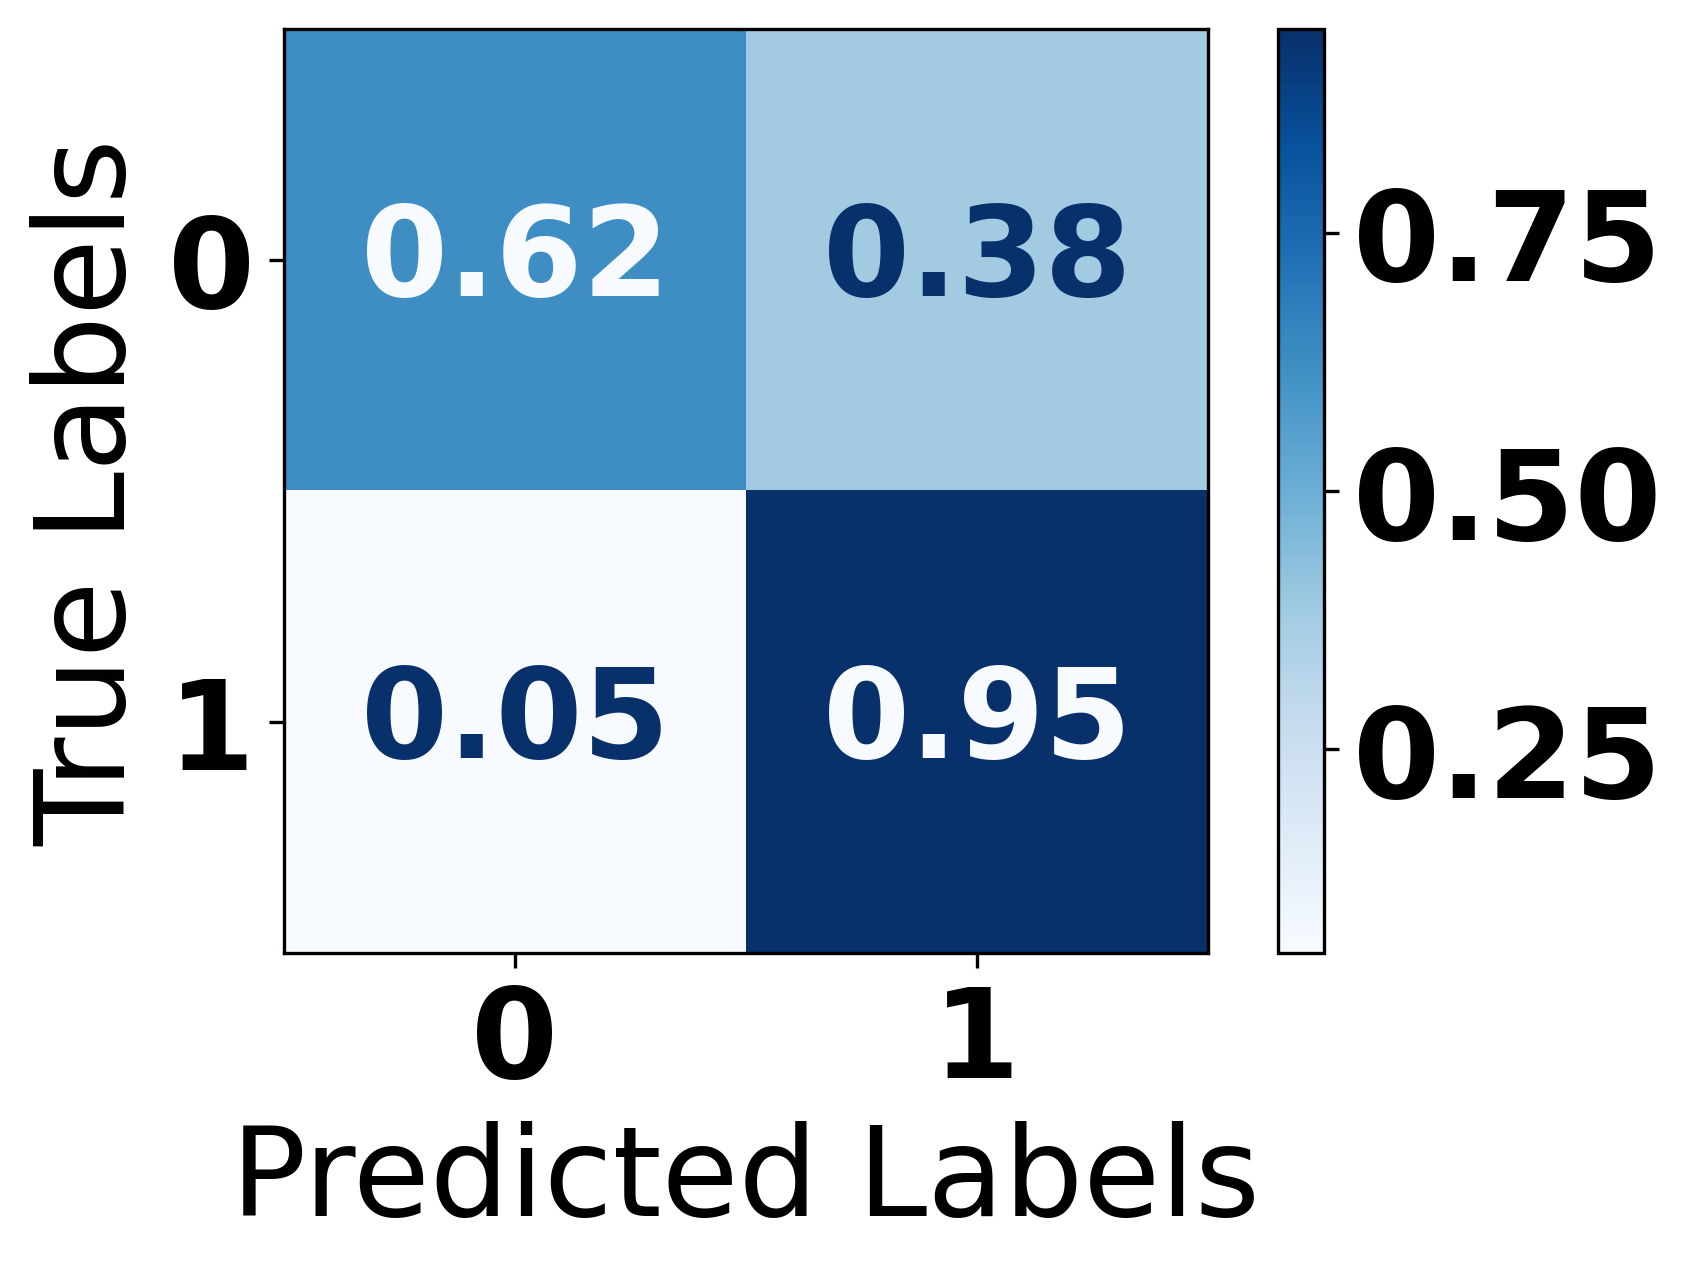

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.62      0.75        32
           1       0.60      0.95      0.73        19

    accuracy                           0.75        51
   macro avg       0.78      0.79      0.74        51
weighted avg       0.82      0.75      0.75        51

Train Accuracy: 0.8004385964912281
Test Accuracy: 0.7450980392156863


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=20, # Require lots of samples to split
    min_samples_leaf=25,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


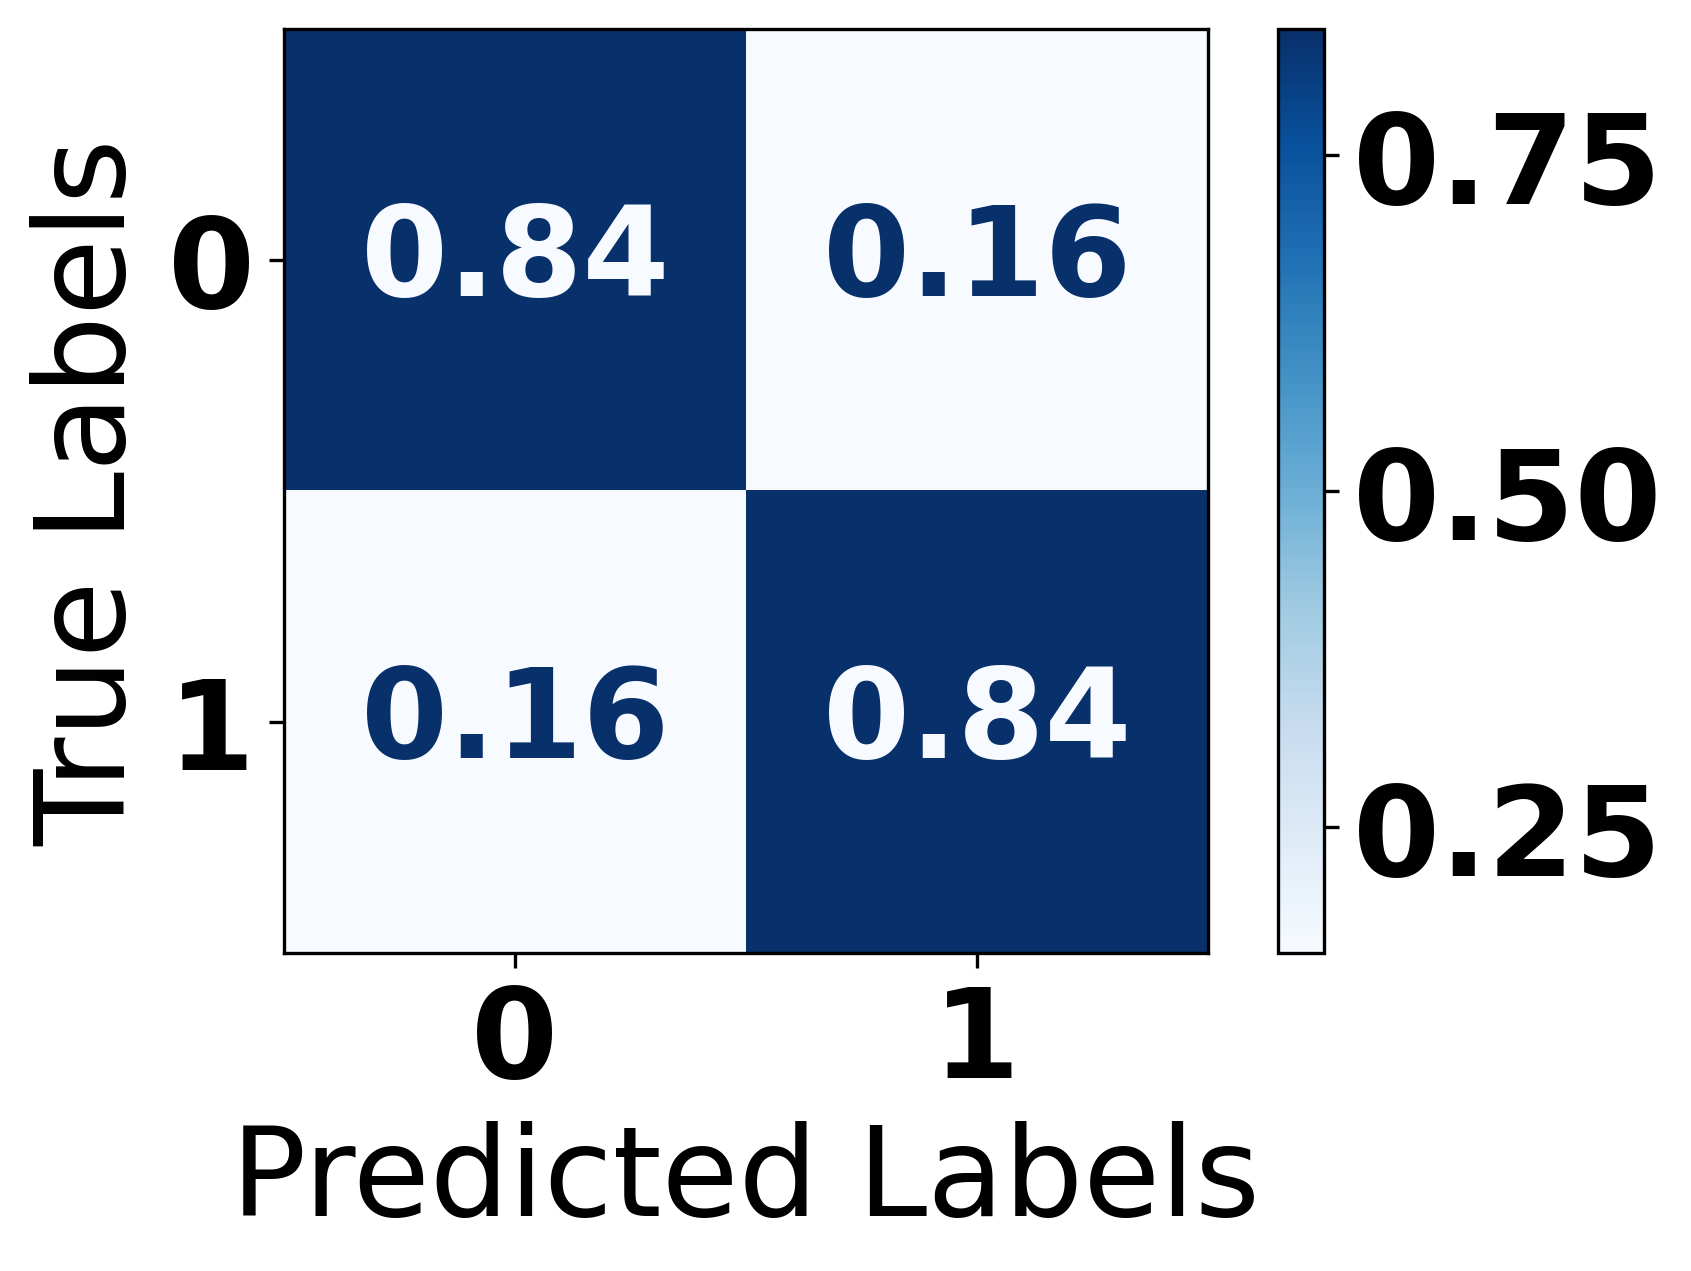

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.76      0.84      0.80        19

    accuracy                           0.84        51
   macro avg       0.83      0.84      0.84        51
weighted avg       0.85      0.84      0.84        51

Train Accuracy: 0.8048245614035088
Test Accuracy: 0.8431372549019608


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


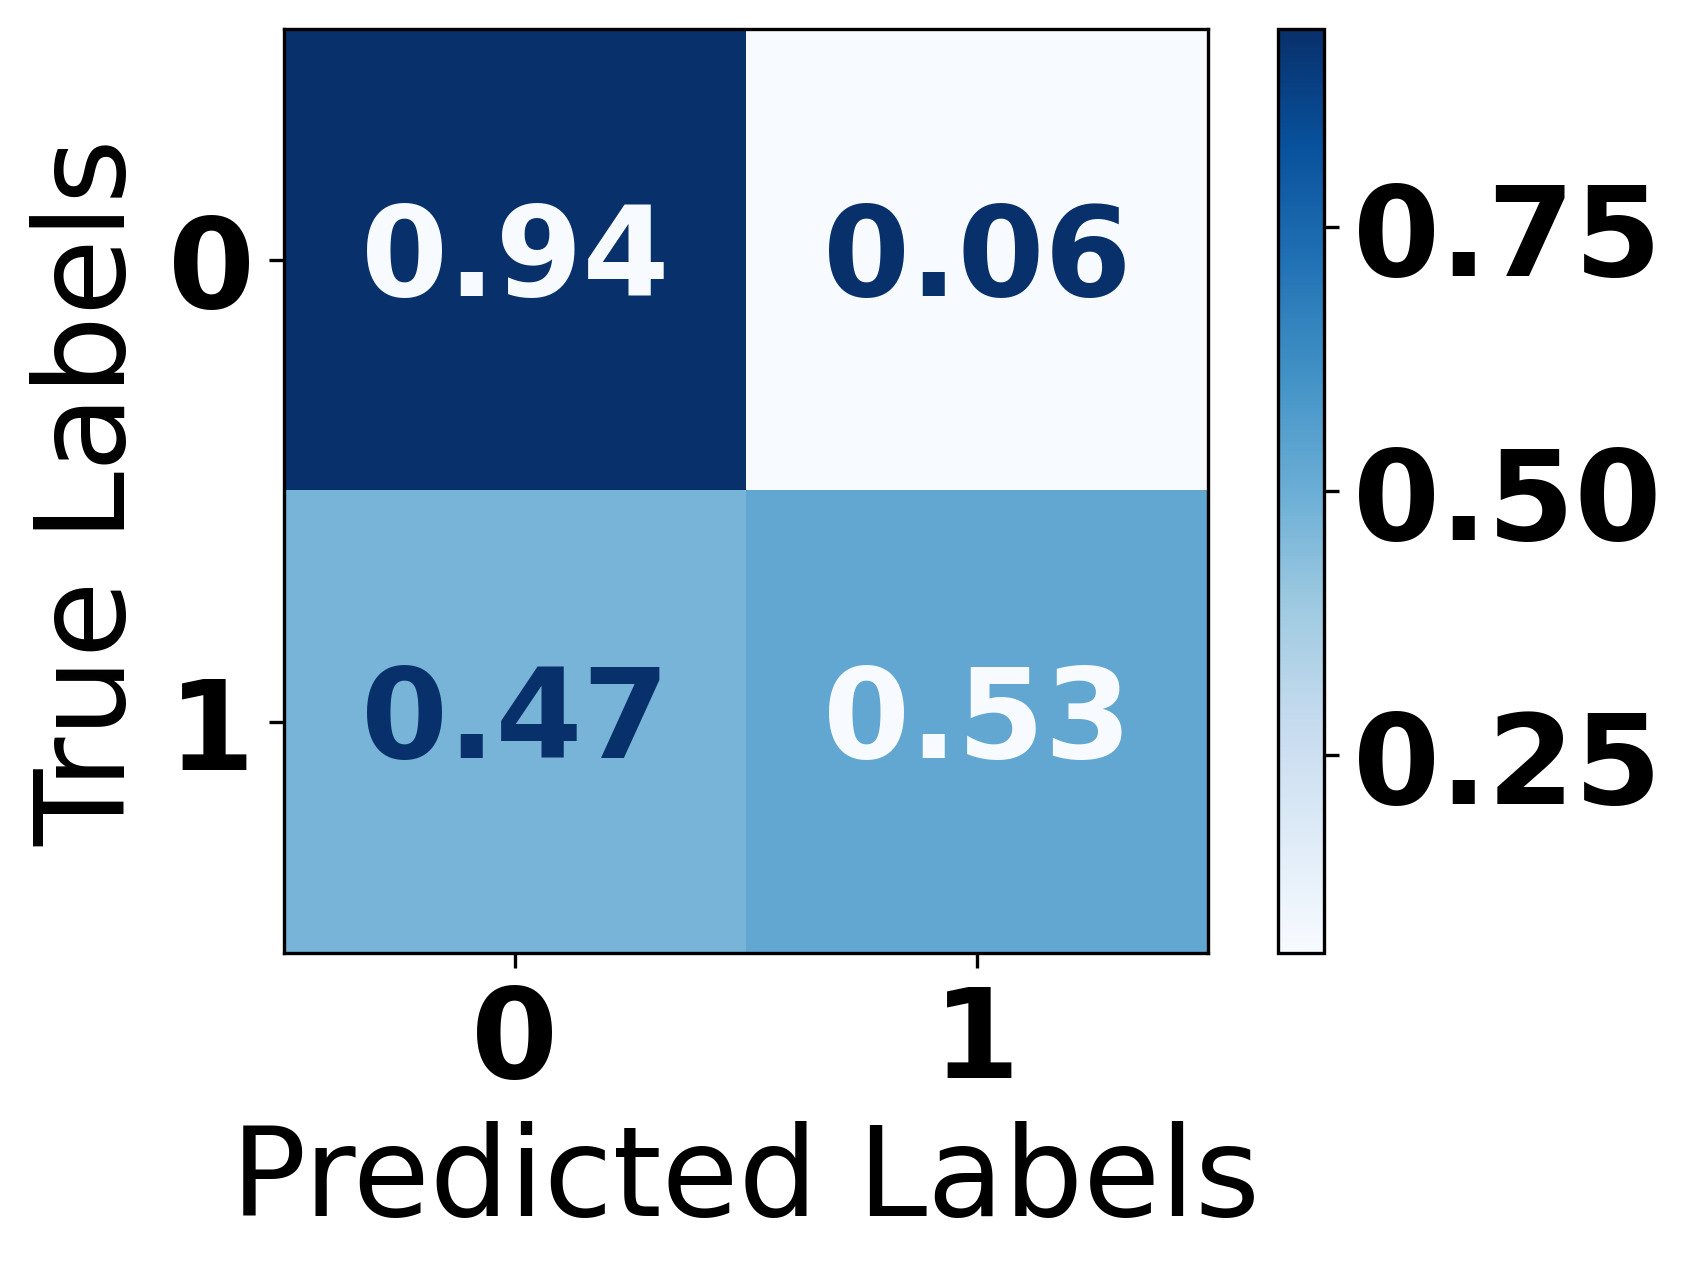

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.83      0.53      0.65        19

    accuracy                           0.78        51
   macro avg       0.80      0.73      0.75        51
weighted avg       0.79      0.78      0.77        51

Train Accuracy: 0.7105263157894737
Test Accuracy: 0.7843137254901961


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.78125    0.21875   ]
 [0.15789474 0.84210526]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.78      0.83        32
     Class 1       0.70      0.84      0.76        19

    accuracy                           0.80        51
   macro avg       0.79      0.81      0.80        51
weighted avg       0.82      0.80      0.81        51



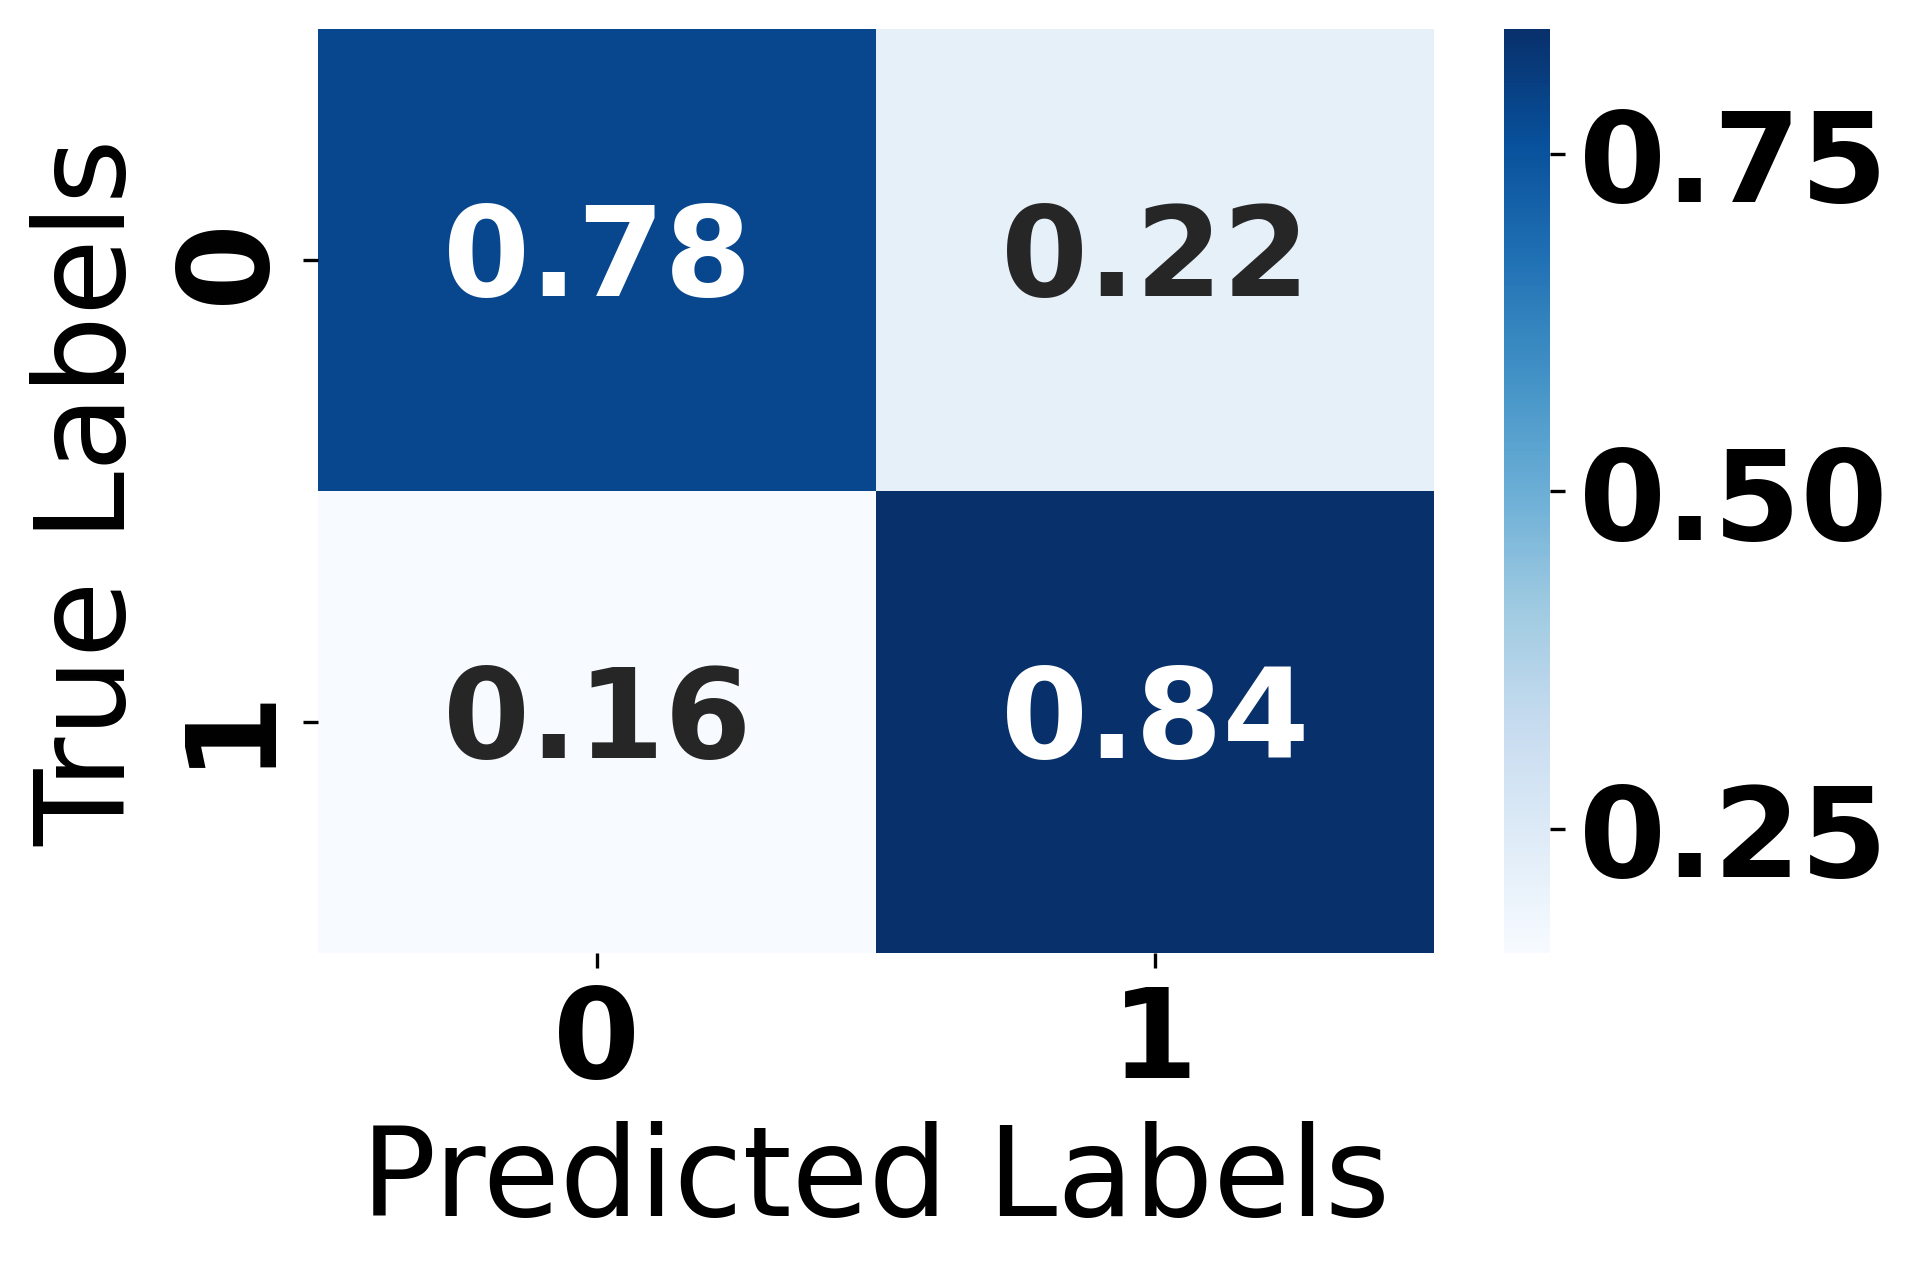

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/MLP.pkl')

In [ ]:
import numpy as np

# Convert to NumPy arrays if not already
x_train = np.array(x_train)
x_test = np.array(x_test)

# Reshape to (samples, timesteps, features=1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 604ms/step - accuracy: 0.4826 - loss: 11.4981 - val_accuracy: 0.3725 - val_loss: 18.9995
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6898 - loss: 6.0179 - val_accuracy: 0.6275 - val_loss: 3.2283
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4783 - loss: 3.6370 - val_accuracy: 0.3725 - val_loss: 7.5896
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7221 - loss: 3.2422 - val_accuracy: 0.7255 - val_loss: 0.5637
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6155 - loss: 1.1990 - val_accuracy: 0.6078 - val_loss: 0.9924
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7483 - loss: 1.1653 - val_accuracy: 0.4510 - val_loss: 1.7448
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6976 - loss: 0.9307 - val_accuracy: 0.7451 - val_loss: 0.5543
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6806 - loss: 0.8499 - val_accuracy: 0.4510 - val_loss: 1.56

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step
Normalized Confusion Matrix:
[[0.25 0.75]
 [0.   1.  ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.25      0.40        32
     Class 1       0.44      1.00      0.61        19

    accuracy                           0.53        51
   macro avg       0.72      0.62      0.51        51
weighted avg       0.79      0.53      0.48        51



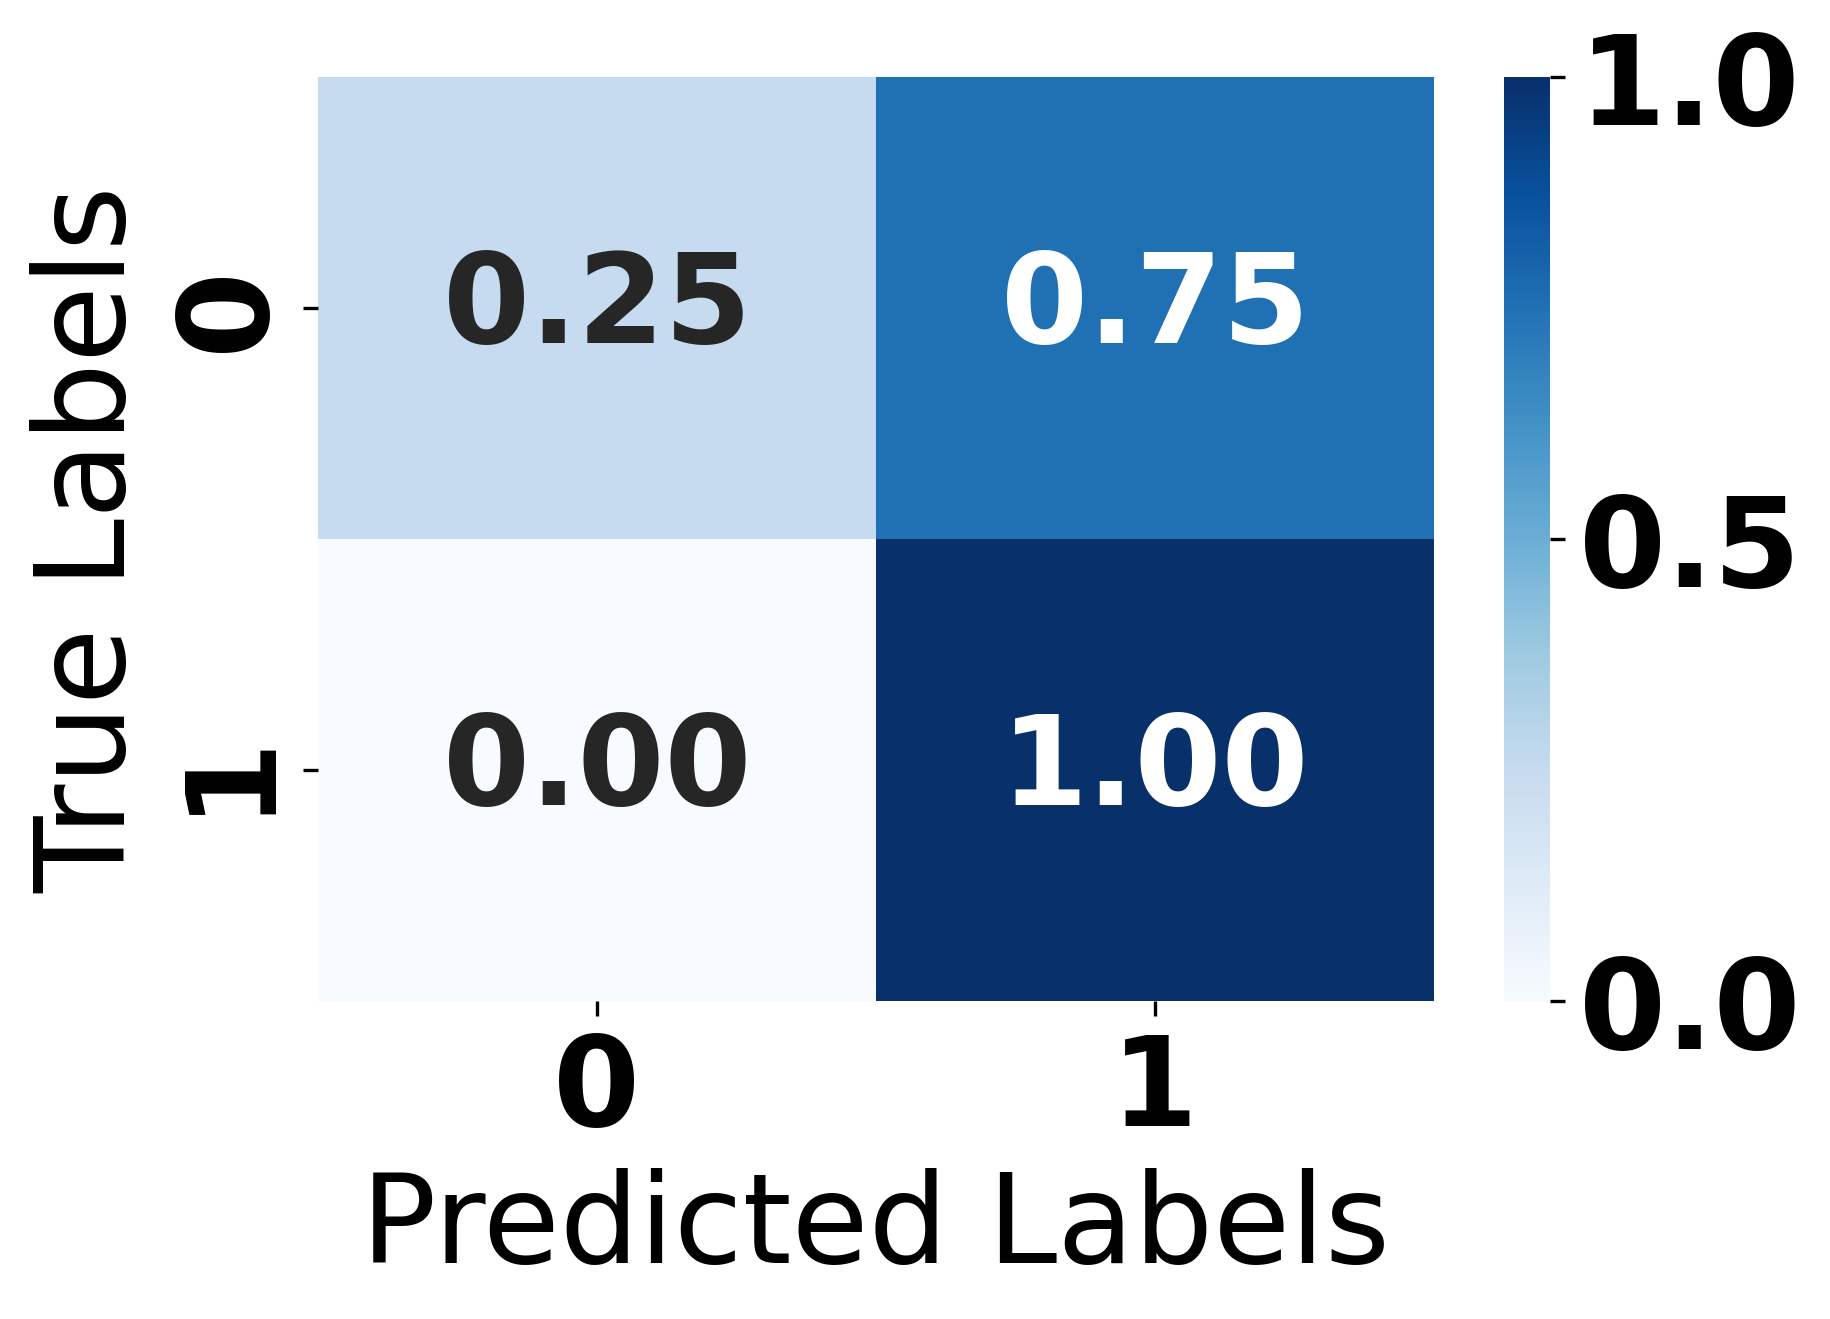

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4904 - loss: 0.8845 - val_accuracy: 0.4510 - val_loss: 3.4008
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6305 - loss: 0.6732 - val_accuracy: 0.5294 - val_loss: 1.9535
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6603 - loss: 0.6449 - val_accuracy: 0.6275 - val_loss: 0.9100
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6843 - loss: 0.6130 - val_accuracy: 0.6667 - val_loss: 0.6192
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6666 - loss: 0.6550 - val_accuracy: 0.6275 - val_loss: 0.9034
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6881 - loss: 0.6177 - val_accuracy: 0.5098 - val_loss: 1.2442
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6740 - loss: 0.6114 - val_accuracy: 0.4510 - val_loss: 1.6288
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7122 - loss: 0.5810 - val_accuracy: 0.4510 - val_loss: 1.6718
Ep

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Normalized Confusion Matrix:
[[0.15625 0.84375]
 [0.      1.     ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.16      0.27        32
     Class 1       0.41      1.00      0.58        19

    accuracy                           0.47        51
   macro avg       0.71      0.58      0.43        51
weighted avg       0.78      0.47      0.39        51



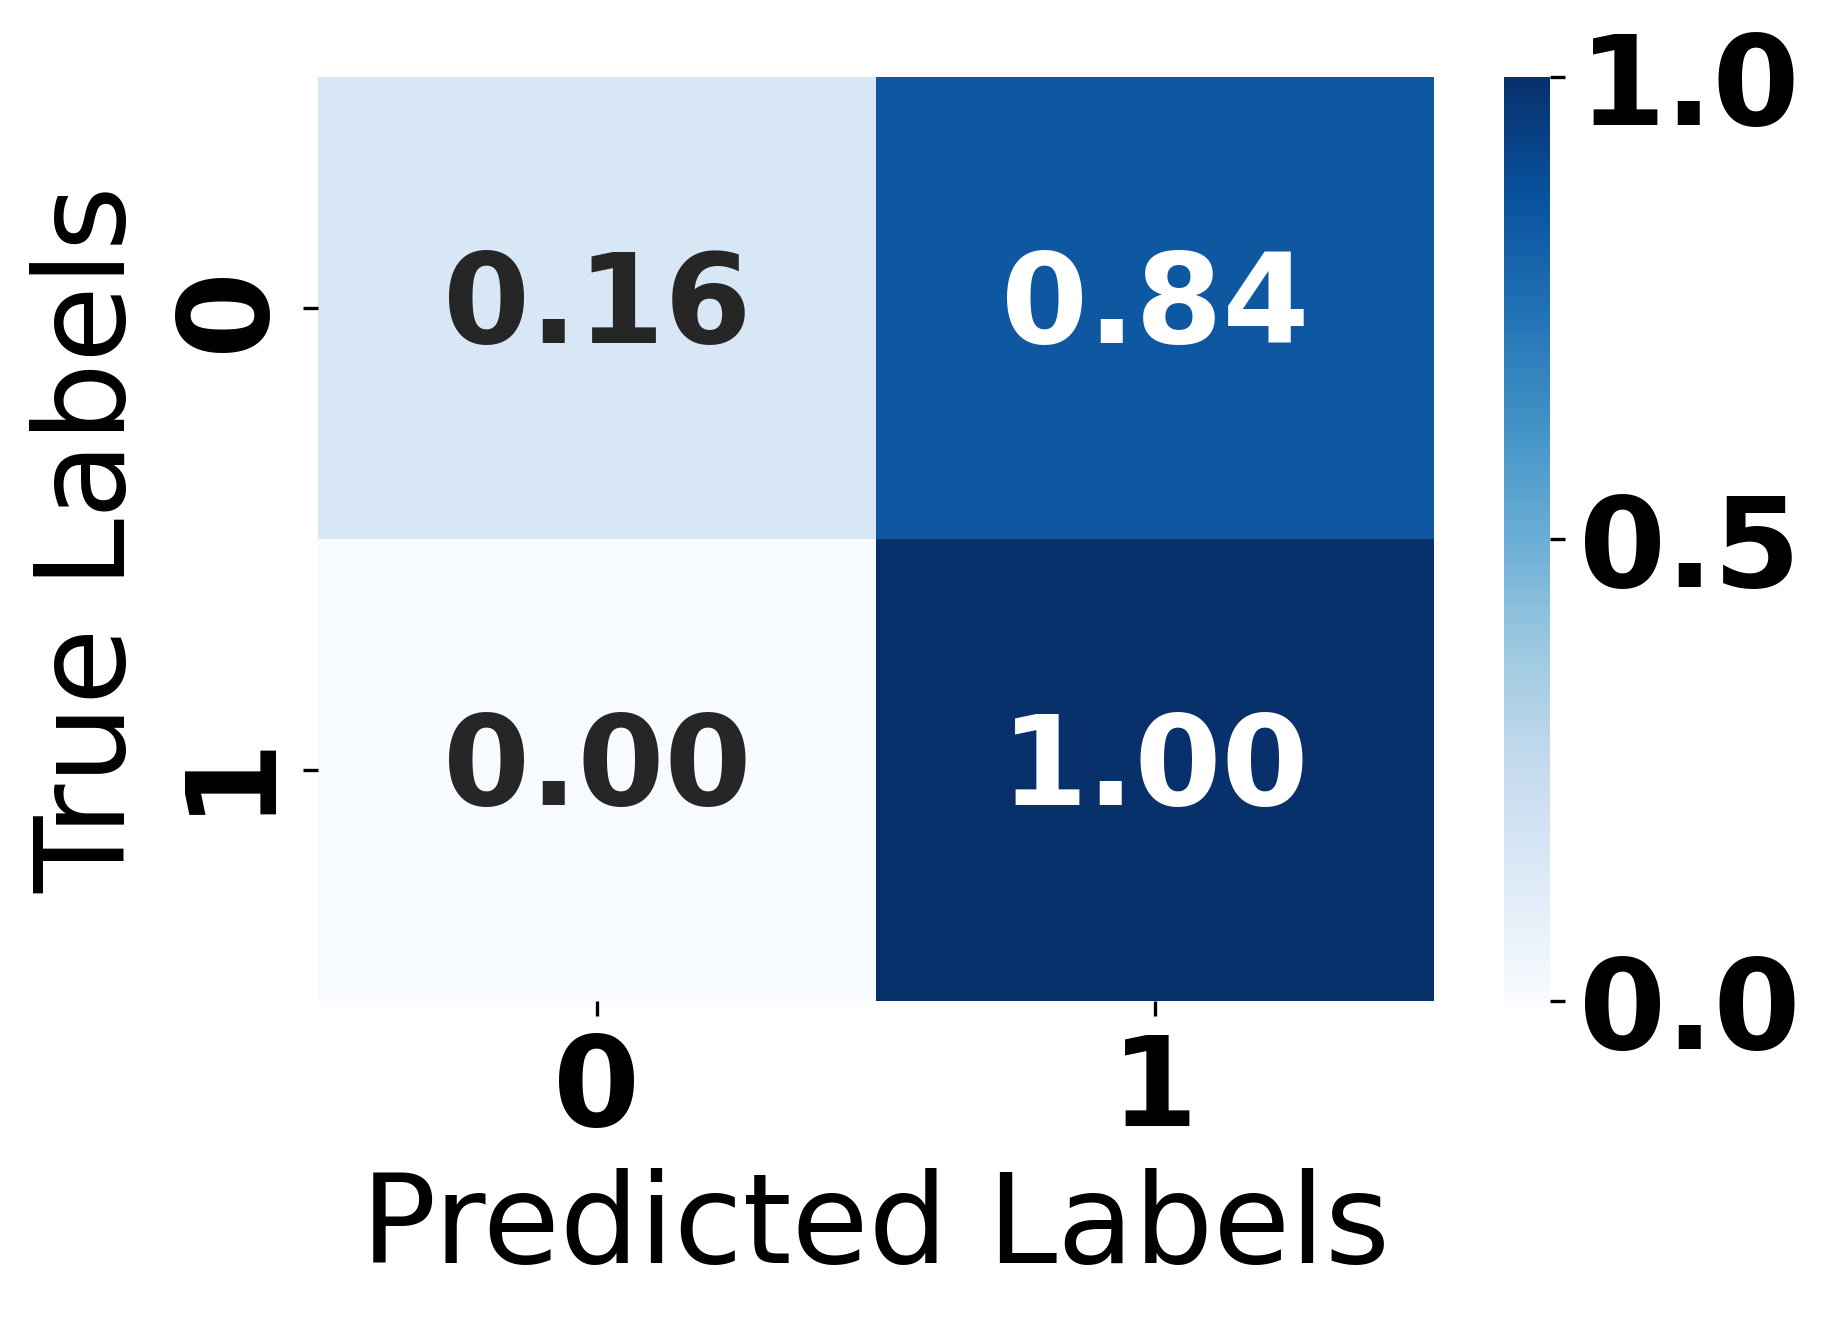

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/ANN.h5')
""""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 20000  # This should be set according to your dataset
embed_dim = 128  # Embedding size for each token
ff_dim = 128  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3481 - loss: 0.7577 - val_accuracy: 0.6667 - val_loss: 0.6826
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5236 - loss: 0.6848 - val_accuracy: 0.3725 - val_loss: 0.7194
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6702 - loss: 0.6532 - val_accuracy: 0.3725 - val_loss: 0.7450
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6858 - loss: 0.6419 - val_accuracy: 0.3725 - val_loss: 0.7637
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7052 - loss: 0.6308 - val_accuracy: 0.3725 - val_loss: 0.7767
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7281 - loss: 0.6151 - val_accuracy: 0.3725 - val_loss: 0.7870
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7192 - loss: 0.5980 - val_accuracy: 0.3725 - val_loss: 0.7951
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7146 - loss: 0.5899 - val_accuracy: 0.3725 - val_loss: 0.8026
Epoch 9/20
4

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Normalized Confusion Matrix:
[[0.4375 0.5625]
 [0.     1.    ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.44      0.61        32
     Class 1       0.51      1.00      0.68        19

    accuracy                           0.65        51
   macro avg       0.76      0.72      0.64        51
weighted avg       0.82      0.65      0.63        51



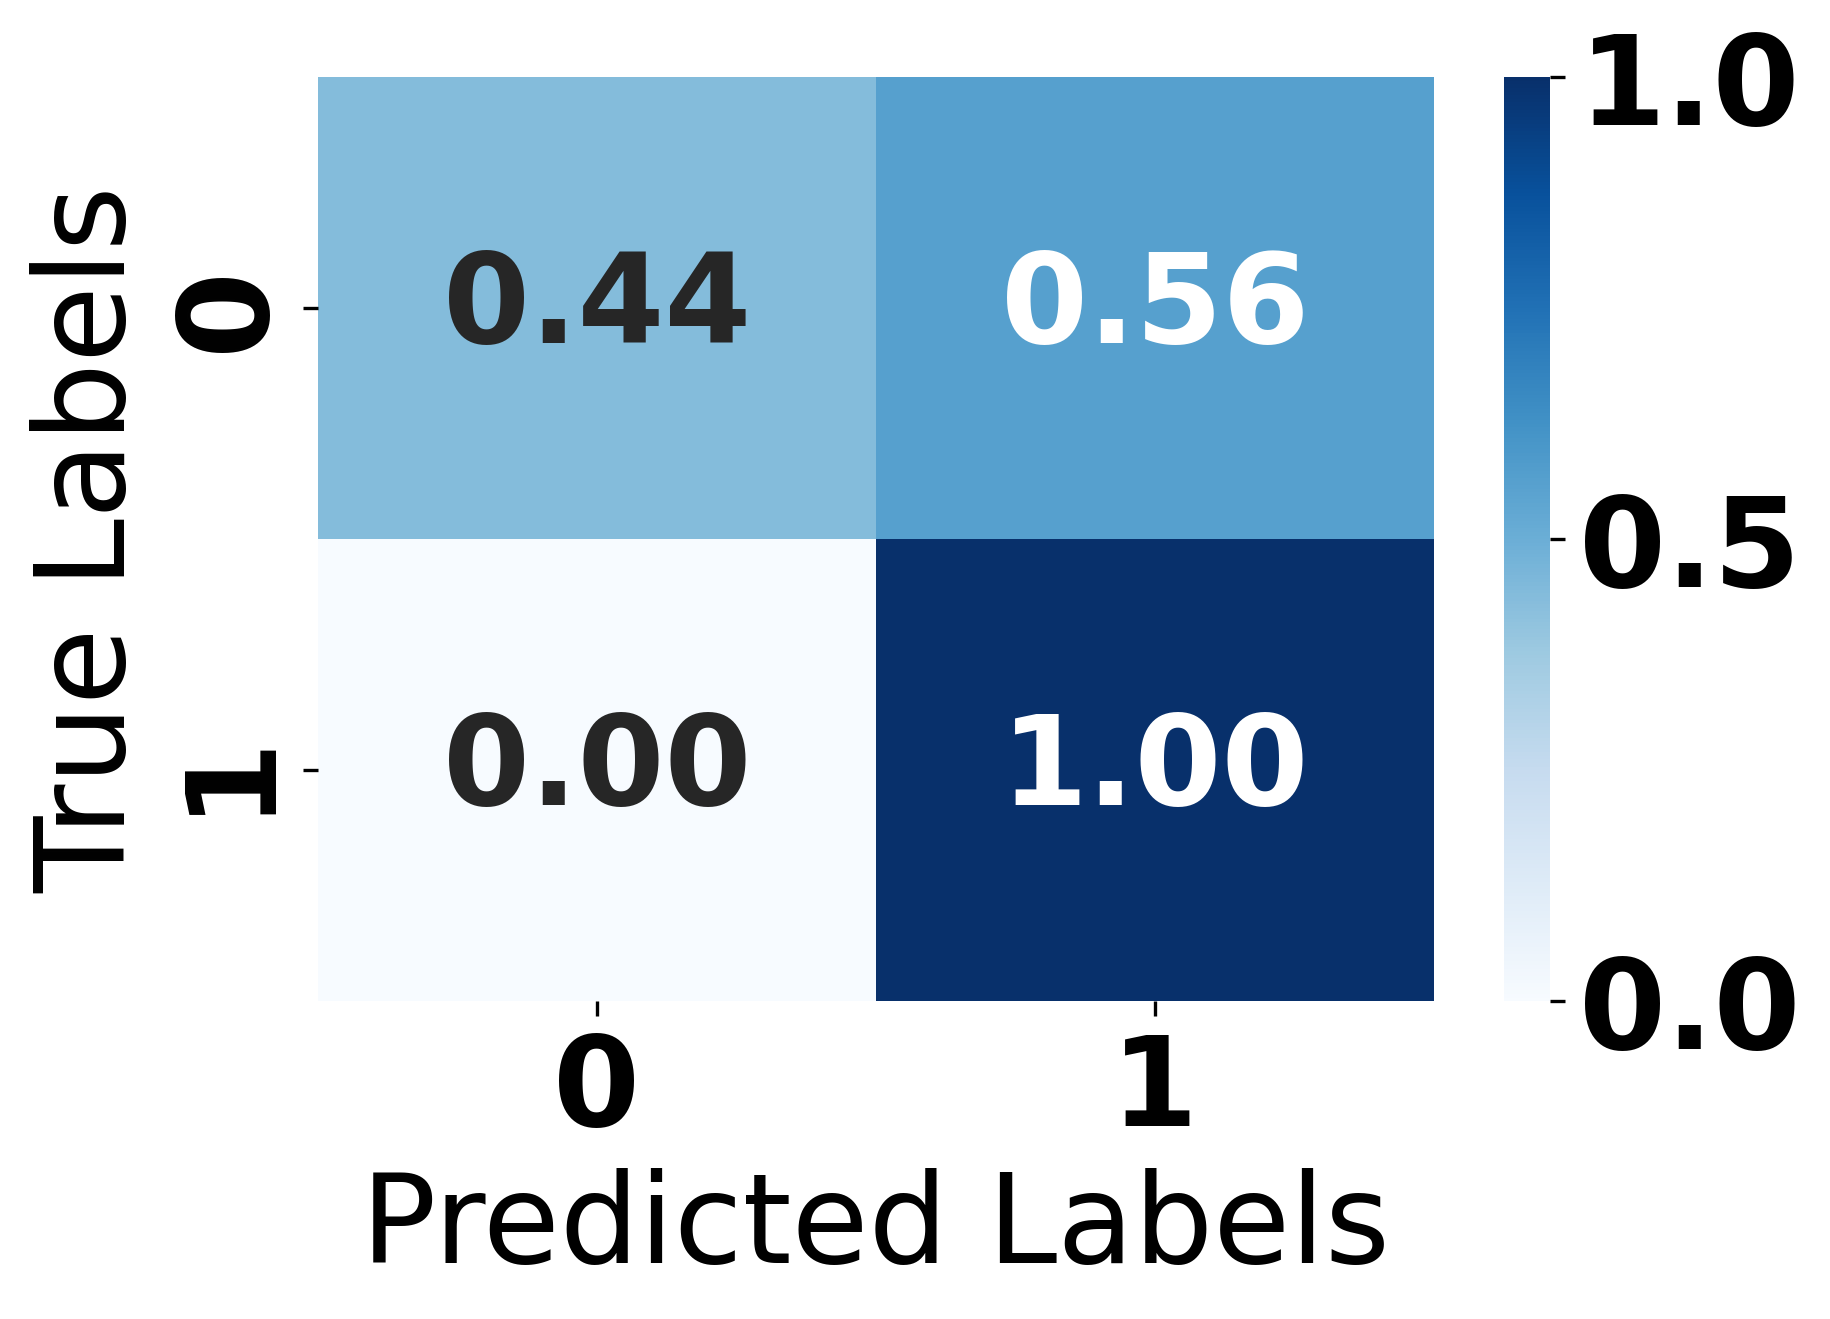

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/CTGAN for Synthetic Data Generation/model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=114, training_loss=0.8767036743331373, metrics={'train_runtime': 101.1609, 'train_samples_per_second': 4.508, 'train_steps_per_second': 1.127, 'total_flos': 0.0, 'train_loss': 0.8767036743331373, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.8333    0.9375    0.8824        32
           1     0.8667    0.6842    0.7647        19

    accuracy                         0.8431        51
   macro avg     0.8500    0.8109    0.8235        51
weighted avg     0.8458    0.8431    0.8385        51

Confusion Matrix:
 [[30  2]
 [ 6 13]]


### TVAE (Tabular Variational Autoencoder)

In [ ]:
from ctgan import TVAE
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices (UCI Heart Disease)
categorical_features = [1, 2, 5, 6, 8, 10, 11, 12]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Combine x_train and y_train into one DataFrame
x_train['target'] = y_train

# Print original distribution
print("Before TVAE:", Counter(y_train))

# Separate minority class (1)
minority_df = x_train[x_train['target'] == 1]

# Estimate how many synthetic samples you want
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get categorical column names from indices
categorical_columns = x_train.columns[categorical_features].tolist() + ['target']

# Fit TVAE on minority class
tvae = TVAE(epochs=300)
tvae.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic samples
synthetic_minority = tvae.sample(samples_to_generate)

# Ensure only class 1 is included
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and target
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final distribution
print("After TVAE:", Counter(y_resampled_df))

Before TVAE: Counter({np.int64(0): 128, np.int64(1): 118})
After TVAE: Counter({1: 328, 0: 128})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
59    29
60    24
51    23
54    22
55    22
56    21
61    21
62    21
58    20
57    20
63    18
53    18
52    17
44    13
64    13
50    11
65    11
67    11
66    11
48    10
45    10
42     9
47     9
41     9
49     8
43     8
46     7
68     6
39     6
69     5
40     4
71     4
35     3
70     3
74     2
37     1
76     1
34     1
38     1
77     1
72     1
36     1
Name: count, dtype: int64

Counts for sex:
sex
1    372
0     84
Name: count, dtype: int64

Counts for cp:
cp
4    330
3     70
2     37
1     19
Name: count, dtype: int64

Counts for trestbps:
trestbps
130    40
120    34
140    33
110    18
128    18
       ..
165     1
98      1
109     1
113     1
107     1
Name: count, Length: 68, dtype: int64

Counts for chol:
chol
256    9
298    8
246    7
239    7
234    6
      ..
375    1
251    1
285    1
324    1
329    1
Name: count, Length: 168, dtype: int64

Counts for fbs:
fbs
0    416
1     40
Name: count, dtype: int64

Counts for restecg:
rest

## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

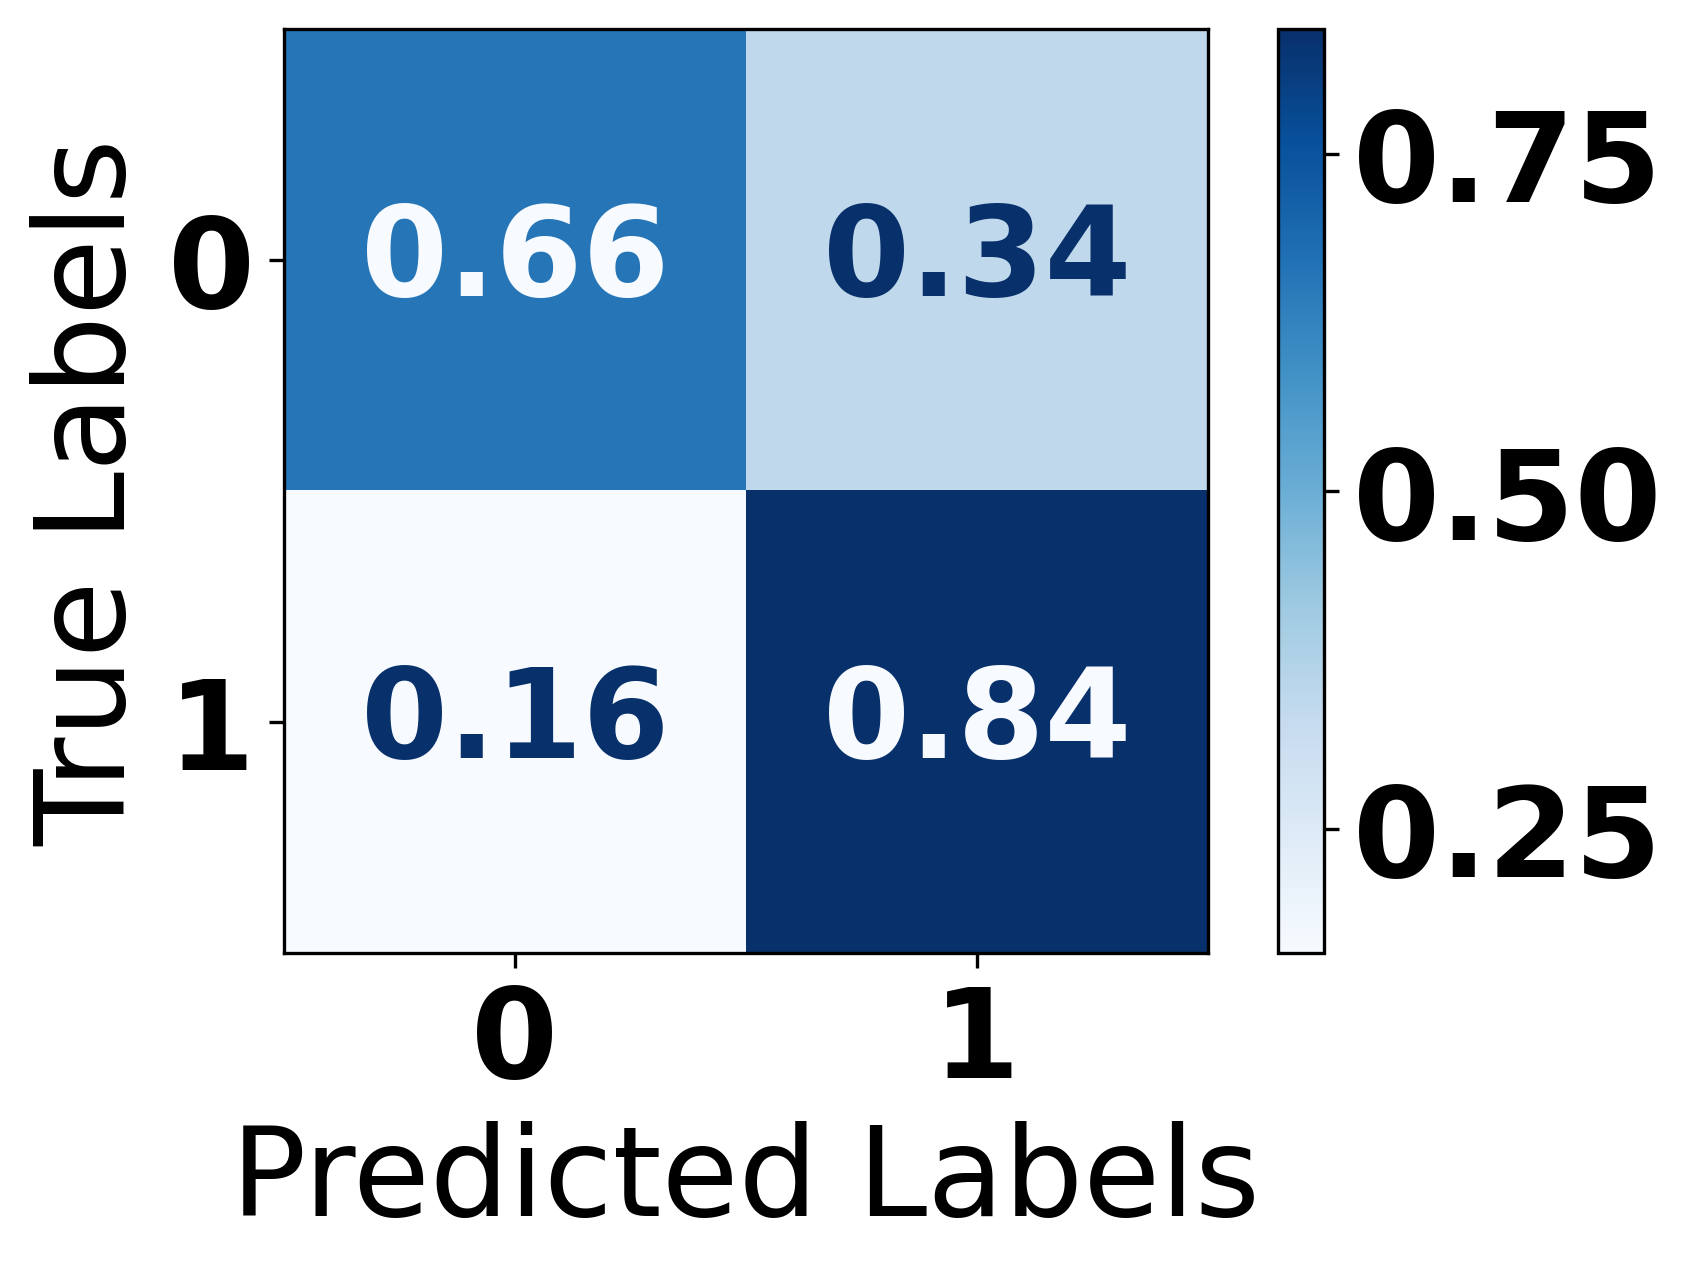

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.66      0.75        32
     Class 1       0.59      0.84      0.70        19

    accuracy                           0.73        51
   macro avg       0.73      0.75      0.72        51
weighted avg       0.77      0.73      0.73        51

Train Accuracy: 1.0
Test Accuracy: 0.7254901960784313


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


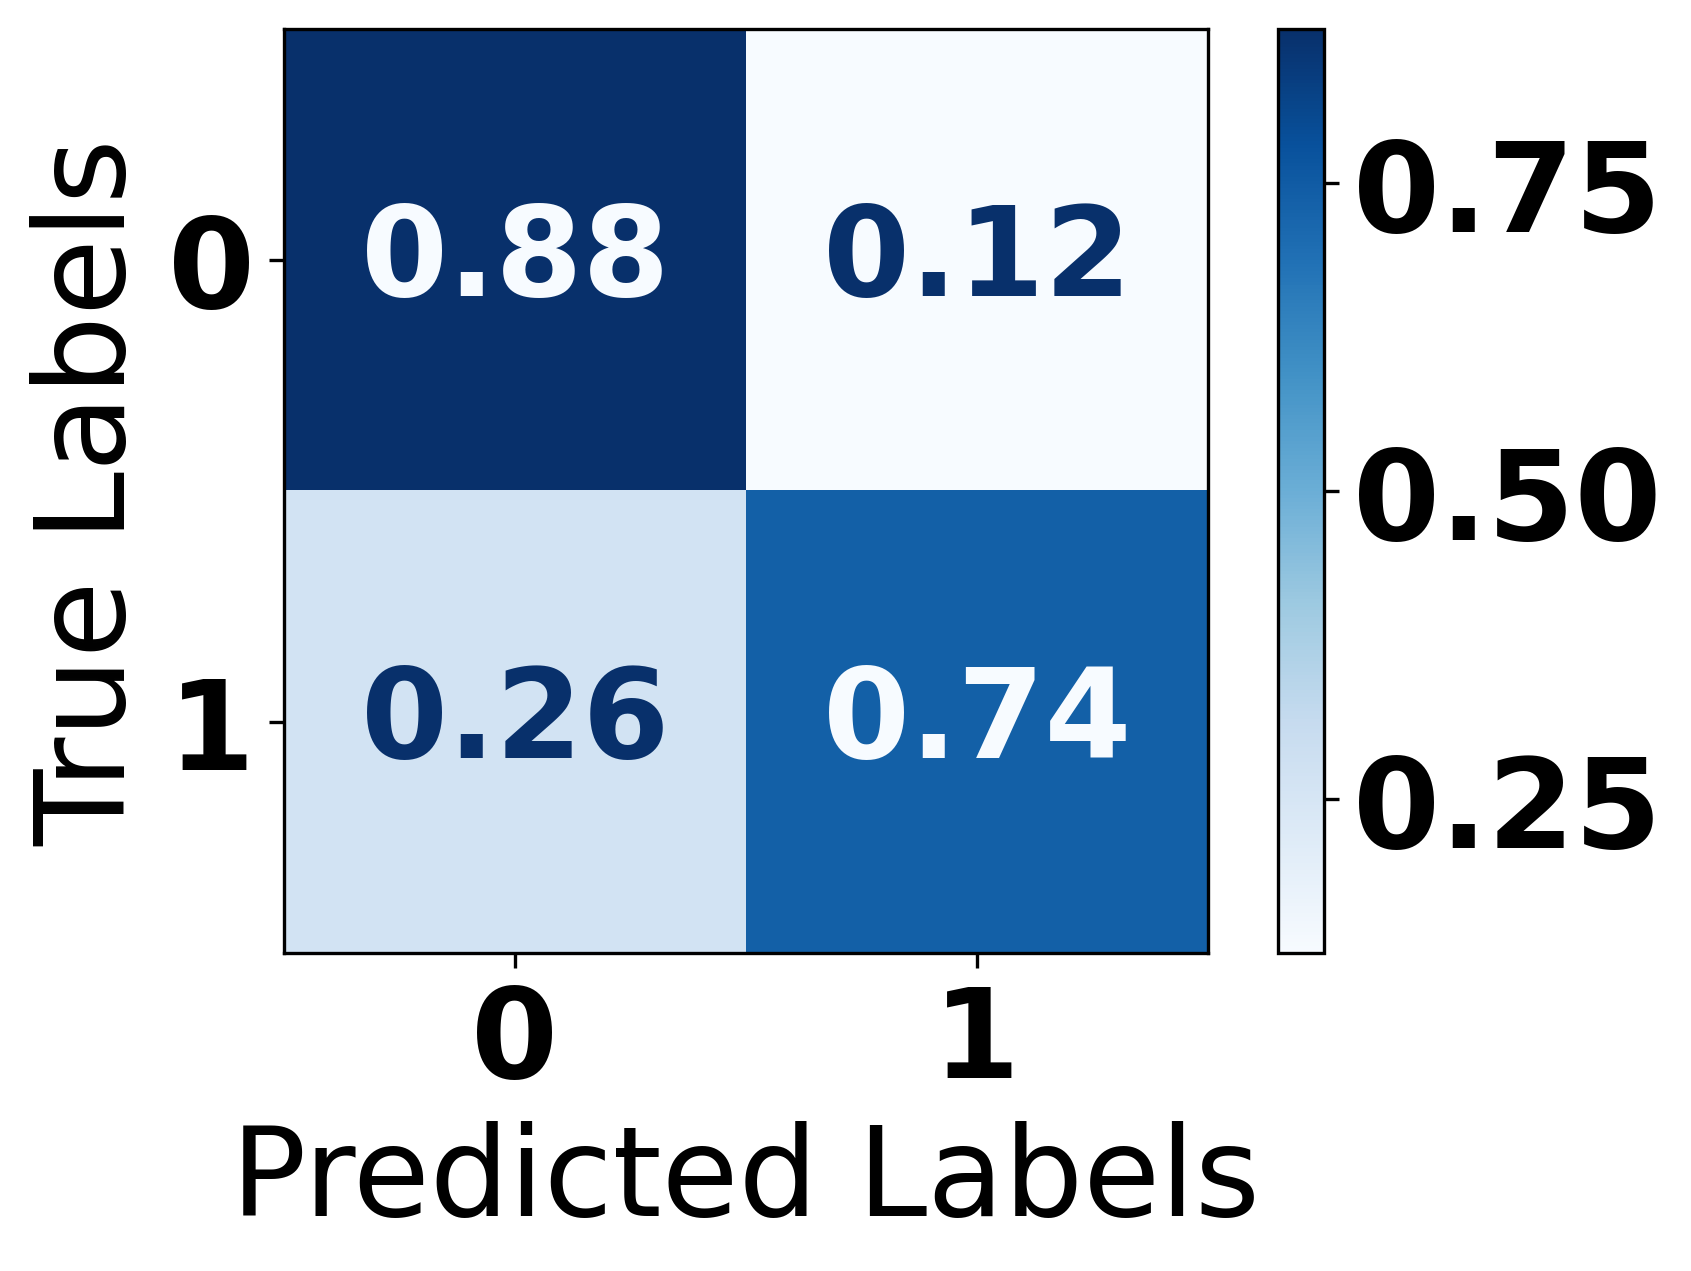

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86        32
     Class 1       0.78      0.74      0.76        19

    accuracy                           0.82        51
   macro avg       0.81      0.81      0.81        51
weighted avg       0.82      0.82      0.82        51

Train Accuracy: 0.8245614035087719
Test Accuracy: 0.8235294117647058


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


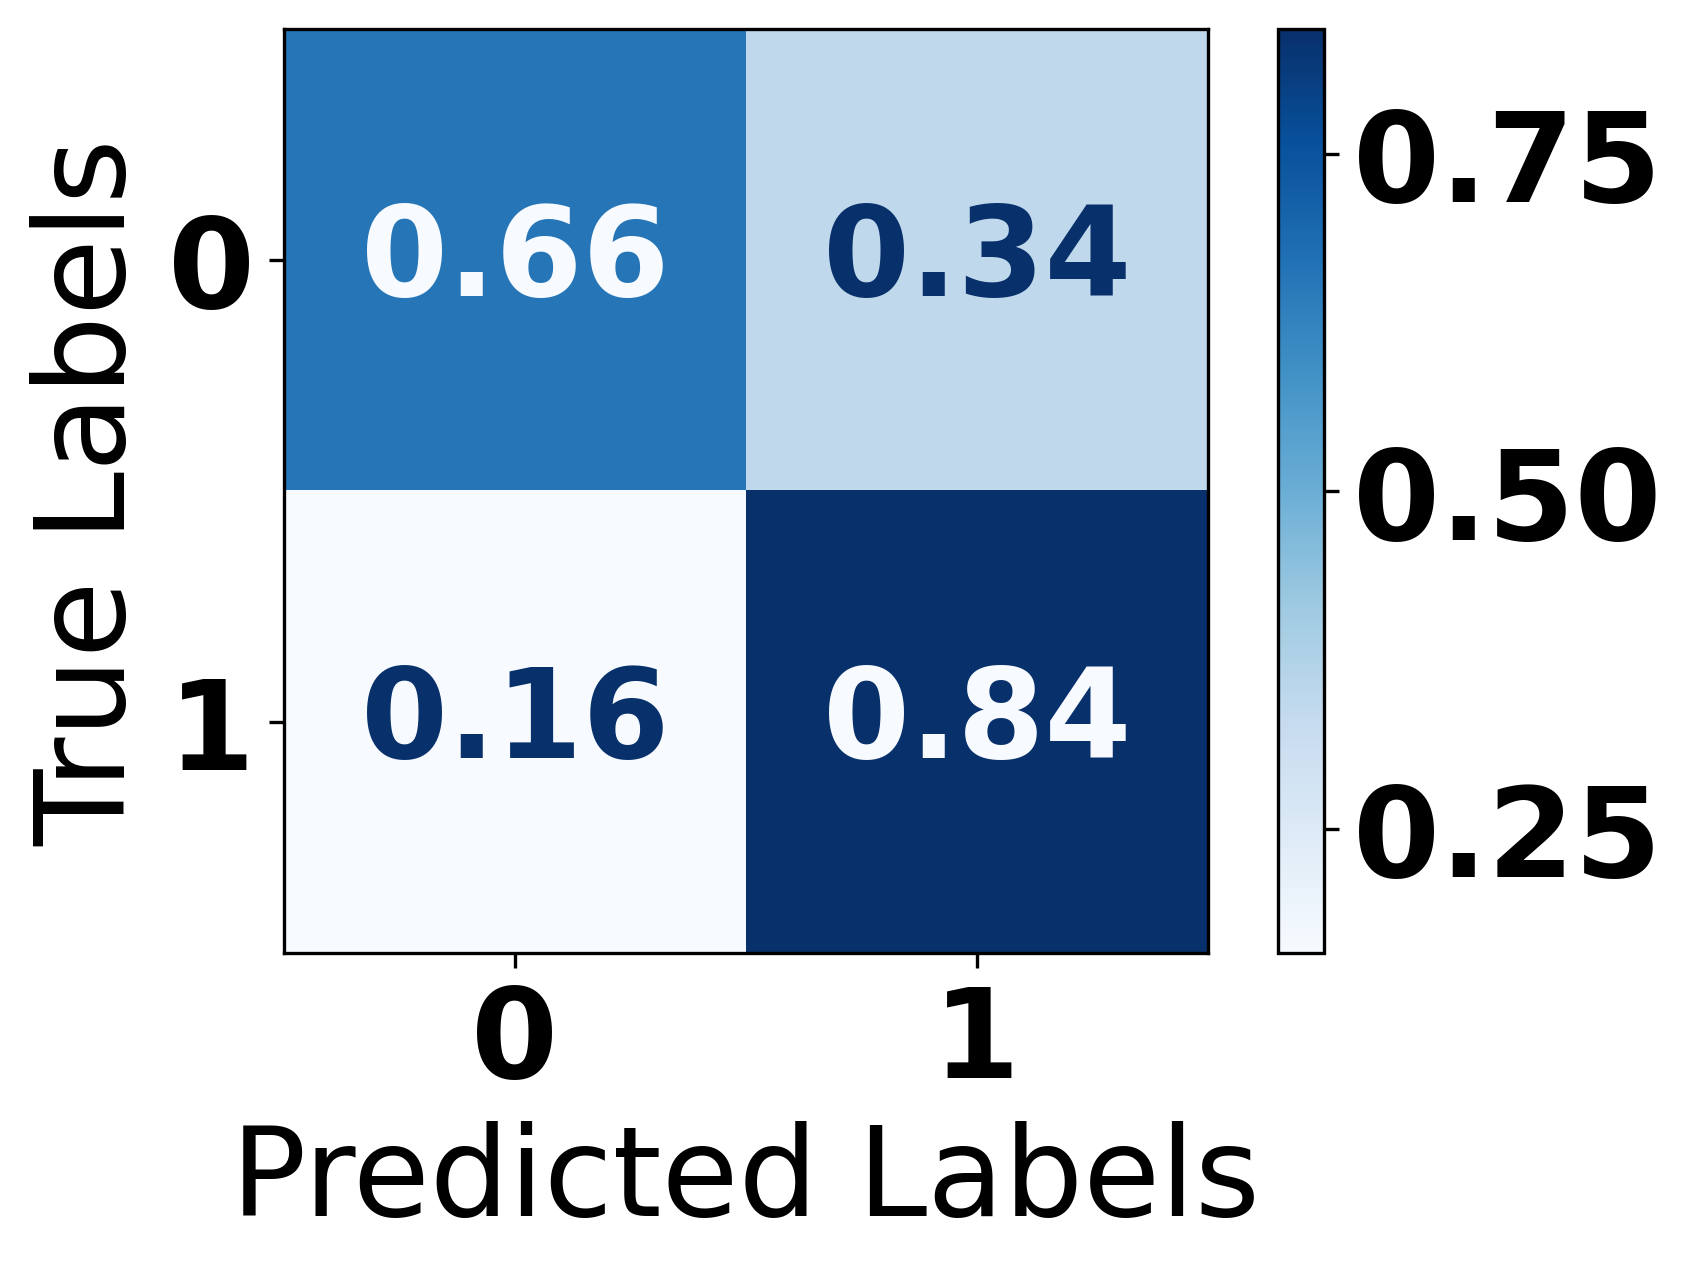

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.59      0.84      0.70        19

    accuracy                           0.73        51
   macro avg       0.73      0.75      0.72        51
weighted avg       0.77      0.73      0.73        51

Train Accuracy: 0.8399122807017544
Test Accuracy: 0.7254901960784313


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=20, # Require lots of samples to split
    min_samples_leaf=25,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


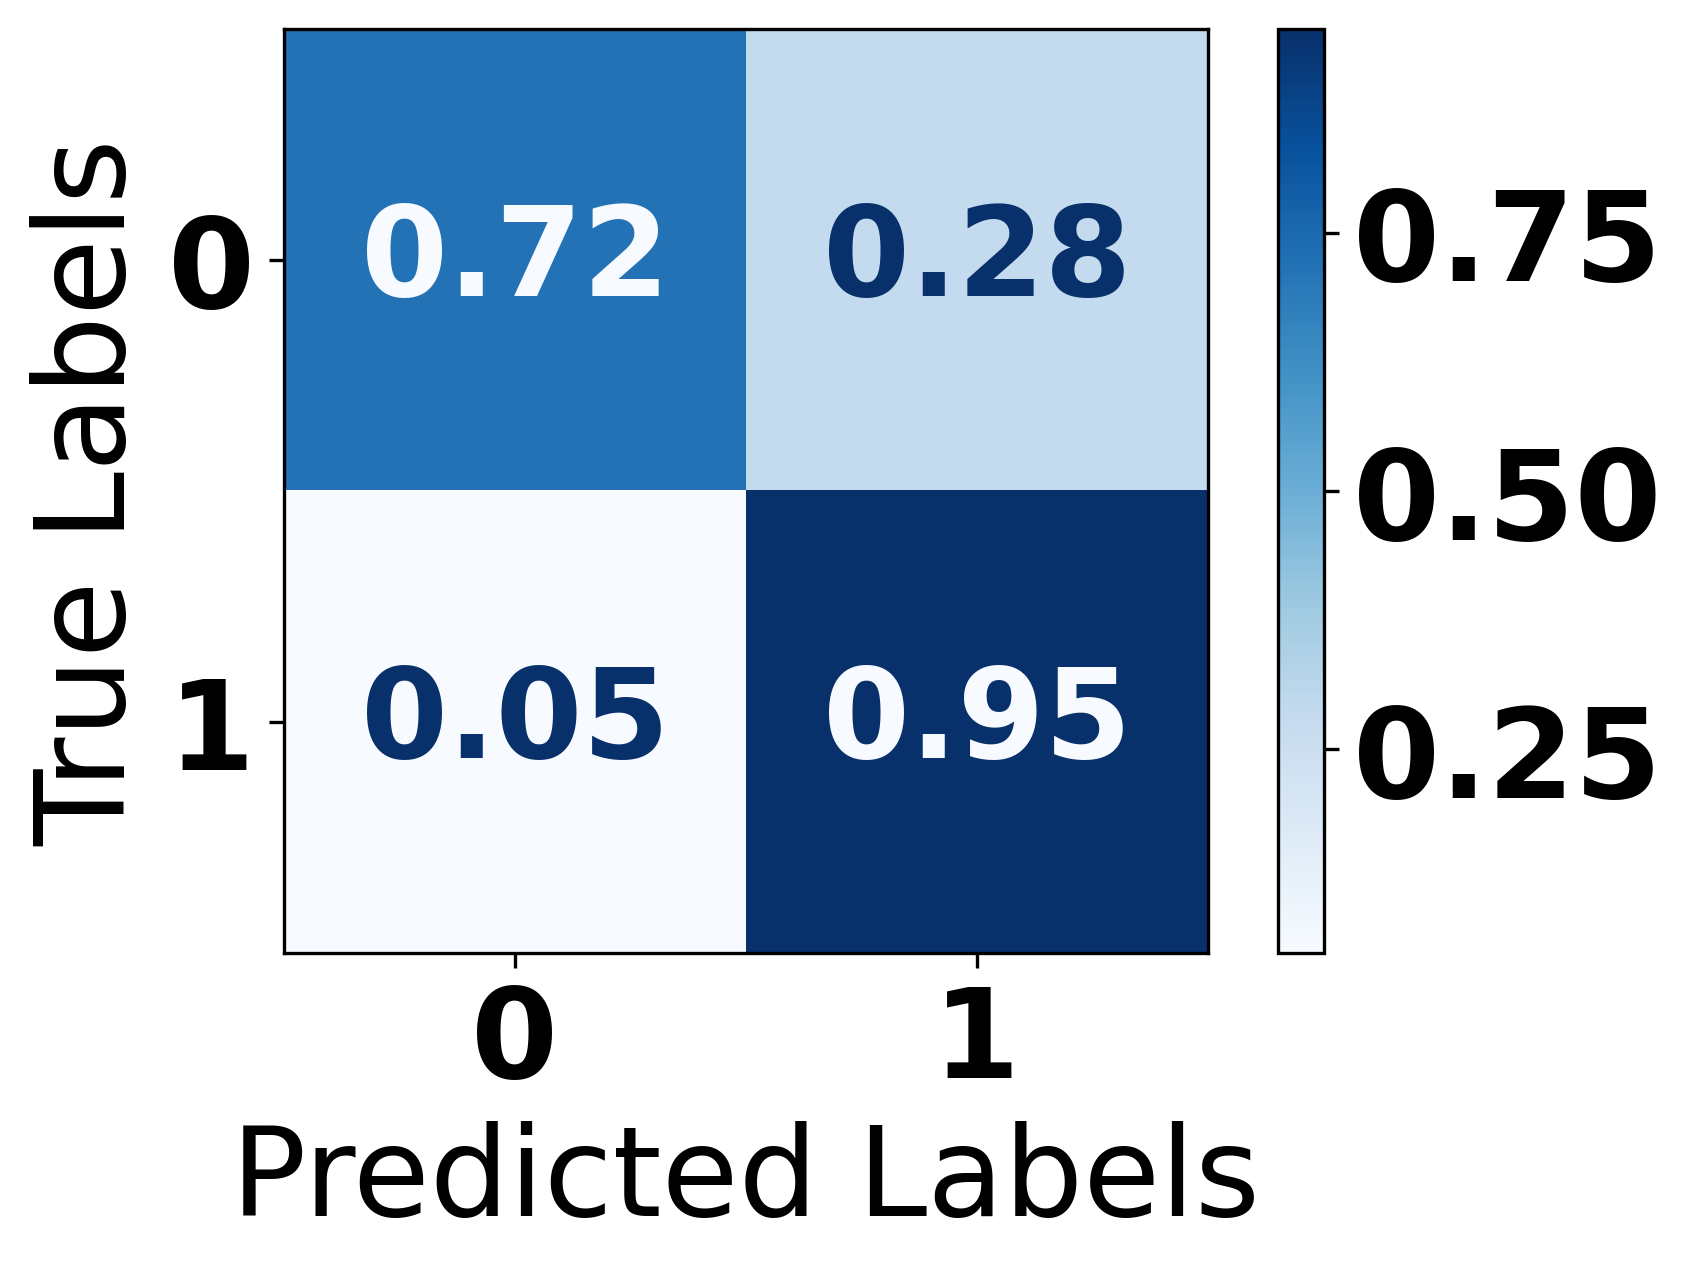

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82        32
           1       0.67      0.95      0.78        19

    accuracy                           0.80        51
   macro avg       0.81      0.83      0.80        51
weighted avg       0.85      0.80      0.81        51

Train Accuracy: 0.8486842105263158
Test Accuracy: 0.803921568627451


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


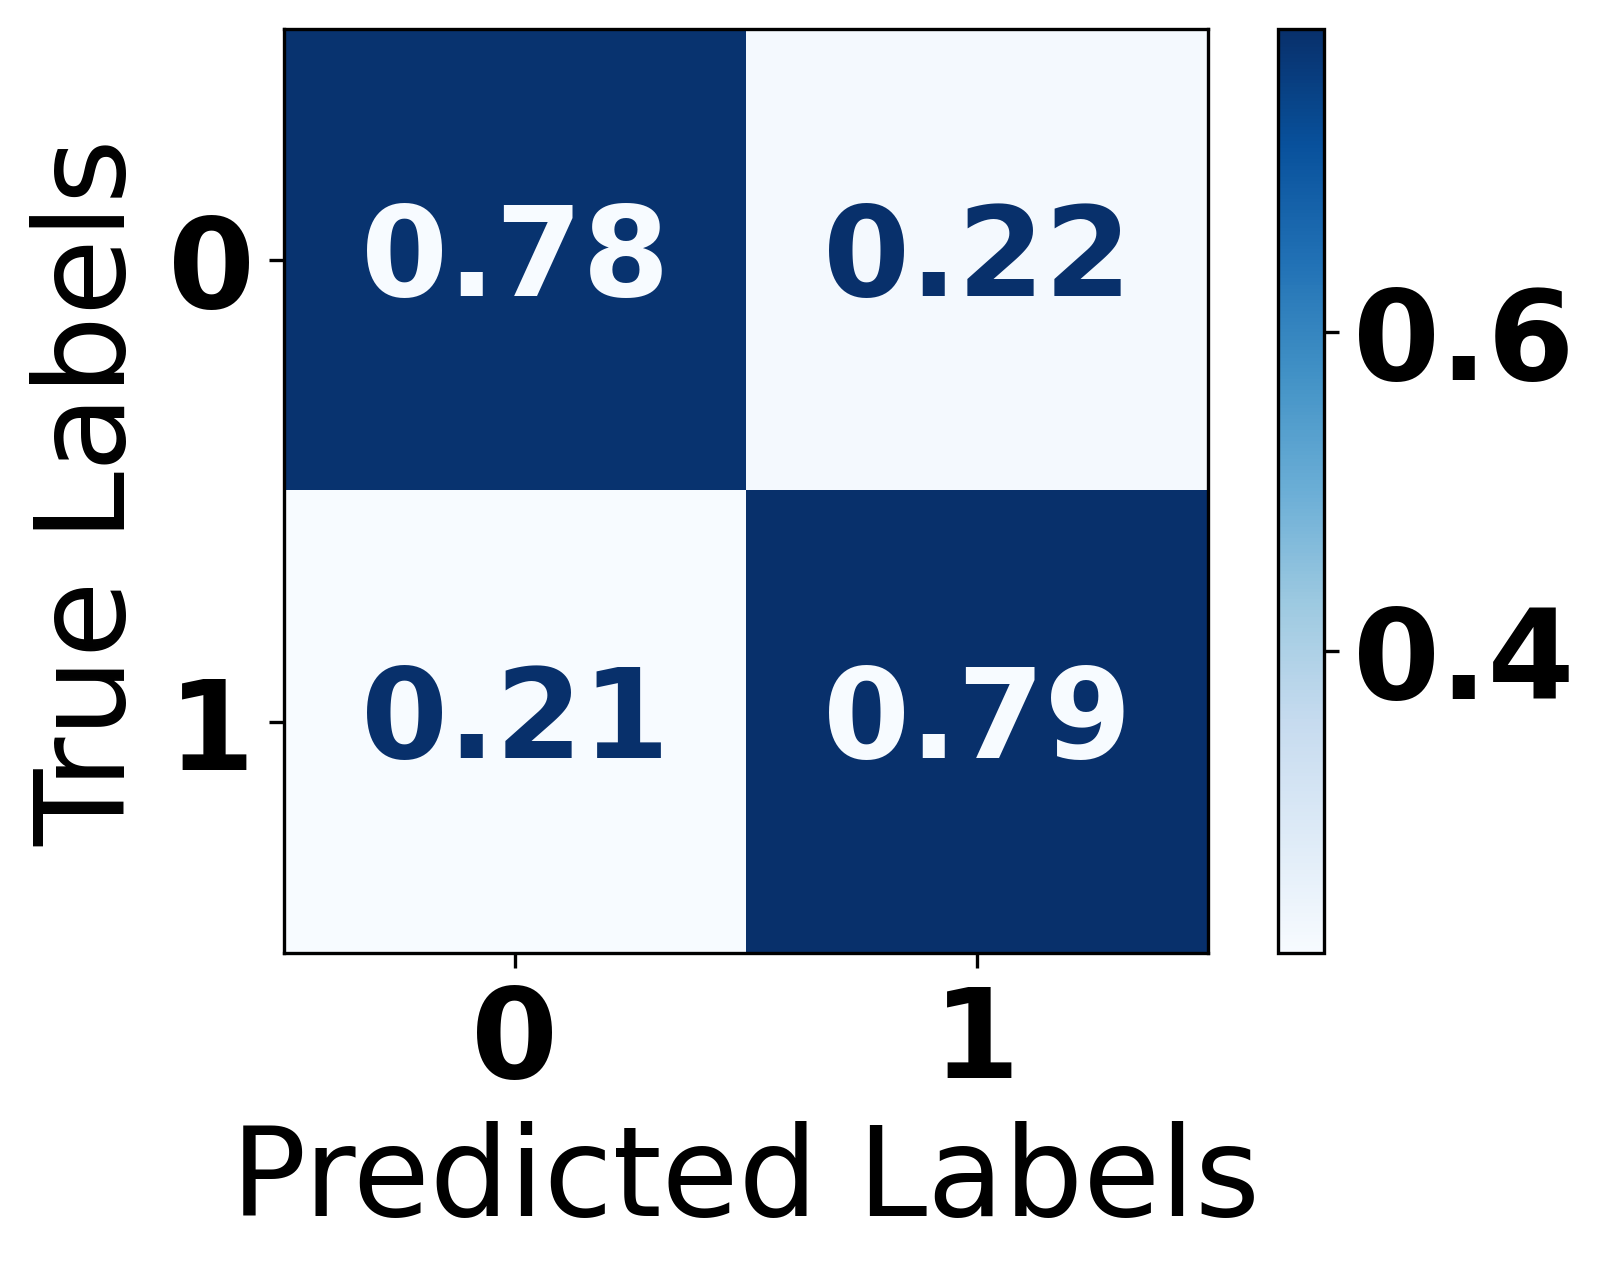

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.68      0.79      0.73        19

    accuracy                           0.78        51
   macro avg       0.77      0.79      0.78        51
weighted avg       0.79      0.78      0.79        51

Train Accuracy: 0.8640350877192983
Test Accuracy: 0.7843137254901961


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.53125    0.46875   ]
 [0.05263158 0.94736842]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.53      0.68        32
     Class 1       0.55      0.95      0.69        19

    accuracy                           0.69        51
   macro avg       0.74      0.74      0.69        51
weighted avg       0.80      0.69      0.68        51



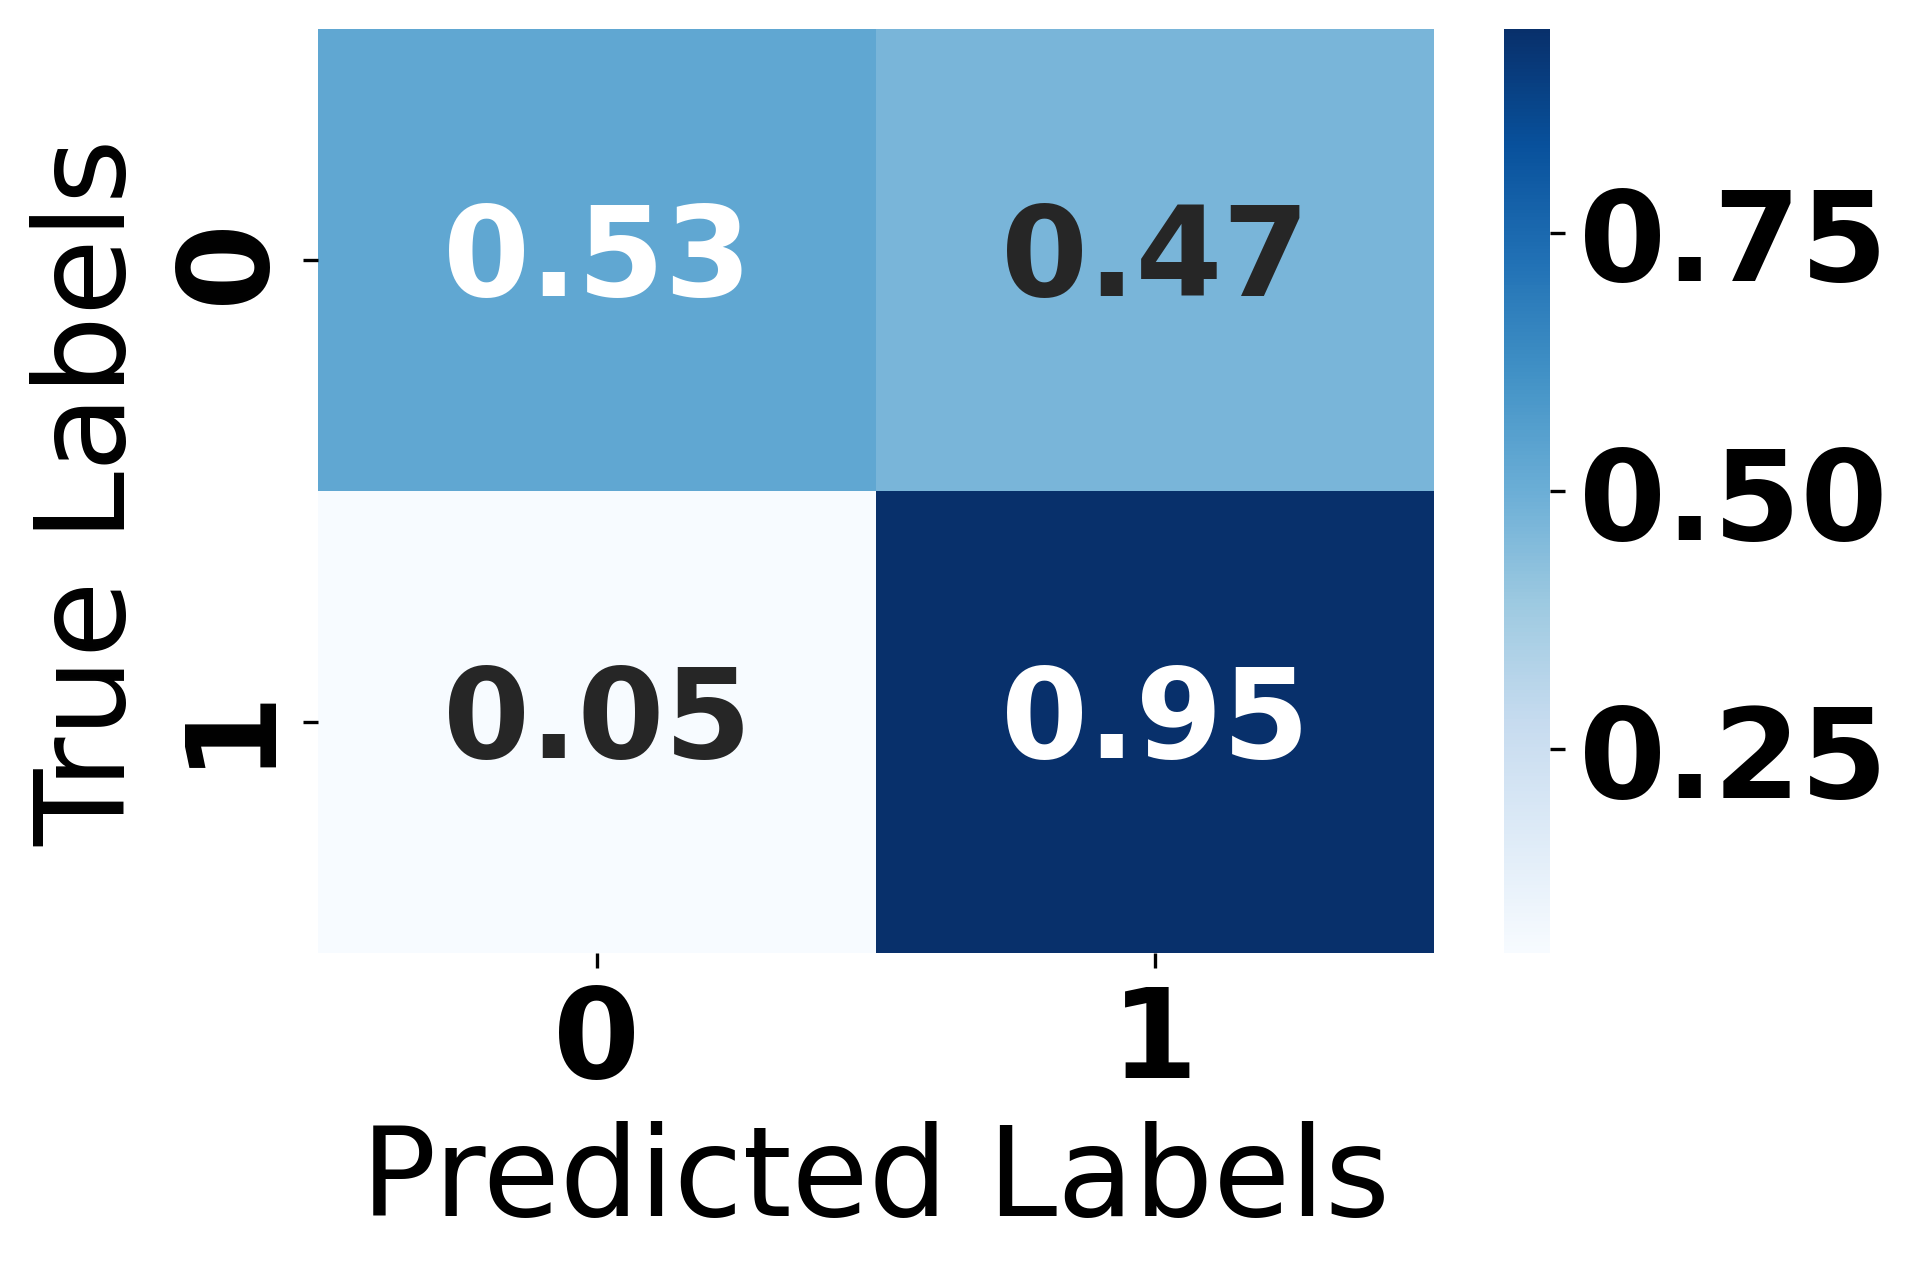

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 612ms/step - accuracy: 0.5454 - loss: 8.5564 - val_accuracy: 0.3725 - val_loss: 14.7530
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7221 - loss: 7.6969 - val_accuracy: 0.3725 - val_loss: 11.3741
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7005 - loss: 3.8253 - val_accuracy: 0.6275 - val_loss: 2.0517
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4280 - loss: 2.9252 - val_accuracy: 0.3725 - val_loss: 4.8560
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7221 - loss: 2.3760 - val_accuracy: 0.5490 - val_loss: 1.1198
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6277 - loss: 1.0133 - val_accuracy: 0.7647 - val_loss: 0.5005
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7093 - loss: 0.8425 - val_accuracy: 0.4118 - val_loss: 1.7427
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6887 - loss: 0.8321 - val_accuracy: 0.7451 - val_loss: 0.47

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
Normalized Confusion Matrix:
[[0.5        0.5       ]
 [0.05263158 0.94736842]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.50      0.65        32
     Class 1       0.53      0.95      0.68        19

    accuracy                           0.67        51
   macro avg       0.74      0.72      0.67        51
weighted avg       0.79      0.67      0.66        51



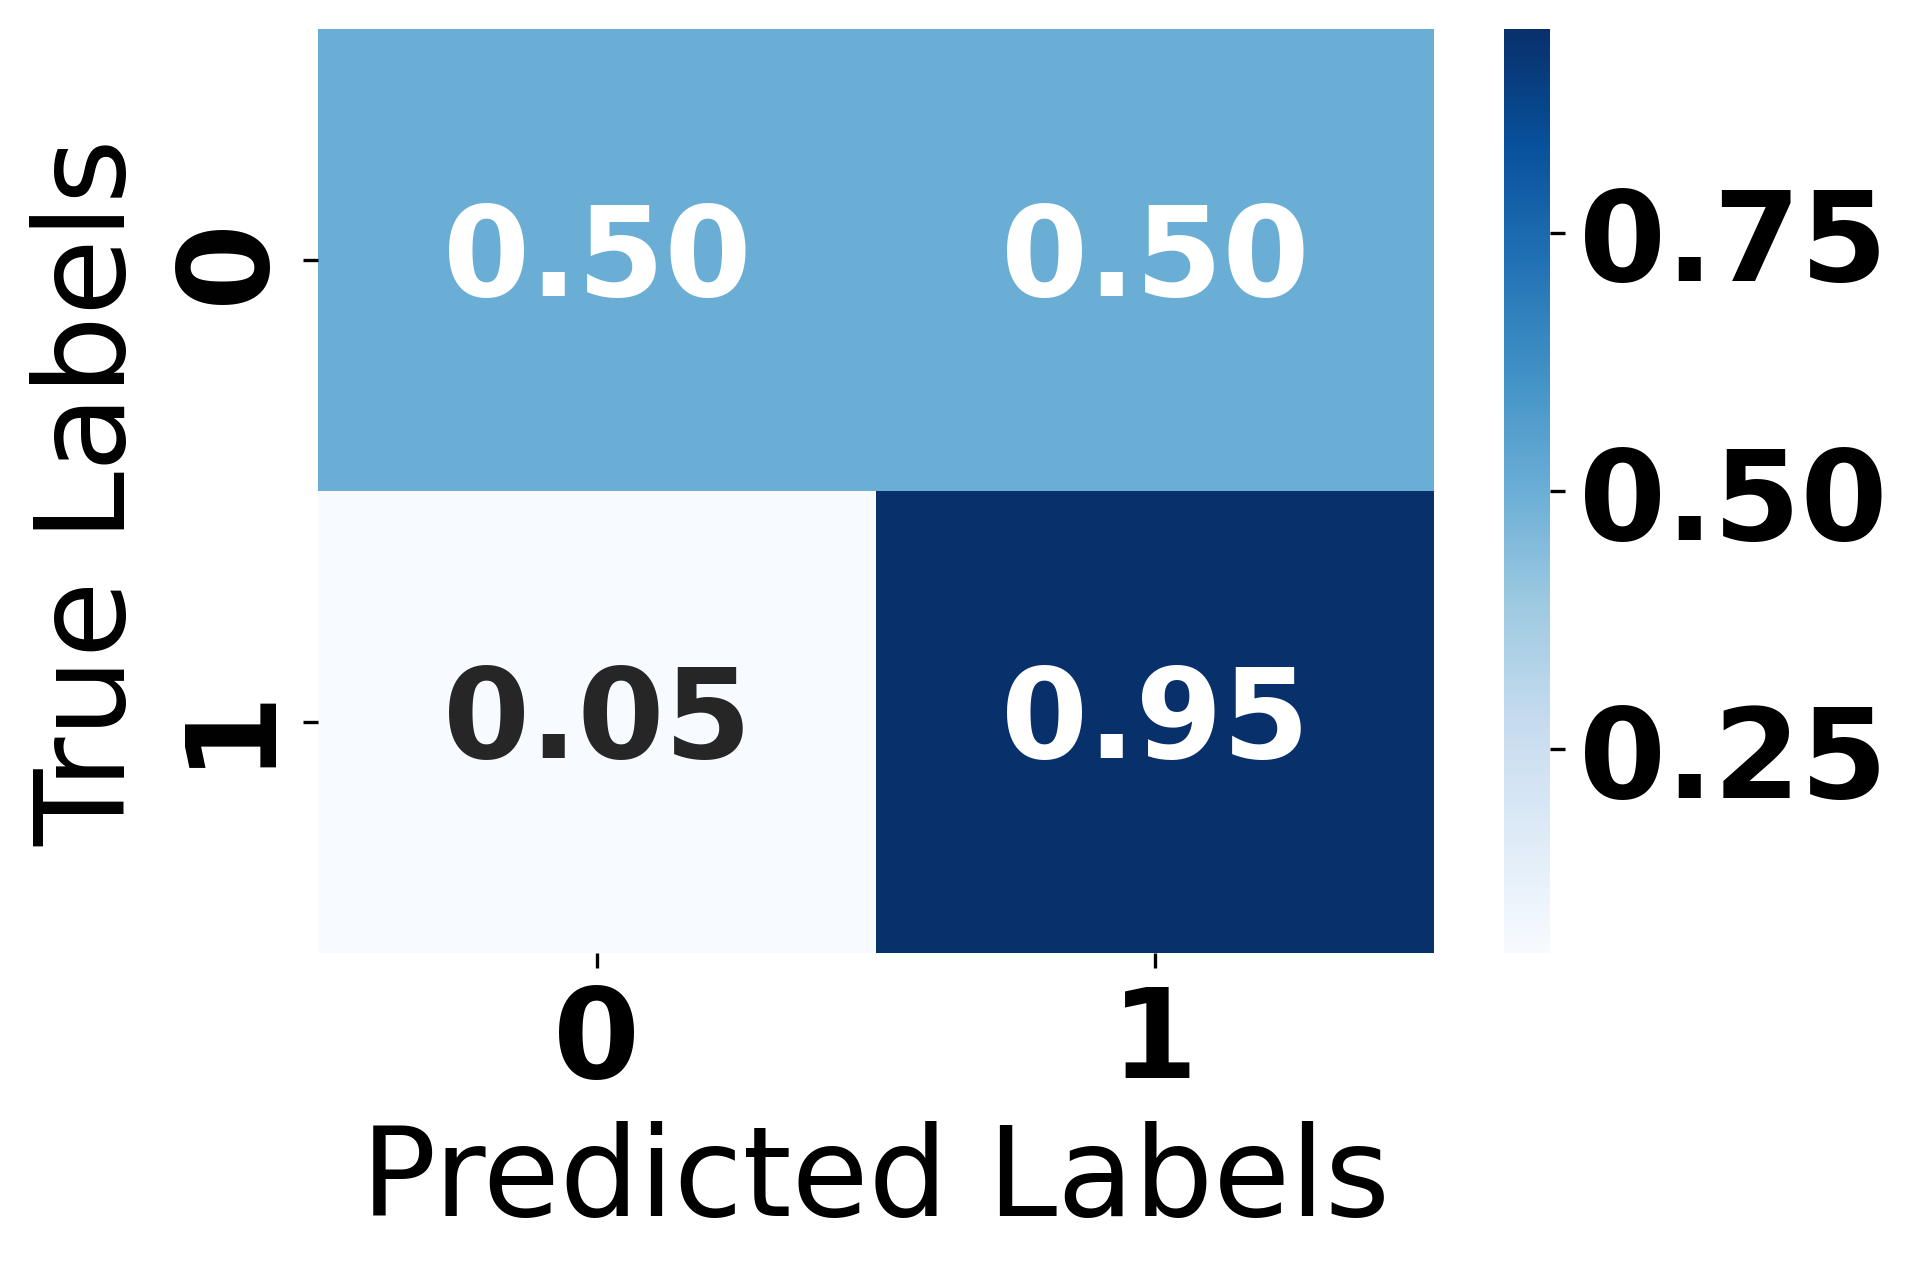

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 781ms/step - accuracy: 0.4954 - loss: 0.9716 - val_accuracy: 0.4902 - val_loss: 1.3068
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6080 - loss: 0.7668 - val_accuracy: 0.6471 - val_loss: 1.0242
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6381 - loss: 0.6923 - val_accuracy: 0.6275 - val_loss: 1.1980
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6853 - loss: 0.6505 - val_accuracy: 0.6275 - val_loss: 1.2179
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6381 - loss: 0.6610 - val_accuracy: 0.6275 - val_loss: 1.1230
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6779 - loss: 0.6018 - val_accuracy: 0.6275 - val_loss: 0.8379
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6713 - loss: 0.6349 - val_accuracy: 0.6471 - val_loss: 0.7132
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7040 - loss: 0.6028 - val_accuracy: 0.6471 - val_loss: 0.705

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
Normalized Confusion Matrix:
[[0.125      0.875     ]
 [0.05263158 0.94736842]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.12      0.22        32
     Class 1       0.39      0.95      0.55        19

    accuracy                           0.43        51
   macro avg       0.60      0.54      0.39        51
weighted avg       0.65      0.43      0.34        51



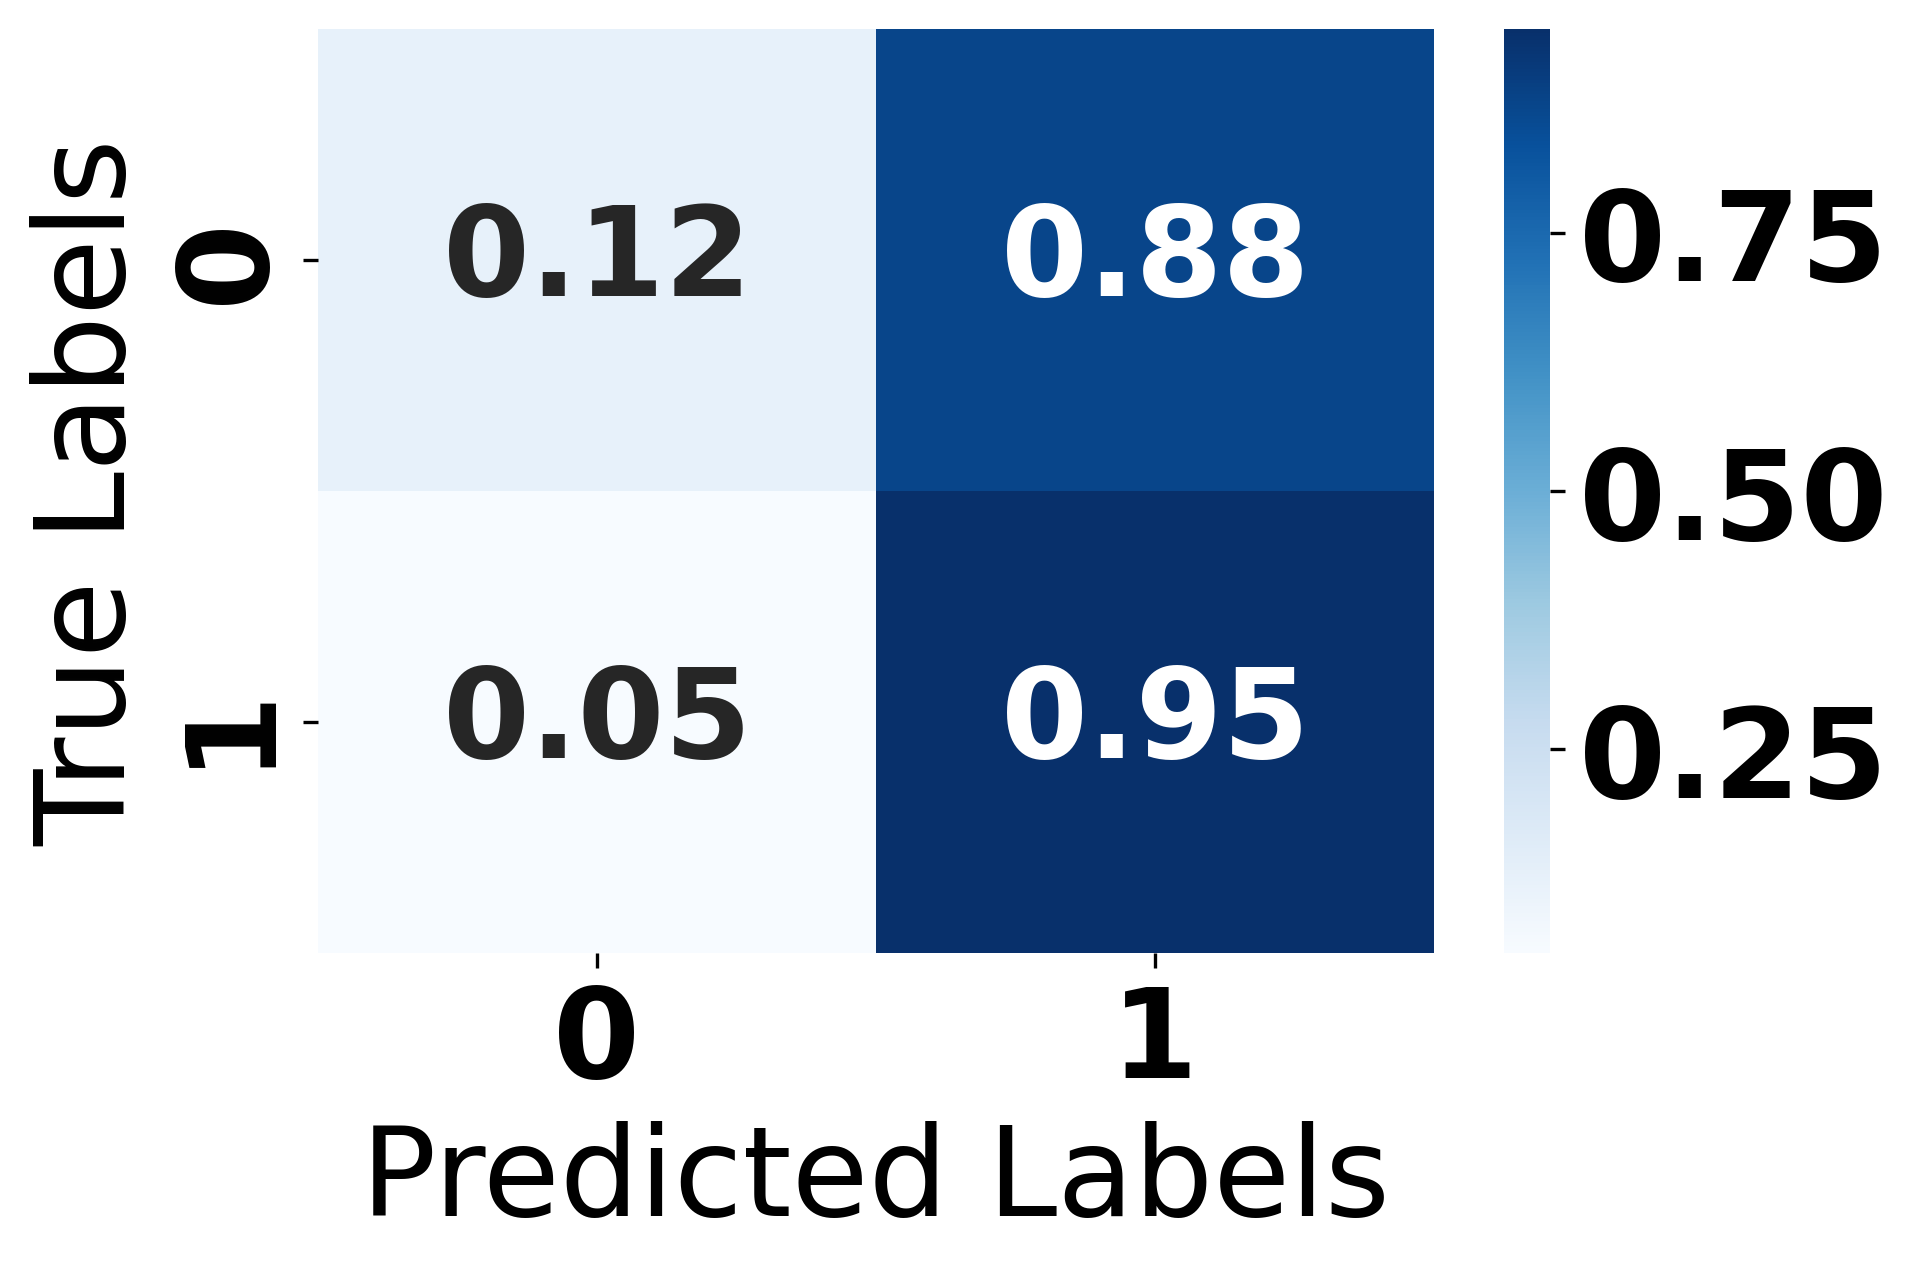

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 20000  # This should be set according to your dataset
embed_dim = 128  # Embedding size for each token
ff_dim = 128  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6734 - loss: 0.6565 - val_accuracy: 0.3725 - val_loss: 0.7460
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6964 - loss: 0.6259 - val_accuracy: 0.3725 - val_loss: 0.7557
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7343 - loss: 0.5856 - val_accuracy: 0.3922 - val_loss: 0.7574
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7344 - loss: 0.5444 - val_accuracy: 0.3922 - val_loss: 0.7507
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7524 - loss: 0.5307 - val_accuracy: 0.4118 - val_loss: 0.7262
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7619 - loss: 0.5164 - val_accuracy: 0.5098 - val_loss: 0.6962
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7875 - loss: 0.4771 - val_accuracy: 0.5686 - val_loss: 0.6652
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7921 - loss: 0.4690 - val_accuracy: 0.6078 - val_loss: 0.6319
Epoch 9/20


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step
Normalized Confusion Matrix:
[[0.6875     0.3125    ]
 [0.10526316 0.89473684]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.69      0.79        32
     Class 1       0.63      0.89      0.74        19

    accuracy                           0.76        51
   macro avg       0.77      0.79      0.76        51
weighted avg       0.81      0.76      0.77        51



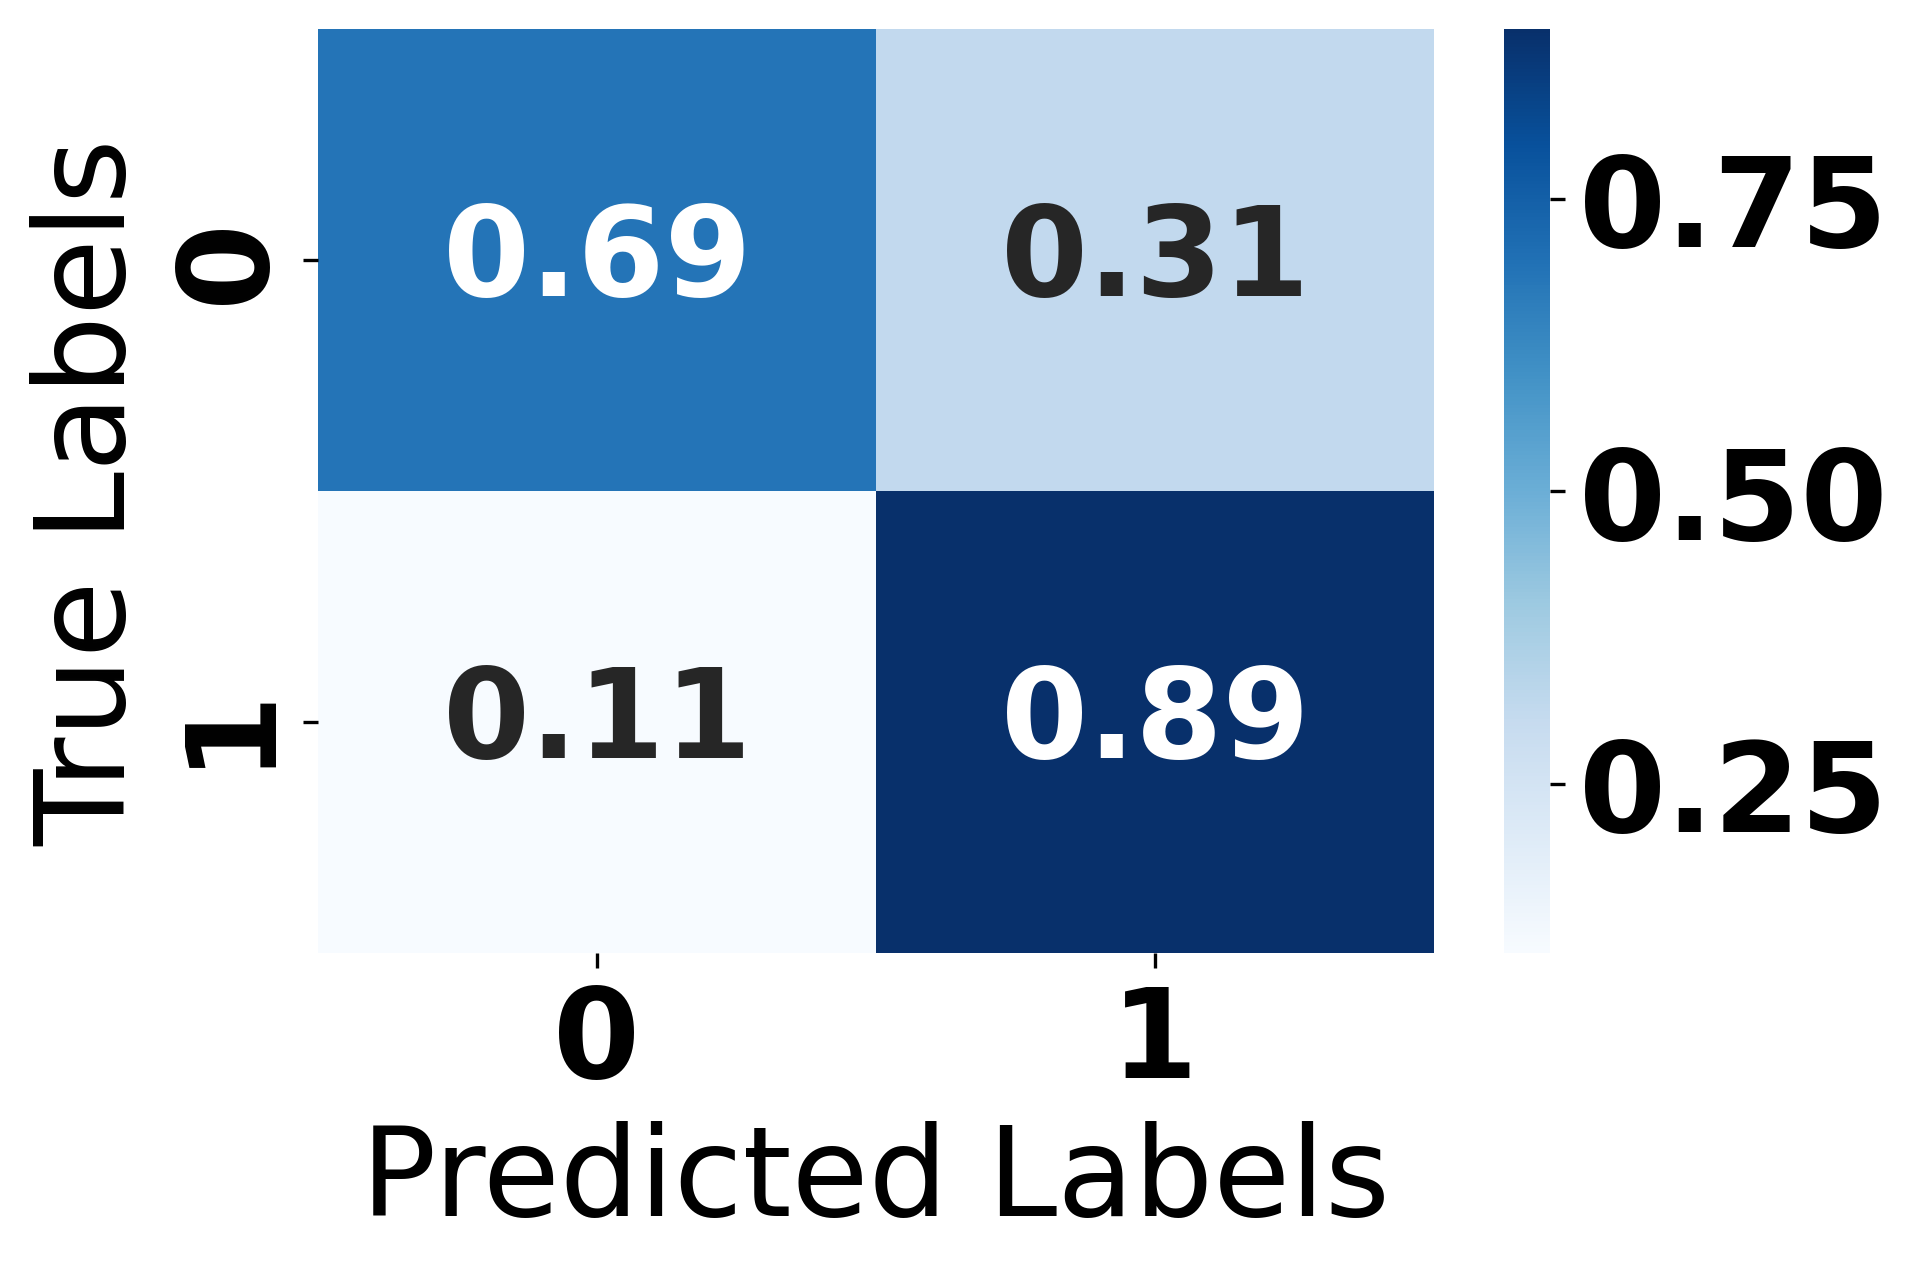

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/TVAE (Tabular Variational Autoencoder)/model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=10,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=23, training_loss=1.2552194698997166, metrics={'train_runtime': 129.5749, 'train_samples_per_second': 3.519, 'train_steps_per_second': 0.178, 'total_flos': 0.0, 'train_loss': 1.2552194698997166, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.9231    0.3750    0.5333        32
           1     0.4737    0.9474    0.6316        19

    accuracy                         0.5882        51
   macro avg     0.6984    0.6612    0.5825        51
weighted avg     0.7557    0.5882    0.5699        51

Confusion Matrix:
 [[12 20]
 [ 1 18]]


### Gaussian Copula (via SDV's CopulaGAN)

In [ ]:
!pip install sdv

In [ ]:
# Install latest SDV
!pip install -U sdv

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from collections import Counter

In [ ]:
# Define categorical feature indices (adjust for your dataset)
categorical_features = [1, 2, 5, 6, 8, 10, 11, 12]  # UCI Heart Disease

# Ensure y_train is 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Add target column
x_train['target'] = y_train

# Check class distribution
print("Before GaussianCopula:", Counter(y_train))

# Separate minority class (assuming class 1 is minority)
minority_df = x_train[x_train['target'] == 1]

# Calculate number of synthetic samples needed
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Define metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=minority_df)

# Mark categorical columns
for col in x_train.columns[categorical_features]:
    metadata.update_column(column_name=col, sdtype='categorical')
metadata.update_column(column_name='target', sdtype='categorical')

# Initialize synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(minority_df)

# Generate synthetic samples
synthetic_data = synthesizer.sample(num_rows=samples_to_generate)

# Keep only minority samples (if needed)
synthetic_data = synthetic_data[synthetic_data['target'] == 1]

# Split synthetic into X and y
synthetic_x_train = synthetic_data.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_data['target'].reset_index(drop=True)

# Combine with original
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final class distribution
print("After GaussianCopula:", Counter(y_resampled_df))

Before GaussianCopula: Counter({np.int64(0): 128, np.int64(1): 118})


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


After GaussianCopula: Counter({1: 328, 0: 128})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
57    29
59    25
60    25
58    25
62    23
56    22
54    20
51    20
52    20
61    18
63    16
53    15
65    15
50    14
67    14
64    13
45    12
44    12
48    11
41    10
55    10
43     9
69     9
42     8
46     8
66     8
40     6
68     6
71     6
47     5
35     5
39     4
70     3
49     3
37     1
76     1
74     1
34     1
38     1
77     1
72     1
Name: count, dtype: int64

Counts for sex:
sex
1    341
0    115
Name: count, dtype: int64

Counts for cp:
cp
4    272
3     94
2     50
1     40
Name: count, dtype: int64

Counts for trestbps:
trestbps
120    33
140    31
130    30
110    18
150    17
       ..
193     1
179     1
163     1
185     1
167     1
Name: count, Length: 79, dtype: int64

Counts for chol:
chol
240    8
244    8
256    7
243    7
254    7
      ..
190    1
345    1
320    1
285    1
291    1
Name: count, Length: 169, dtype: int64

Counts for fbs:
fbs
0    363
1     93
Name: count, dtype: int64

Counts for restecg:
restecg
2    

## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

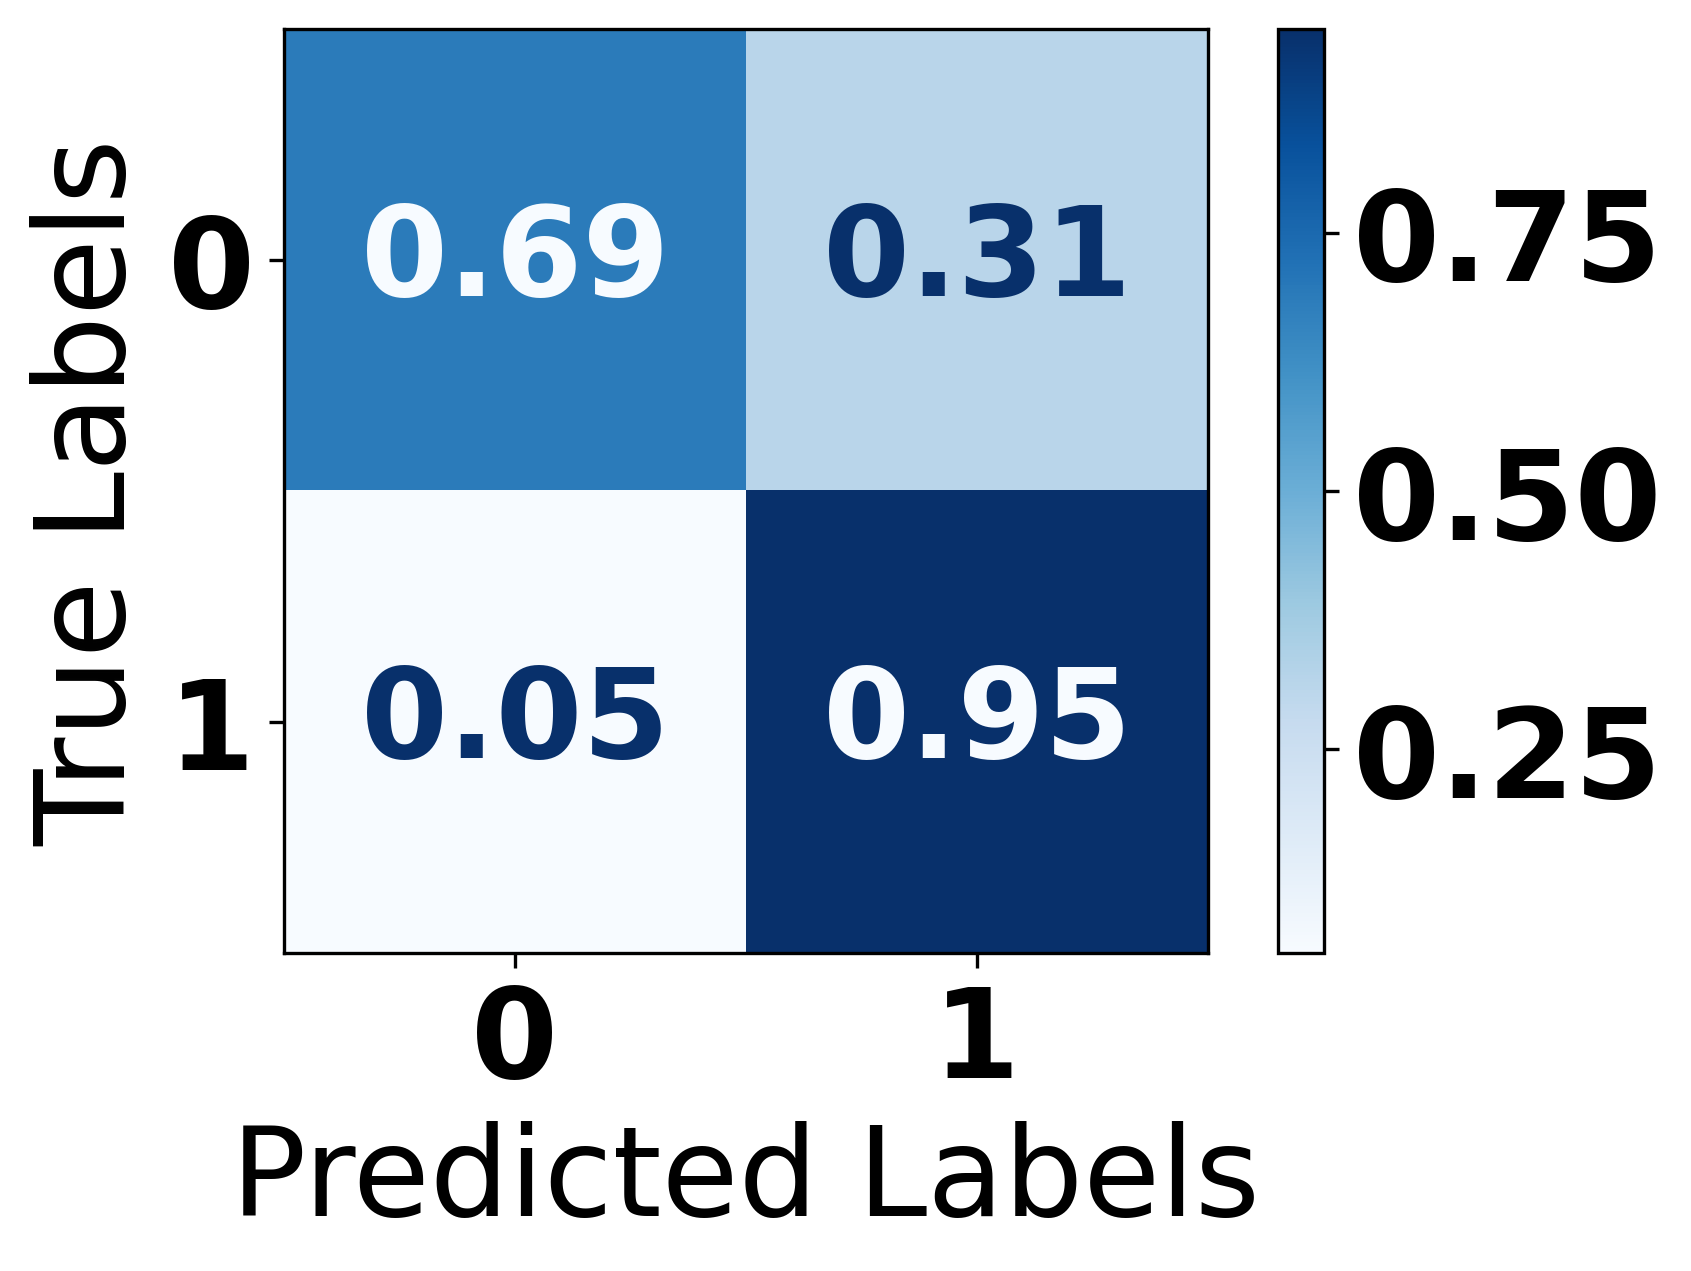

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.69      0.80        32
     Class 1       0.64      0.95      0.77        19

    accuracy                           0.78        51
   macro avg       0.80      0.82      0.78        51
weighted avg       0.84      0.78      0.79        51

Train Accuracy: 1.0
Test Accuracy: 0.7843137254901961


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/DT.pkl')
"""

["/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/Model/DT.pkl"]

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


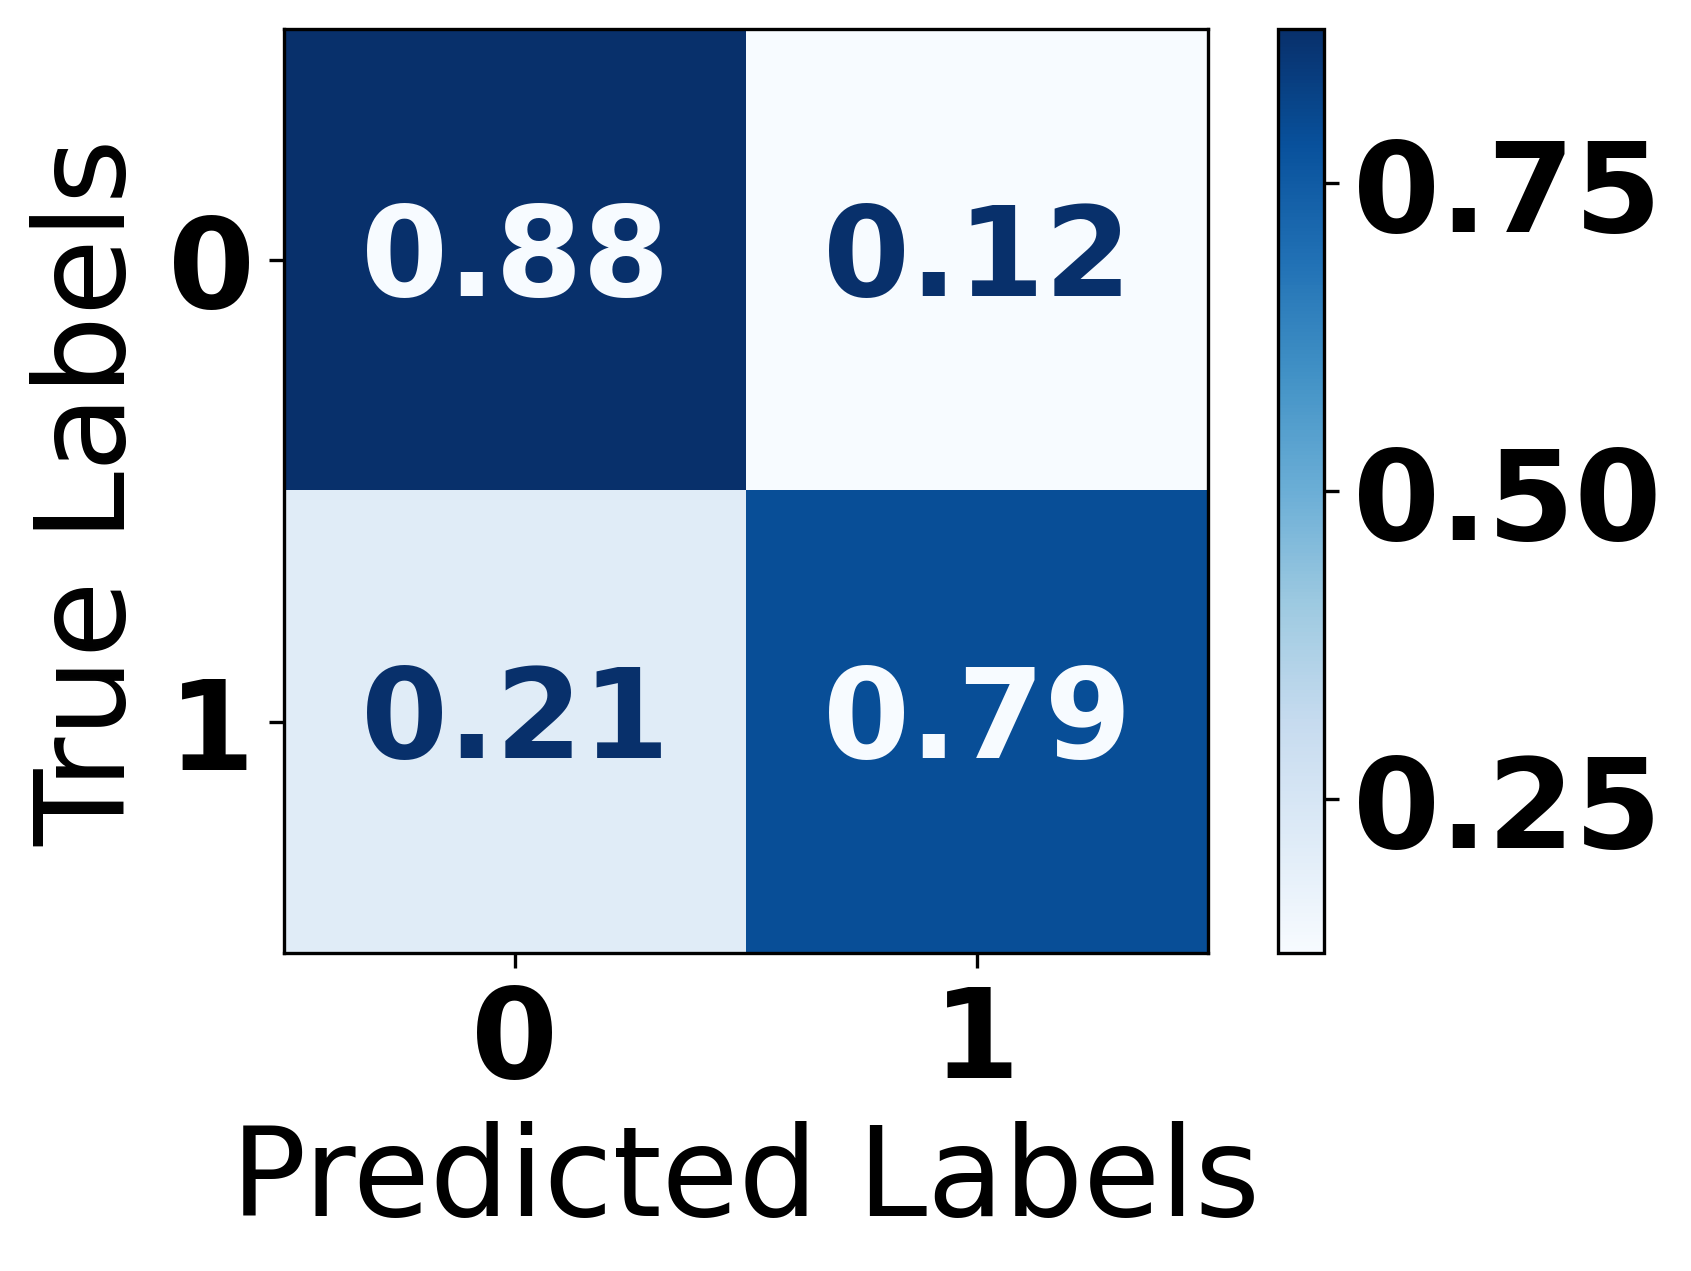

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88        32
     Class 1       0.79      0.79      0.79        19

    accuracy                           0.84        51
   macro avg       0.83      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51

Train Accuracy: 0.7412280701754386
Test Accuracy: 0.8431372549019608


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/RUSBoost.pkl')
"""

["/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/Model/RUSBoost.pkl"]

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


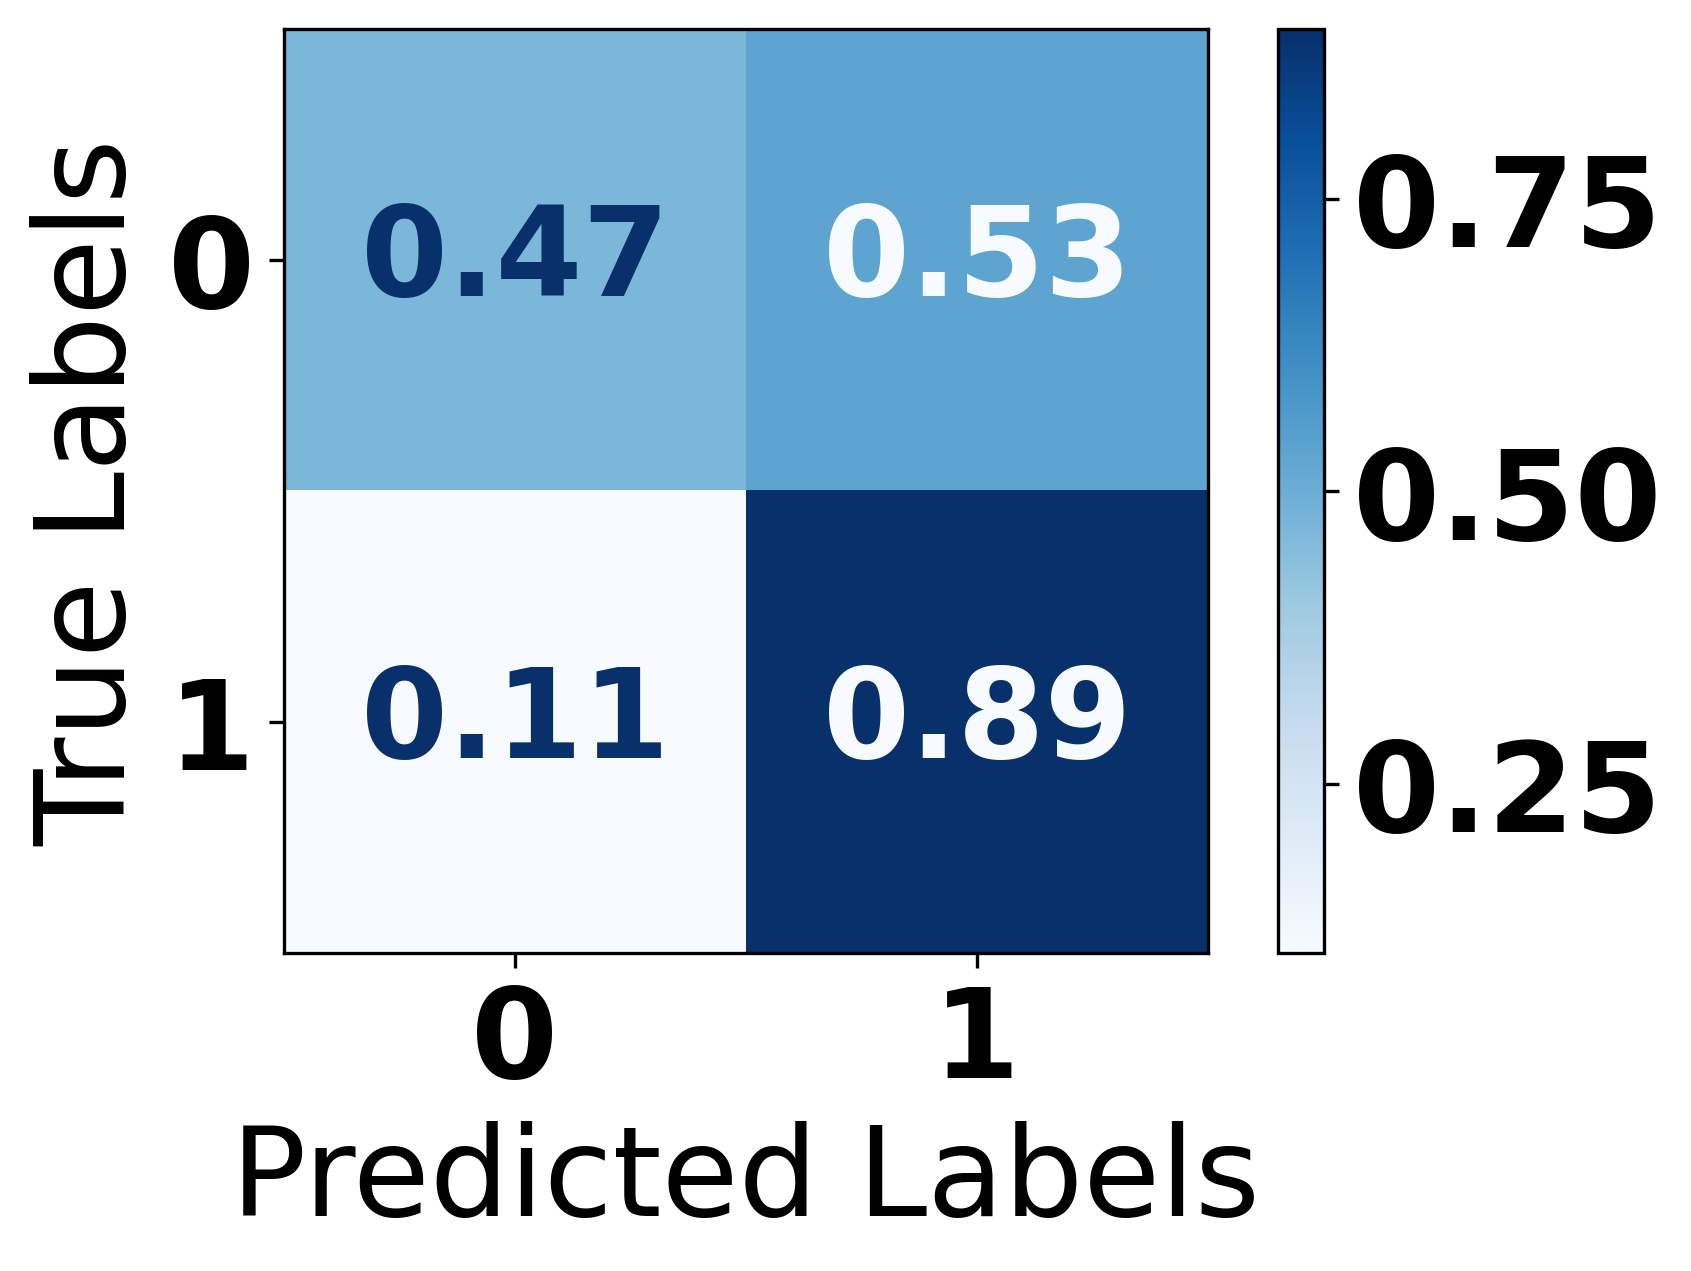

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        32
           1       0.50      0.89      0.64        19

    accuracy                           0.63        51
   macro avg       0.69      0.68      0.63        51
weighted avg       0.74      0.63      0.62        51

Train Accuracy: 0.793859649122807
Test Accuracy: 0.6274509803921569


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=20, # Require lots of samples to split
    min_samples_leaf=25,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/RF.pkl')
"""

["/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/Model/RF.pkl"]

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


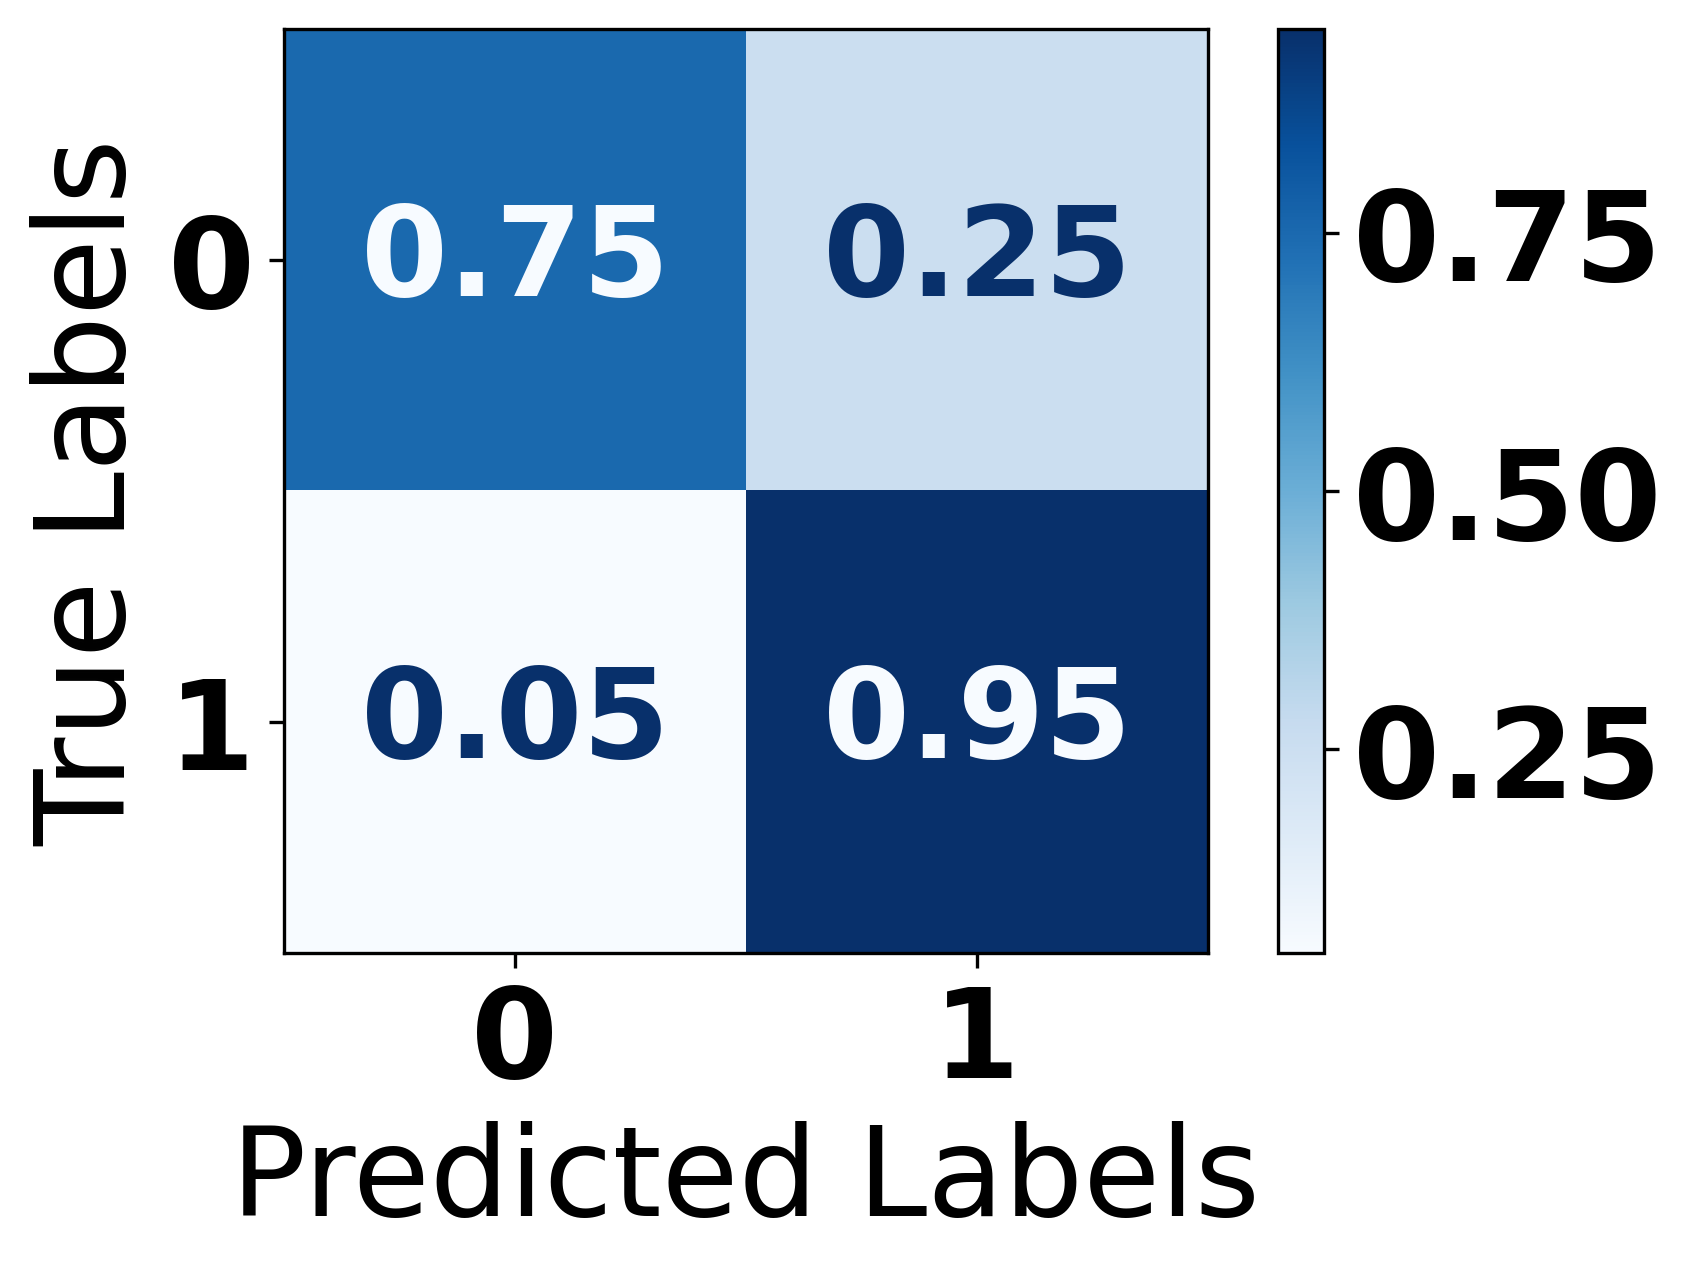

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84        32
           1       0.69      0.95      0.80        19

    accuracy                           0.82        51
   macro avg       0.83      0.85      0.82        51
weighted avg       0.86      0.82      0.83        51

Train Accuracy: 0.8179824561403509
Test Accuracy: 0.8235294117647058


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/GNB.pkl')
"""

["/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/Model/GNB.pkl"]

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


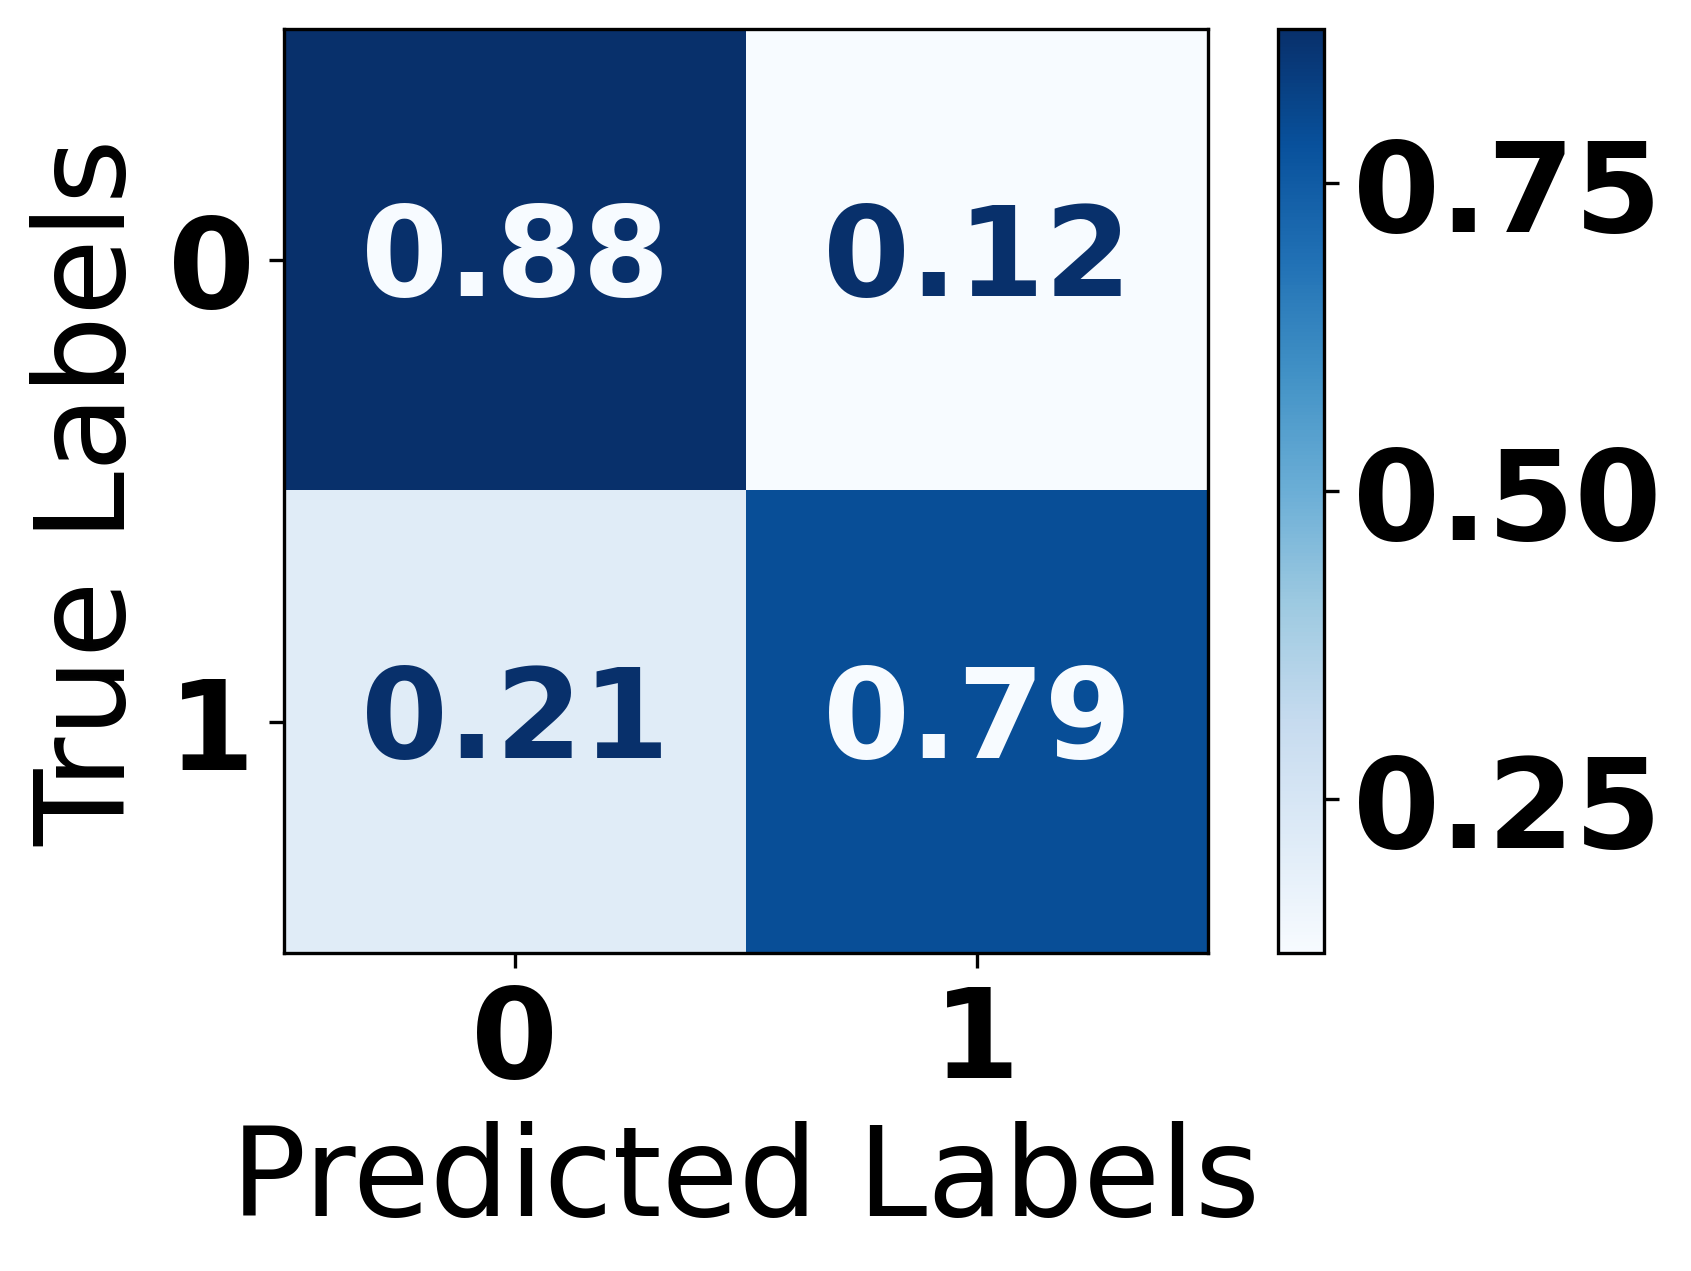

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.79      0.79      0.79        19

    accuracy                           0.84        51
   macro avg       0.83      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51

Train Accuracy: 0.7412280701754386
Test Accuracy: 0.8431372549019608


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/AdaBoost.pkl')
"""

["/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/Model/AdaBoost.pkl"]

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.5        0.5       ]
 [0.10526316 0.89473684]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.50      0.64        32
     Class 1       0.52      0.89      0.65        19

    accuracy                           0.65        51
   macro avg       0.70      0.70      0.65        51
weighted avg       0.75      0.65      0.65        51



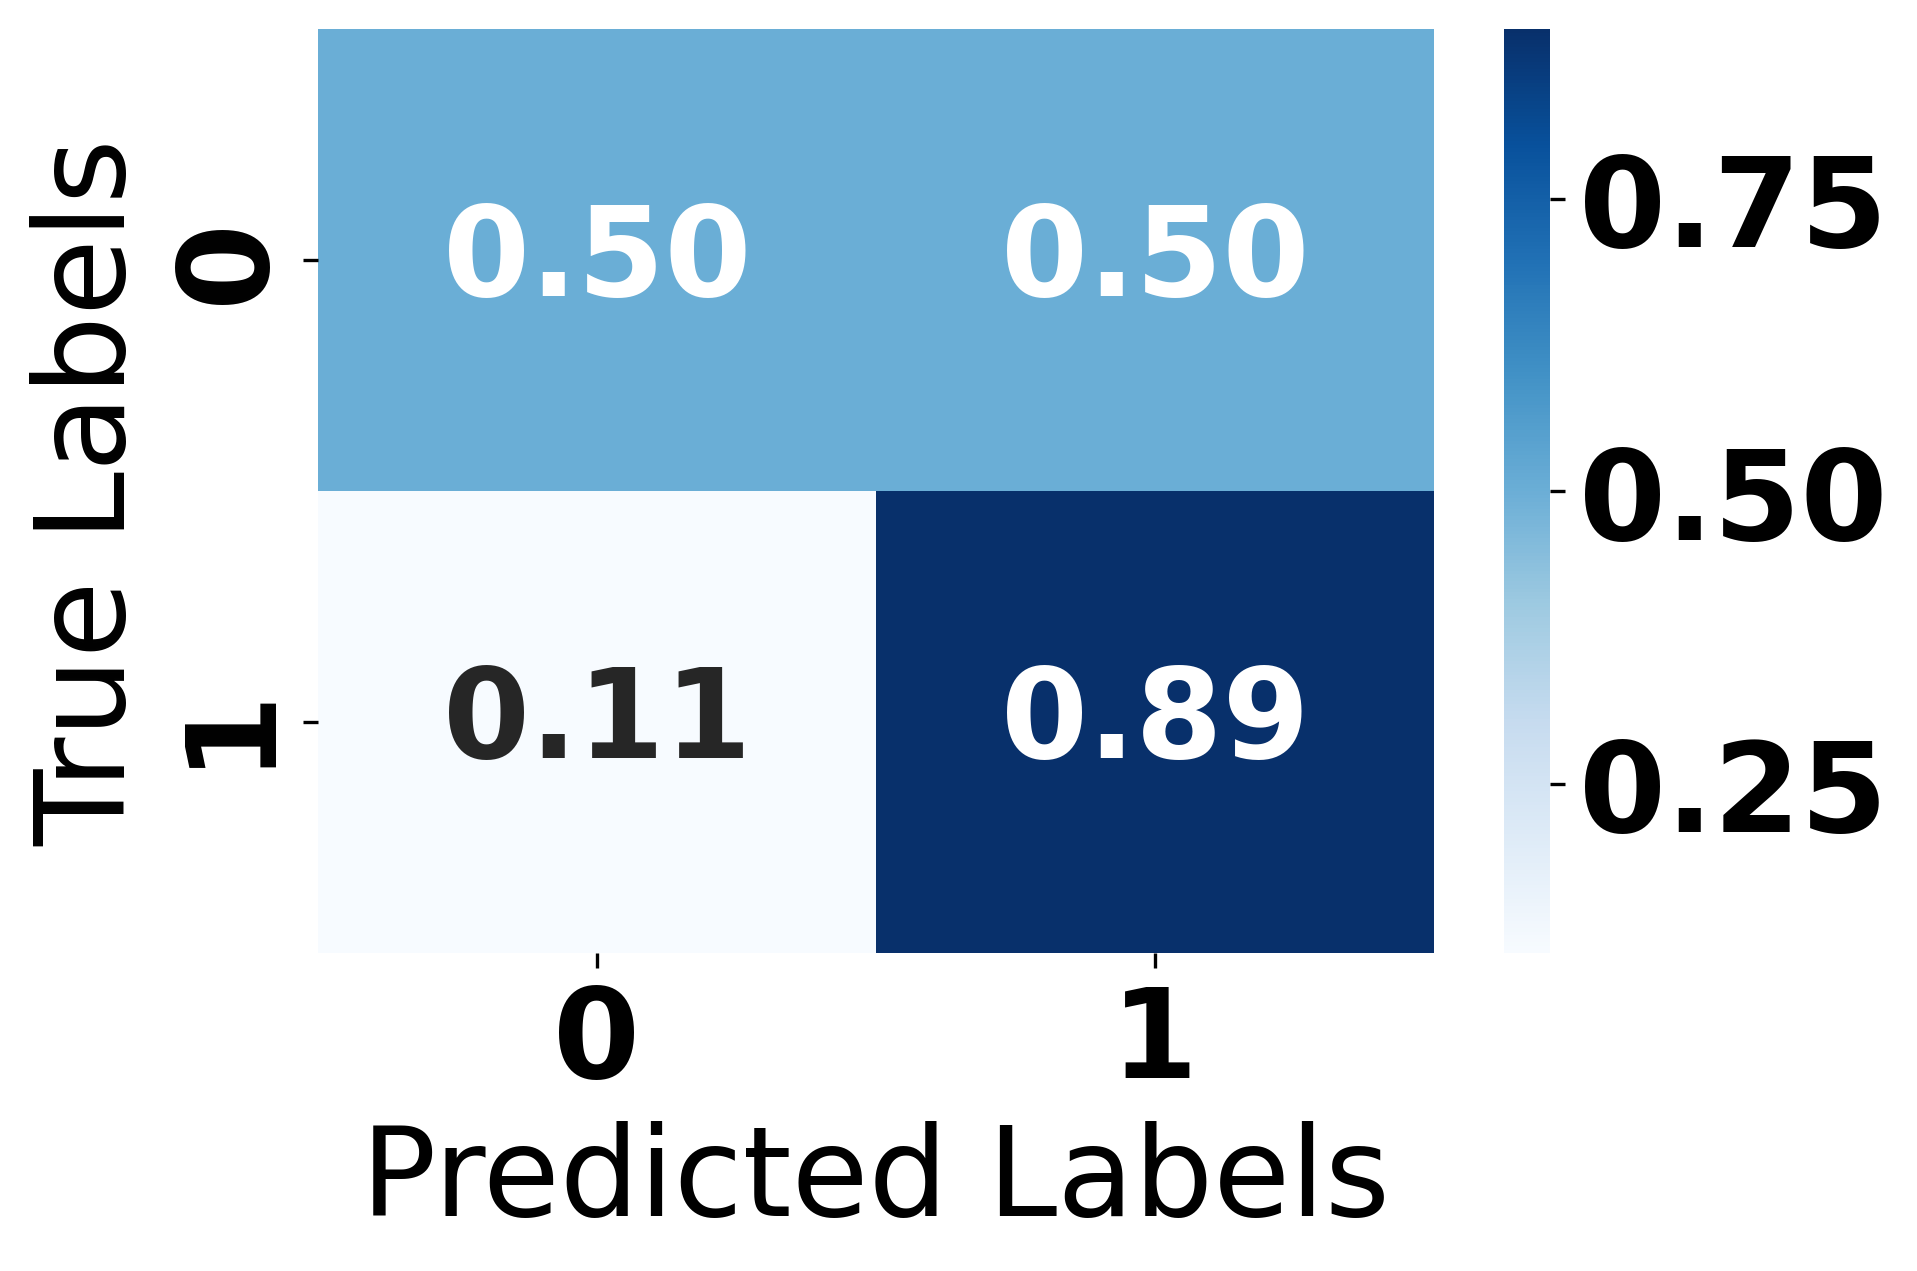

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/MLP.pkl')
"""

["/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV's CopulaGAN)/Model/MLP.pkl"]

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6349 - loss: 6.0982 - val_accuracy: 0.3725 - val_loss: 4.4919
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6227 - loss: 1.9378 - val_accuracy: 0.3725 - val_loss: 3.7830
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7221 - loss: 2.2376 - val_accuracy: 0.7059 - val_loss: 0.5238
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5413 - loss: 1.1088 - val_accuracy: 0.3922 - val_loss: 2.7193
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.7053 - loss: 1.1633 - val_accuracy: 0.7843 - val_loss: 0.5100
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7093 - loss: 0.8061 - val_accuracy: 0.6471 - val_loss: 0.5716
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6487 - loss: 0.6505 - val_accuracy: 0.4314 - val_loss: 1.4734
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6854 - loss: 0.6995 - val_accuracy: 0.4510 - val_loss: 1.0840

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step
Normalized Confusion Matrix:
[[0.40625 0.59375]
 [0.      1.     ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.41      0.58        32
     Class 1       0.50      1.00      0.67        19

    accuracy                           0.63        51
   macro avg       0.75      0.70      0.62        51
weighted avg       0.81      0.63      0.61        51



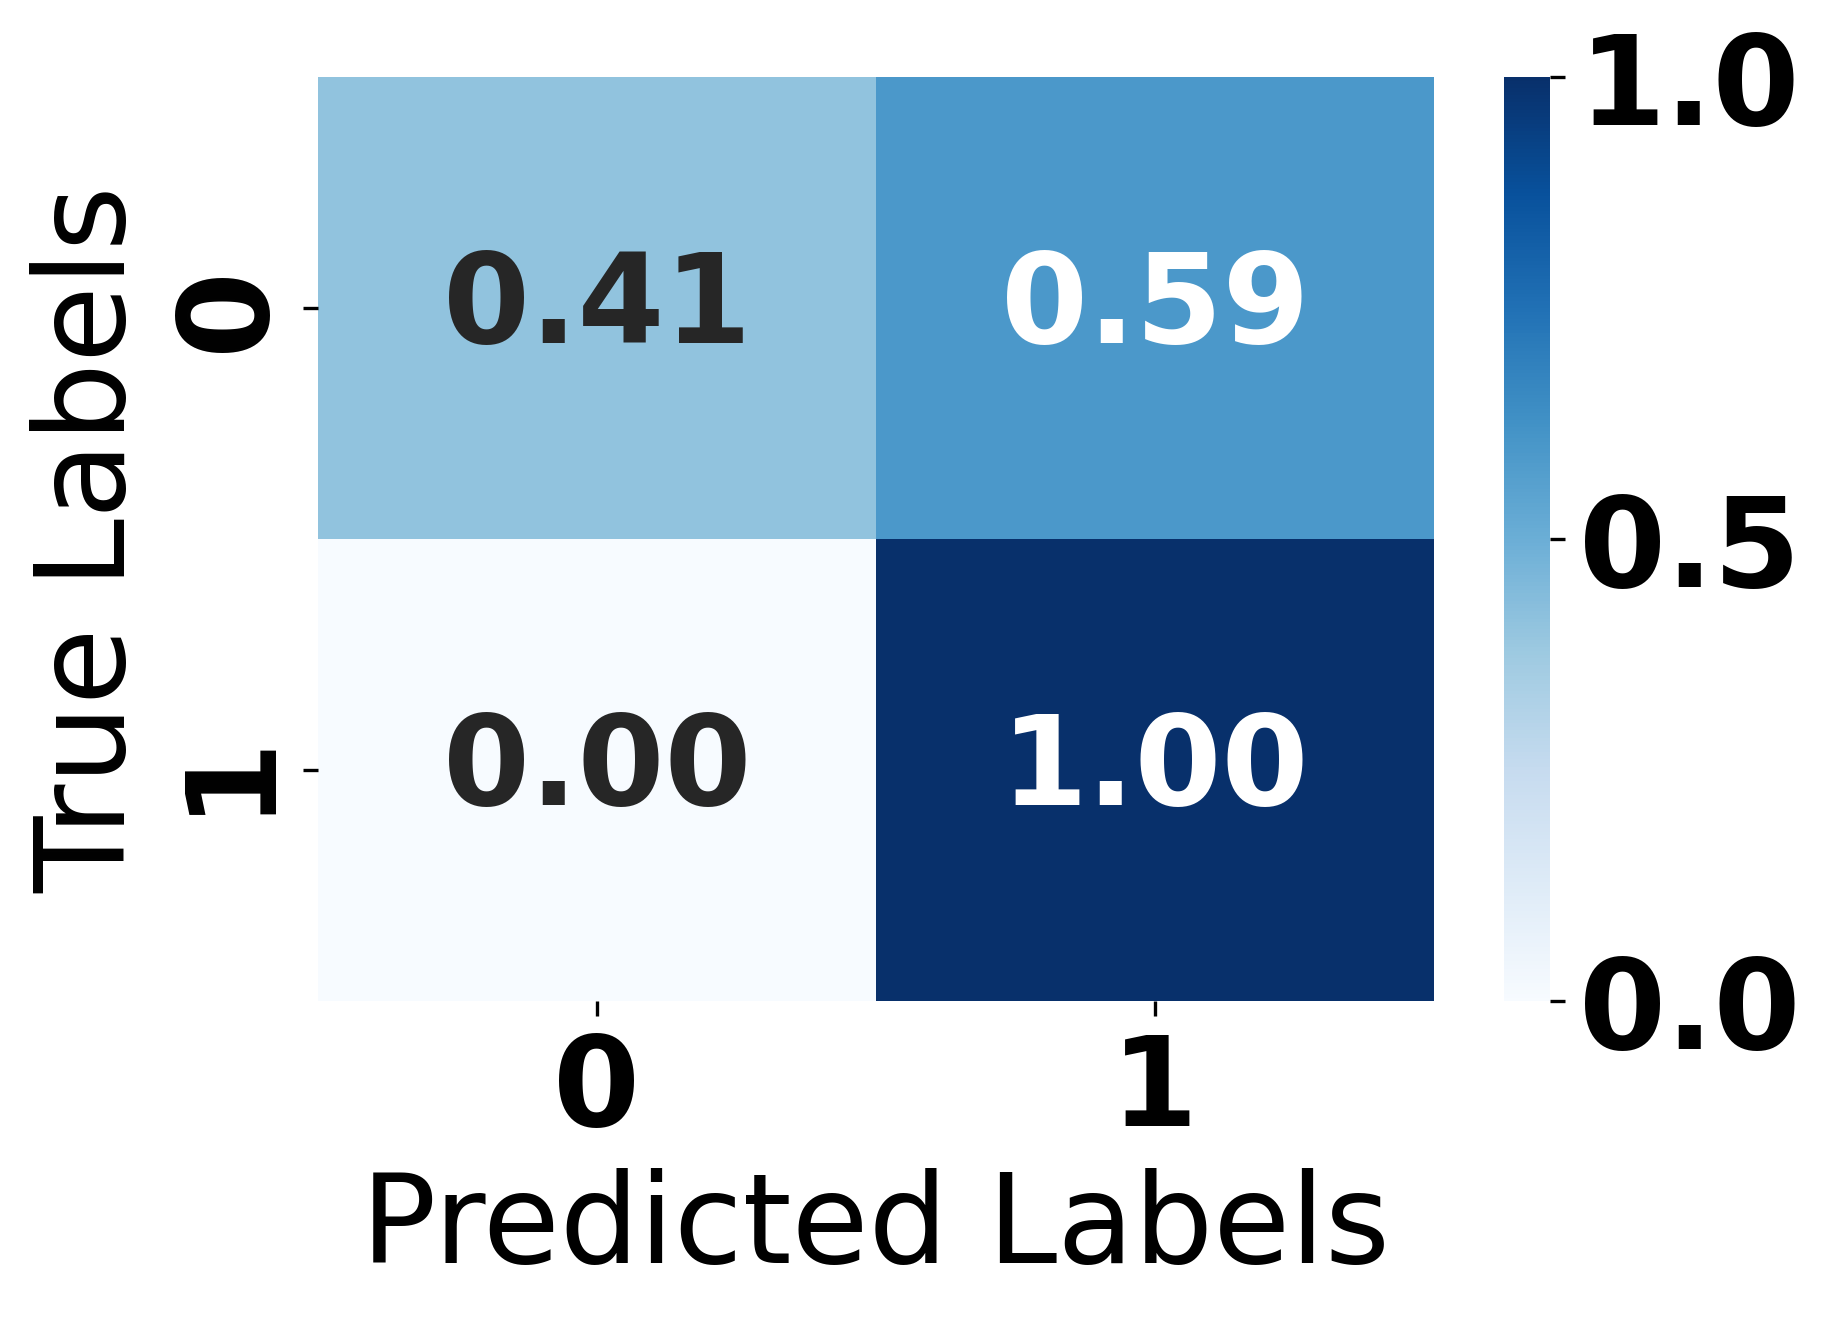

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 881ms/step - accuracy: 0.4967 - loss: 0.8803 - val_accuracy: 0.7647 - val_loss: 0.5856
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5766 - loss: 0.7539 - val_accuracy: 0.7255 - val_loss: 0.6905
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5756 - loss: 0.7471 - val_accuracy: 0.7255 - val_loss: 0.5155
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6282 - loss: 0.6938 - val_accuracy: 0.7451 - val_loss: 0.4951
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6616 - loss: 0.6595 - val_accuracy: 0.7647 - val_loss: 0.5650
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6454 - loss: 0.6202 - val_accuracy: 0.6863 - val_loss: 0.6127
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6832 - loss: 0.6199 - val_accuracy: 0.6275 - val_loss: 0.6536
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6891 - loss: 0.6118 - val_accuracy: 0.6078 - val_loss: 0.662

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Normalized Confusion Matrix:
[[0.40625    0.59375   ]
 [0.36842105 0.63157895]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.65      0.41      0.50        32
     Class 1       0.39      0.63      0.48        19

    accuracy                           0.49        51
   macro avg       0.52      0.52      0.49        51
weighted avg       0.55      0.49      0.49        51



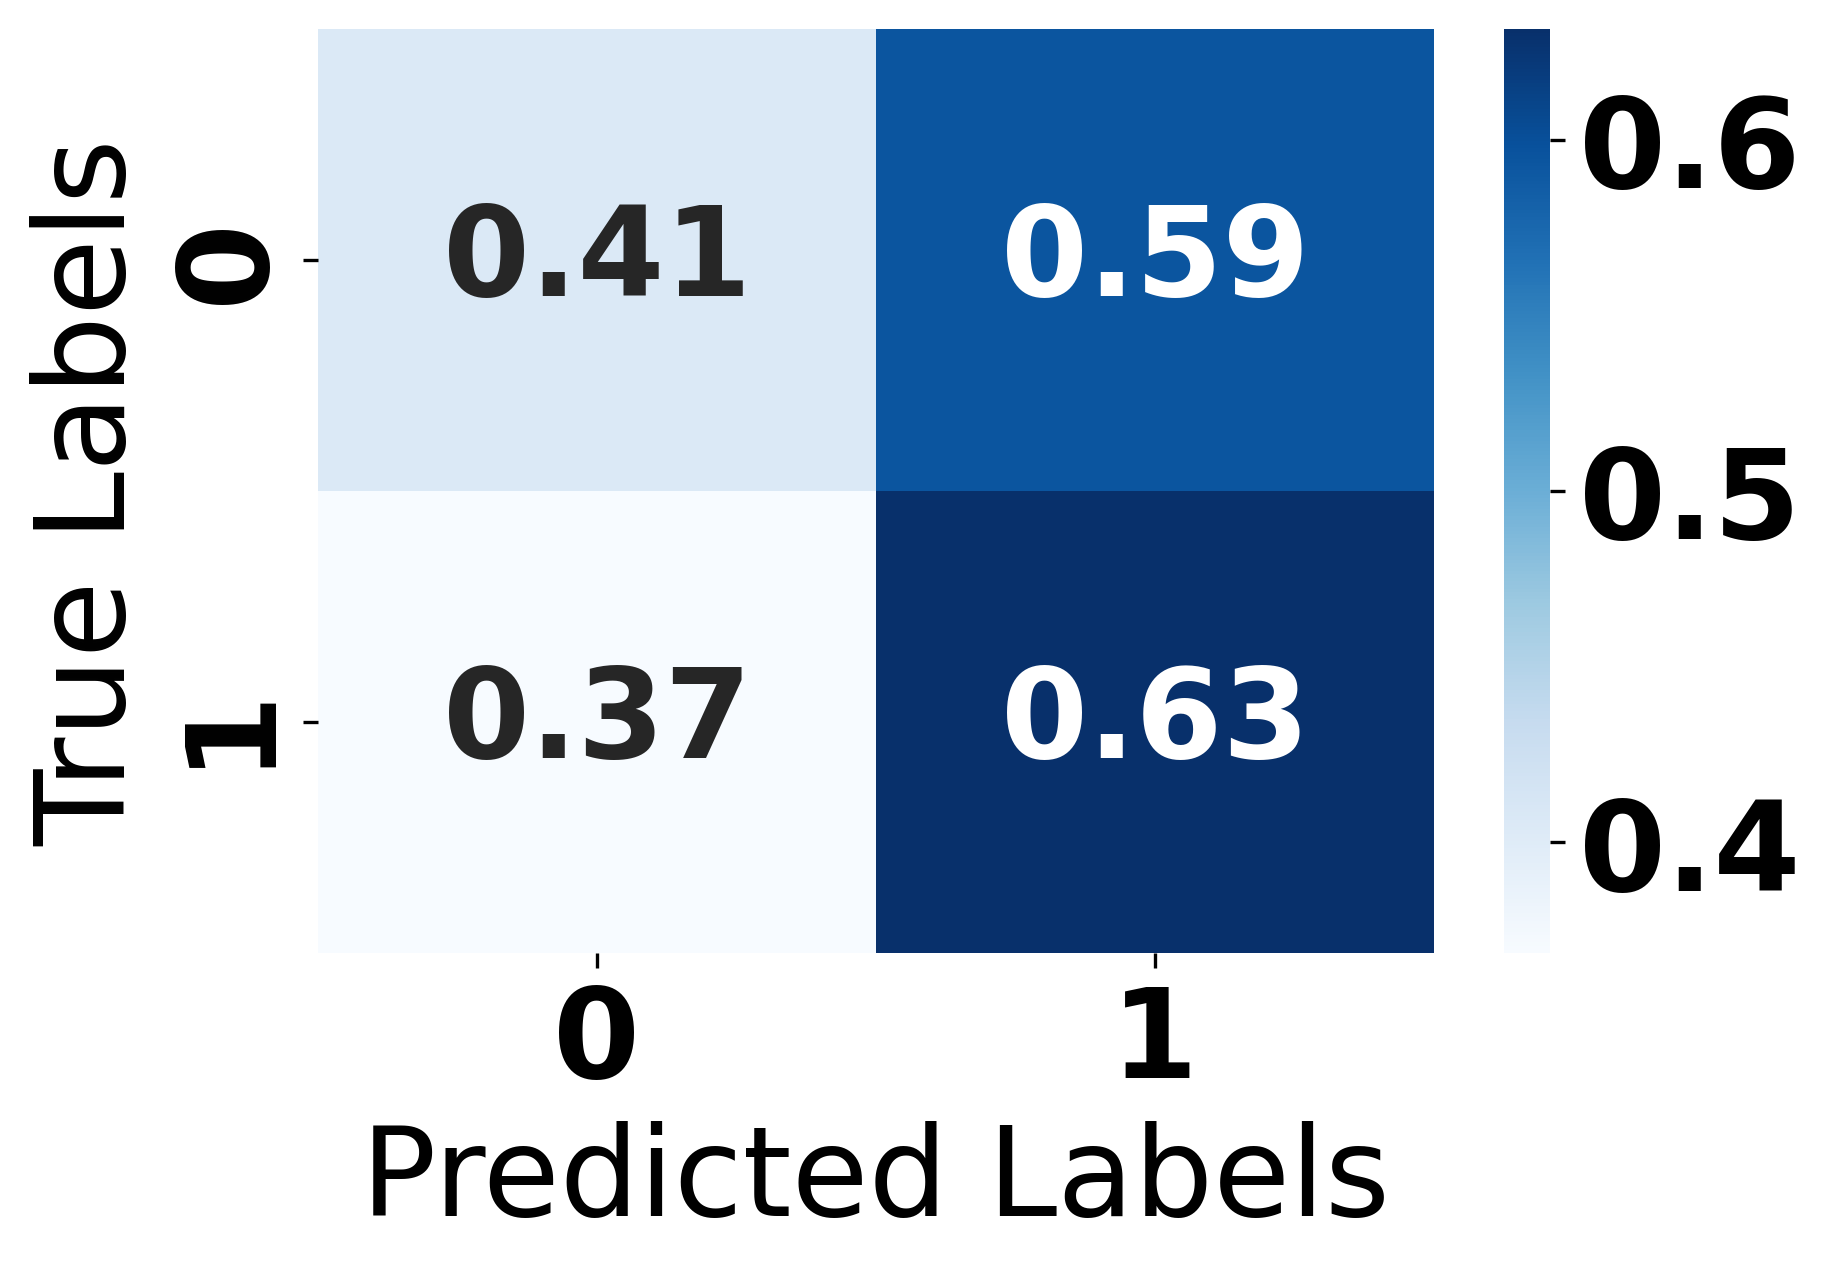

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 20000  # This should be set according to your dataset
embed_dim = 128  # Embedding size for each token
ff_dim = 128  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5855 - loss: 0.6690 - val_accuracy: 0.3725 - val_loss: 0.7295
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6960 - loss: 0.6278 - val_accuracy: 0.3725 - val_loss: 0.7705
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7227 - loss: 0.5795 - val_accuracy: 0.3725 - val_loss: 0.7883
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7286 - loss: 0.5830 - val_accuracy: 0.3725 - val_loss: 0.7845
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7372 - loss: 0.5527 - val_accuracy: 0.3922 - val_loss: 0.7617
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7476 - loss: 0.5405 - val_accuracy: 0.4706 - val_loss: 0.7282
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7391 - loss: 0.5179 - val_accuracy: 0.4902 - val_loss: 0.6874
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7933 - loss: 0.5086 - val_accuracy: 0.6078 - val_loss: 0.6501
Epoch 9/20
4

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
Normalized Confusion Matrix:
[[0.625      0.375     ]
 [0.05263158 0.94736842]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.62      0.75        32
     Class 1       0.60      0.95      0.73        19

    accuracy                           0.75        51
   macro avg       0.78      0.79      0.74        51
weighted avg       0.82      0.75      0.75        51



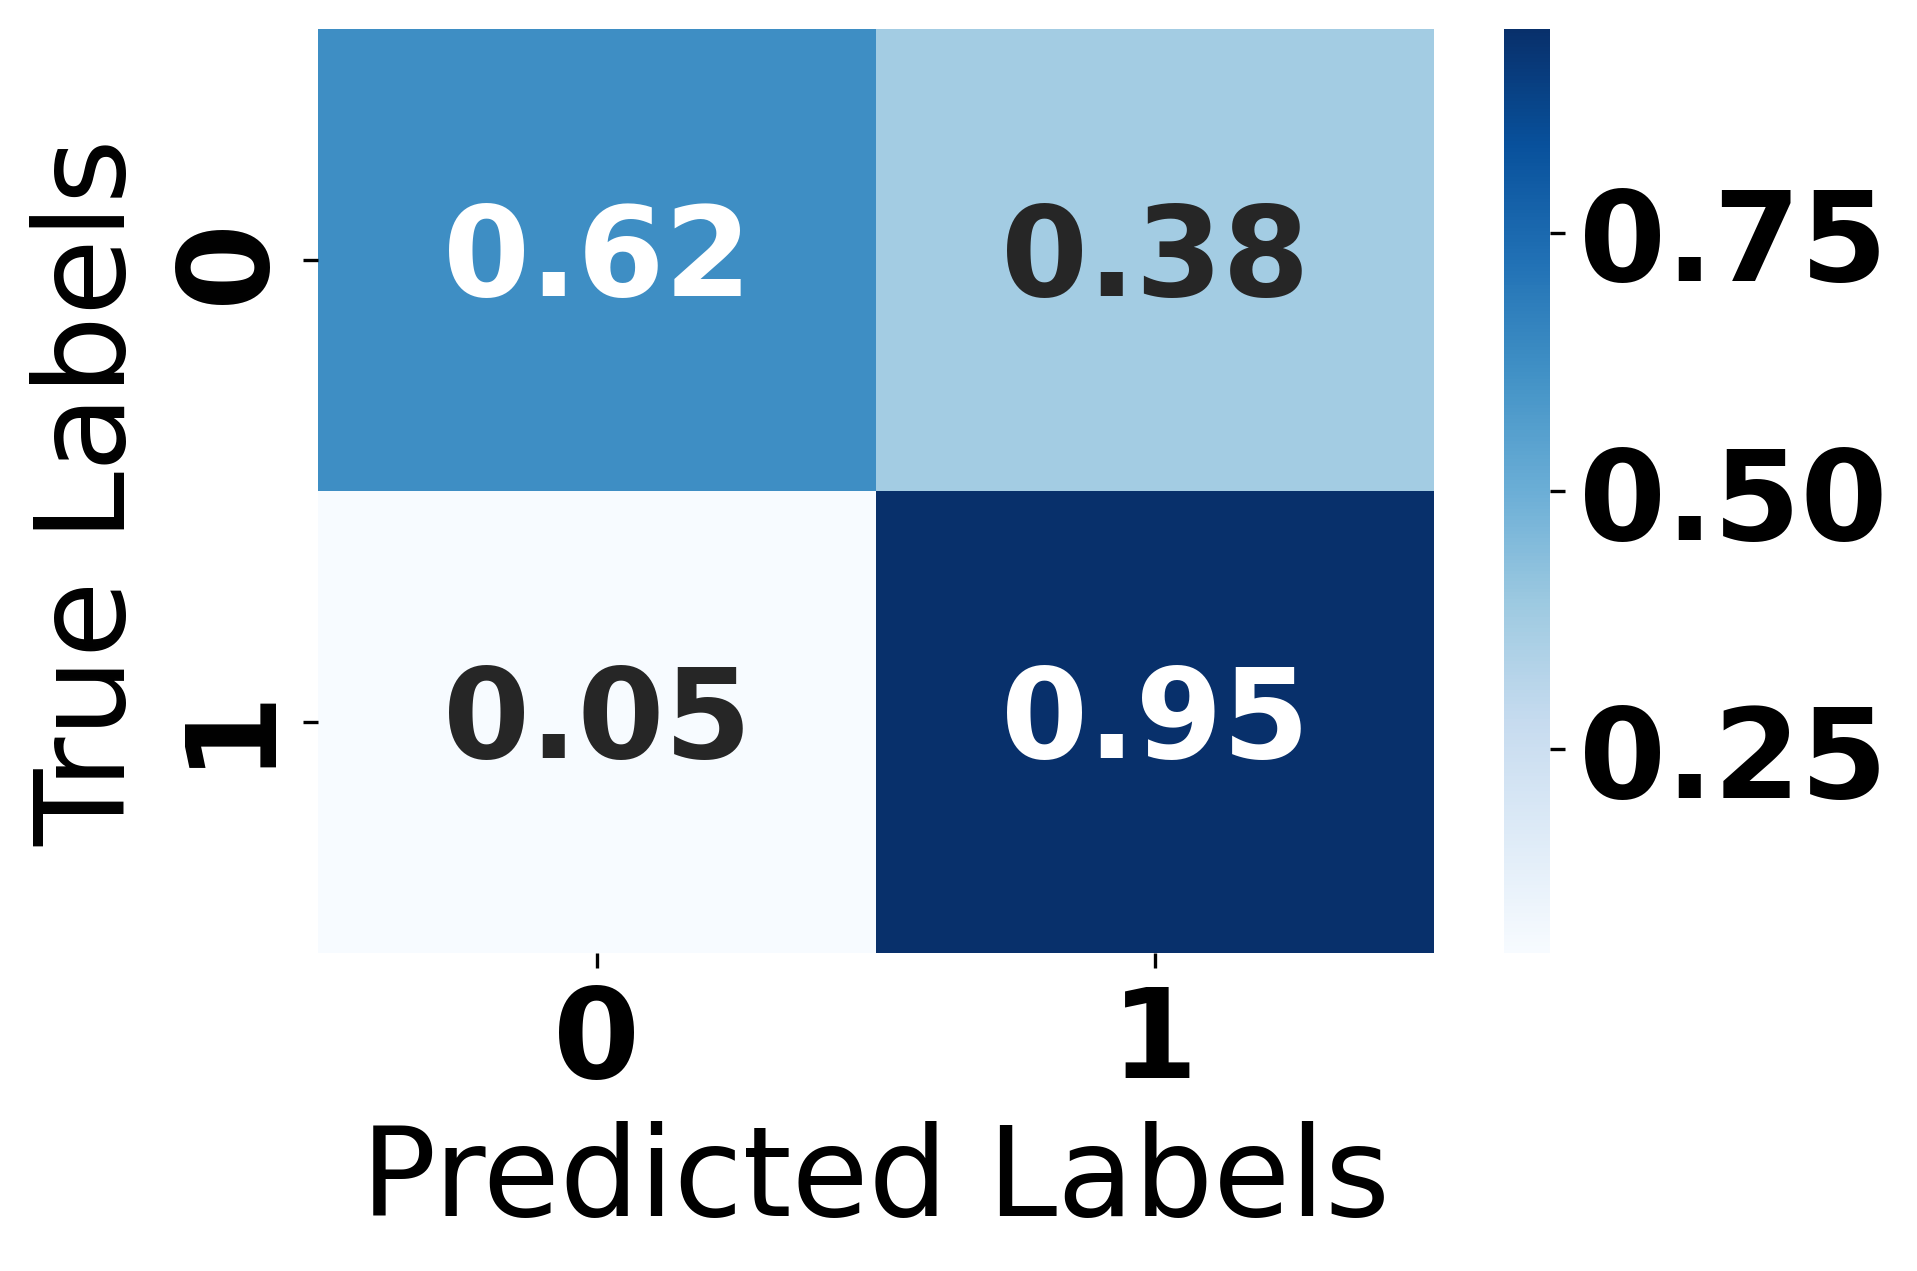

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/Gaussian Copula (via SDV\'s CopulaGAN)/Model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=114, training_loss=0.8566259710412276, metrics={'train_runtime': 139.8257, 'train_samples_per_second': 3.261, 'train_steps_per_second': 0.815, 'total_flos': 0.0, 'train_loss': 0.8566259710412276, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.8788    0.9062    0.8923        32
           1     0.8333    0.7895    0.8108        19

    accuracy                         0.8627        51
   macro avg     0.8561    0.8479    0.8516        51
weighted avg     0.8619    0.8627    0.8619        51

Confusion Matrix:
 [[29  3]
 [ 4 15]]
